### 0. 데이터셋 설명(100대 생활업종 명세)
   + 국세청의 국세통계 데이터를 통해 식당, 주유소 등 생활과 밀접하게 관련되어 있는 100대 생활업종에 대한 명세이다.
   + 해당 데이터 셋을 통해, 업종별, 지역별 생활업종 사업자수의 현황과 이전 달과 비교한 증감율 등을 확인할 수 있다.

In [1]:
from pathlib import Path
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 지역별 사업자 현황
   + '현황'은 일이 되어가는 현재의 과정이나 형편을 뜻한다.
   + 지역별 생활업종의 현황을 파악하기 위해, 주어진 데이터셋 중 가장 최근의 데이터셋인 2020년 12월의 사업자의 지역별 합계를 파악한다.

In [2]:
df_2020_12 = pd.read_excel('Big_Data_12_HWDataset/사업자 현황(2020년 12월 100대 생활업종).xlsx', 
                           sheet_name = '100대 생활업종', 
                           skiprows = list(np.arange(5)))
df_2020_12 = df_2020_12.dropna()
df_2020_12

업종       시도   시군구      당월①      전월②  증감율(①/②)    전년동월③ 증감율(①/③)
0       업종전체       합계    합계  2548586  2544505    1.0016  2397281  1.06312
1       업종전체    서울특별시    합계   508188   507899   1.00057   477788  1.06363
2       업종전체    서울특별시   종로구    17122    17145  0.998659    16783   1.0202
3       업종전체    서울특별시    중구    18726    18790  0.996594    18617  1.00585
4       업종전체    서울특별시   용산구    14500    14503  0.999793    13679  1.06002
...      ...      ...   ...      ...      ...       ...      ...      ...
25899  휴대폰가게     경상남도   거창군       30       30         1       27  1.11111
25900  휴대폰가게     경상남도   합천군        8        7   1.14286        6  1.33333
25901  휴대폰가게  제주특별자치도    합계      244      247  0.987854      234  1.04274
25902  휴대폰가게  제주특별자치도   제주시      194      198  0.979798      189  1.02646
25903  휴대폰가게  제주특별자치도  서귀포시       50       49   1.02041       45  1.11111

[25904 rows x 8 columns]

   + 데이터 셋을 통해 도, 특별시, 광역시 단위로 사업자의 현황을 파악할 수 있다.

In [3]:
df_2020_12 = df_2020_12[(df_2020_12['업종'] == '업종전체') 
                        & (df_2020_12['시군구'] == '합계') 
                        & (df_2020_12['시도'] != '합계')]
df_2020_12.rename(columns = {'당월①': '현황'}, inplace = True)
df_2020_12 = df_2020_12[['시도', '현황']]
df_2020_12

시도      현황
1      서울특별시  508188
27     인천광역시  131544
38       경기도  607611
81       강원도   89174
100    대전광역시   73542
106     충청북도   80408
121     충청남도  106102
138  세종특별자치시   14380
140    광주광역시   73840
146     전라북도   88047
162     전라남도   89239
185    대구광역시  120587
194     경상북도  134420
219    부산광역시  166264
236    울산광역시   53737
242     경상남도  164113
265  제주특별자치도   47390

   + 각 시도별로 업종 현황을 막대그래프로 나타내면 아래와 같이 나타낼 수 있다.

Text(0, 0.5, '현황')

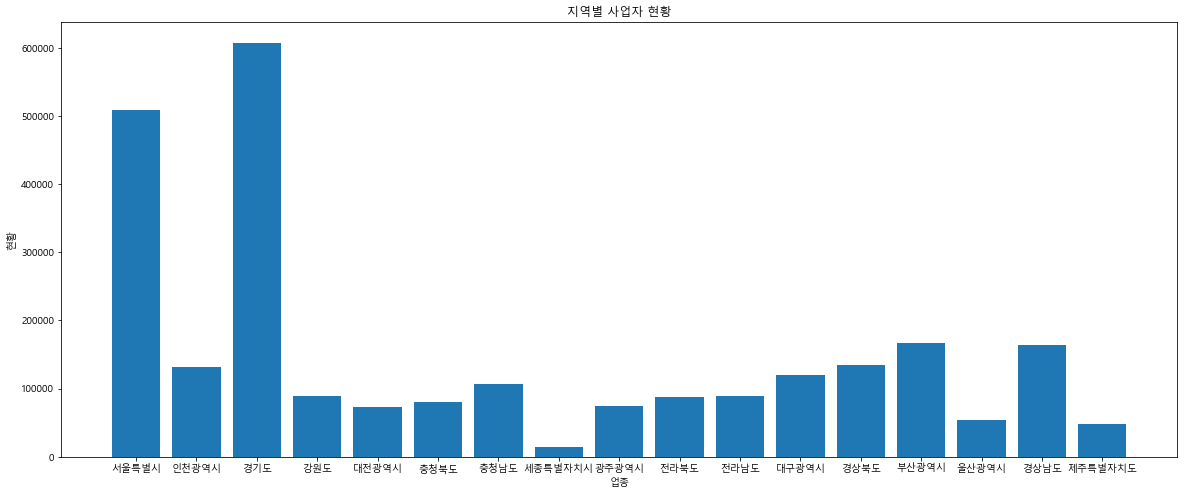

In [181]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize = (20,8))
plt.title('지역별 사업자 현황')
plt.bar(df_2020_12['시도'],
        df_2020_12['현황'])
plt.xlabel('업종')
plt.ylabel('현황')

   + 경기도, 서울특별시 등 수도권 지역과 부산광역시, 인천광역시 등 광역시 지역의 사업자 수가 대체적으로 높은 것을 확인 할 수 있다.
   + 각 시도별로 업종 현황을 원그래프로 나타내면 아래와 같이 나타낼 수 있다.

In [196]:
ㅌdf_2020_12['현황'].iloc[1]

131544

([<matplotlib.patches.Wedge at 0x2176e2e0a60>,
 [Text(0.9721482554853128, 0.7035110300179117, '서울특별시'),
  Text(0.18617795808806636, 1.1854694293494703, '인천광역시'),
  Text(-0.8226648955115369, 0.8736260468260961, '경기도'),
  Text(-1.1988657908161144, -0.052161437967643734, '강원도'),
  Text(-1.164438332675758, -0.28997132512595364, '대전광역시'),
  Text(-1.0888351574727058, -0.5044184769131562, '충청북도'),
  Text(-0.9452346871846575, -0.7392776110115352, '충청남도'),
  Text(-0.8254380828265702, -0.8710062981515095, '세종특별자치시'),
  Text(-0.7260292855281529, -0.9554483118177979, '광주광역시'),
  Text(-0.5222196210792496, -1.0804104161659334, '전라북도'),
  Text(-0.2755641903593828, -1.1679316662337647, '전라남도'),
  Text(0.032328798864612096, -1.1995644412719026, '대구광역시'),
  Text(0.4016391728454984, -1.1307899782169915, '경상북도'),
  Text(0.7839585931614155, -0.9085201837099574, '부산광역시'),
  Text(0.9986804518142646, -0.6653099692354358, '울산광역시'),
  Text(1.1394095783134568, -0.376491451227715, '경상남도'),
  Text(1.19795307278462

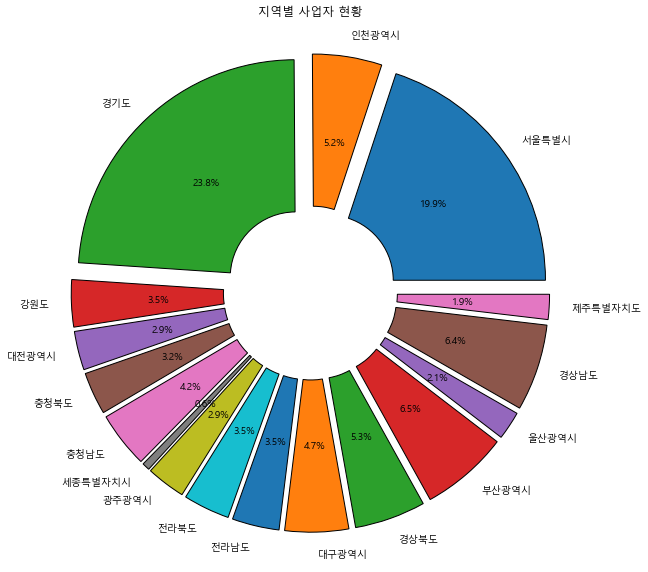

In [209]:
 plt.figure(figsize = (10,10))
plt.title('지역별 사업자 현황')
plt.pie(df_2020_12['현황'],
        labels = df_2020_12['시도'],
        autopct='%.1f%%',
        explode = [0.1 for i in range(len(df_2020_12))],
        wedgeprops = {'width': 0.7, 'edgecolor' : 'black', 'linewidth': 1}
       )

### 2.업종별 사업자 현황
   + 업종별 사업자의 현황을 파악하기 위해, 주어진 데이터셋 중 가장 최근의 데이터셋인 2020년 12월의 사업자별 합계를 파악한다.

In [210]:
df_2020_12 = pd.read_excel('Big_Data_12_HWDataset/사업자 현황(2020년 12월 100대 생활업종).xlsx', 
                           sheet_name = '100대 생활업종', 
                           skiprows = list(np.arange(5)))
df_2020_12 = df_2020_12.dropna()
df_2020_12

업종       시도   시군구      당월①      전월②  증감율(①/②)    전년동월③ 증감율(①/③)
0       업종전체       합계    합계  2548586  2544505    1.0016  2397281  1.06312
1       업종전체    서울특별시    합계   508188   507899   1.00057   477788  1.06363
2       업종전체    서울특별시   종로구    17122    17145  0.998659    16783   1.0202
3       업종전체    서울특별시    중구    18726    18790  0.996594    18617  1.00585
4       업종전체    서울특별시   용산구    14500    14503  0.999793    13679  1.06002
...      ...      ...   ...      ...      ...       ...      ...      ...
25899  휴대폰가게     경상남도   거창군       30       30         1       27  1.11111
25900  휴대폰가게     경상남도   합천군        8        7   1.14286        6  1.33333
25901  휴대폰가게  제주특별자치도    합계      244      247  0.987854      234  1.04274
25902  휴대폰가게  제주특별자치도   제주시      194      198  0.979798      189  1.02646
25903  휴대폰가게  제주특별자치도  서귀포시       50       49   1.02041       45  1.11111

[25904 rows x 8 columns]

   + 데이터 셋을 통해 100대 생활업종의 업종별 사업자의 현황을 파악할 수 있다.

In [211]:
df_2020_12 = df_2020_12[(df_2020_12['업종'] != '업종전체') 
                        & (df_2020_12['시군구'] == '합계') 
                        & (df_2020_12['시도'] == '합계')]
df_2020_12.rename(columns = {'당월①': '현황'}, inplace = True)
df_2020_12 = df_2020_12[['업종', '현황']]
df_2020_12

업종      현황
268    LPG 충전소    1611
521        PC방    9970
787        가구점    7650
1054   가전제품수리점   16962
1322   가전제품판매점   10186
...        ...     ...
24576    한식전문점  397465
24844     헬스클럽    8569
25101    호프전문점   29002
25369    화장품가게   35004
25637    휴대폰가게   18737

[100 rows x 2 columns]

   + 100대 생활업종의 업종별 사업현황을 막대그래프로 나타내면 아래와 같이 나타낼 수 있다. (더블 클릭시 시도별 업종현황을 확인 가능)

Text(0, 0.5, '현황')

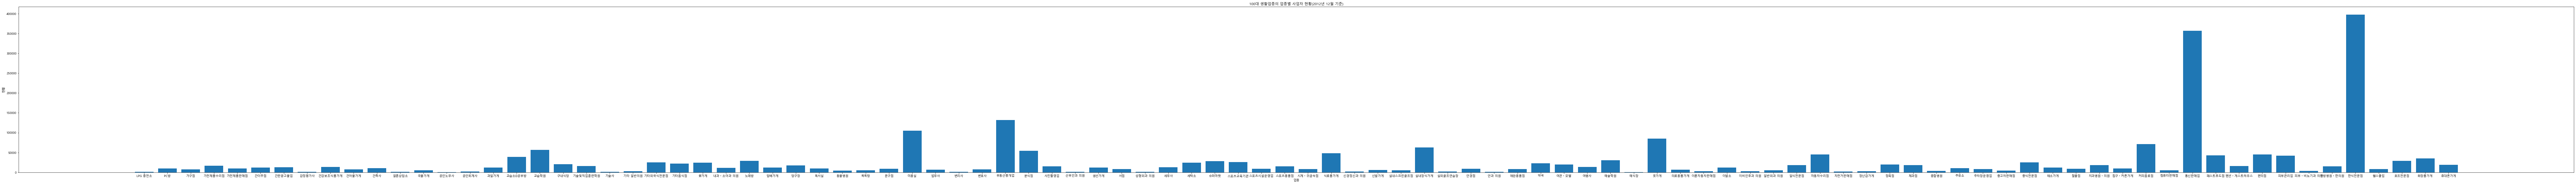

In [216]:
plt.figure(figsize =(150,10))
plt.title('100대 생활업종의 업종별 사업자 현황(2012년 12월 기준)')
plt.bar(df_2020_12['업종'],
        df_2020_12['현황'])
plt.xlabel('업종')
plt.ylabel('현황')

([<matplotlib.patches.Wedge at 0x21ea76fa100>,
 [Text(1.1999976338440521, 0.002383016717715017, 'LPG 충전소'),
  Text(1.199841341223883, 0.019512967228839745, 'PC방'),
  Text(1.1991345540272398, 0.04556666915513226, '가구점'),
  Text(1.1972005082206088, 0.08192034616819135, '가전제품수리점'),
  Text(1.1937892645588588, 0.12193109457402262, '가전제품판매점'),
  Text(1.1899669122122327, 0.15485072760592586, '간이주점'),
  Text(1.1845798469489468, 0.1917565805974078, '간판광고물업'),
  Text(1.18103417264742, 0.2125047835673928, '감정평가사'),
  Text(1.1768390909498723, 0.2346268399230539, '건강보조식품가게'),
  Text(1.170251209319849, 0.2655411589291411, '건어물가게'),
  Text(1.1640864702001967, 0.2913806615011488, '건축사'),
  Text(1.1595509292899282, 0.3089363079711807, '결혼상담소'),
  Text(1.156955207683755, 0.3185194615929138, '곡물가게'),
  Text(1.1545577090271013, 0.3271031894159572, '공인노무사'),
  Text(1.153405101103091, 0.33114448923297635, '공인회계사'),
  Text(1.1474596062268176, 0.3511928986722211, '과일가게'),
  Text(1.1227571937032712, 0.42357559

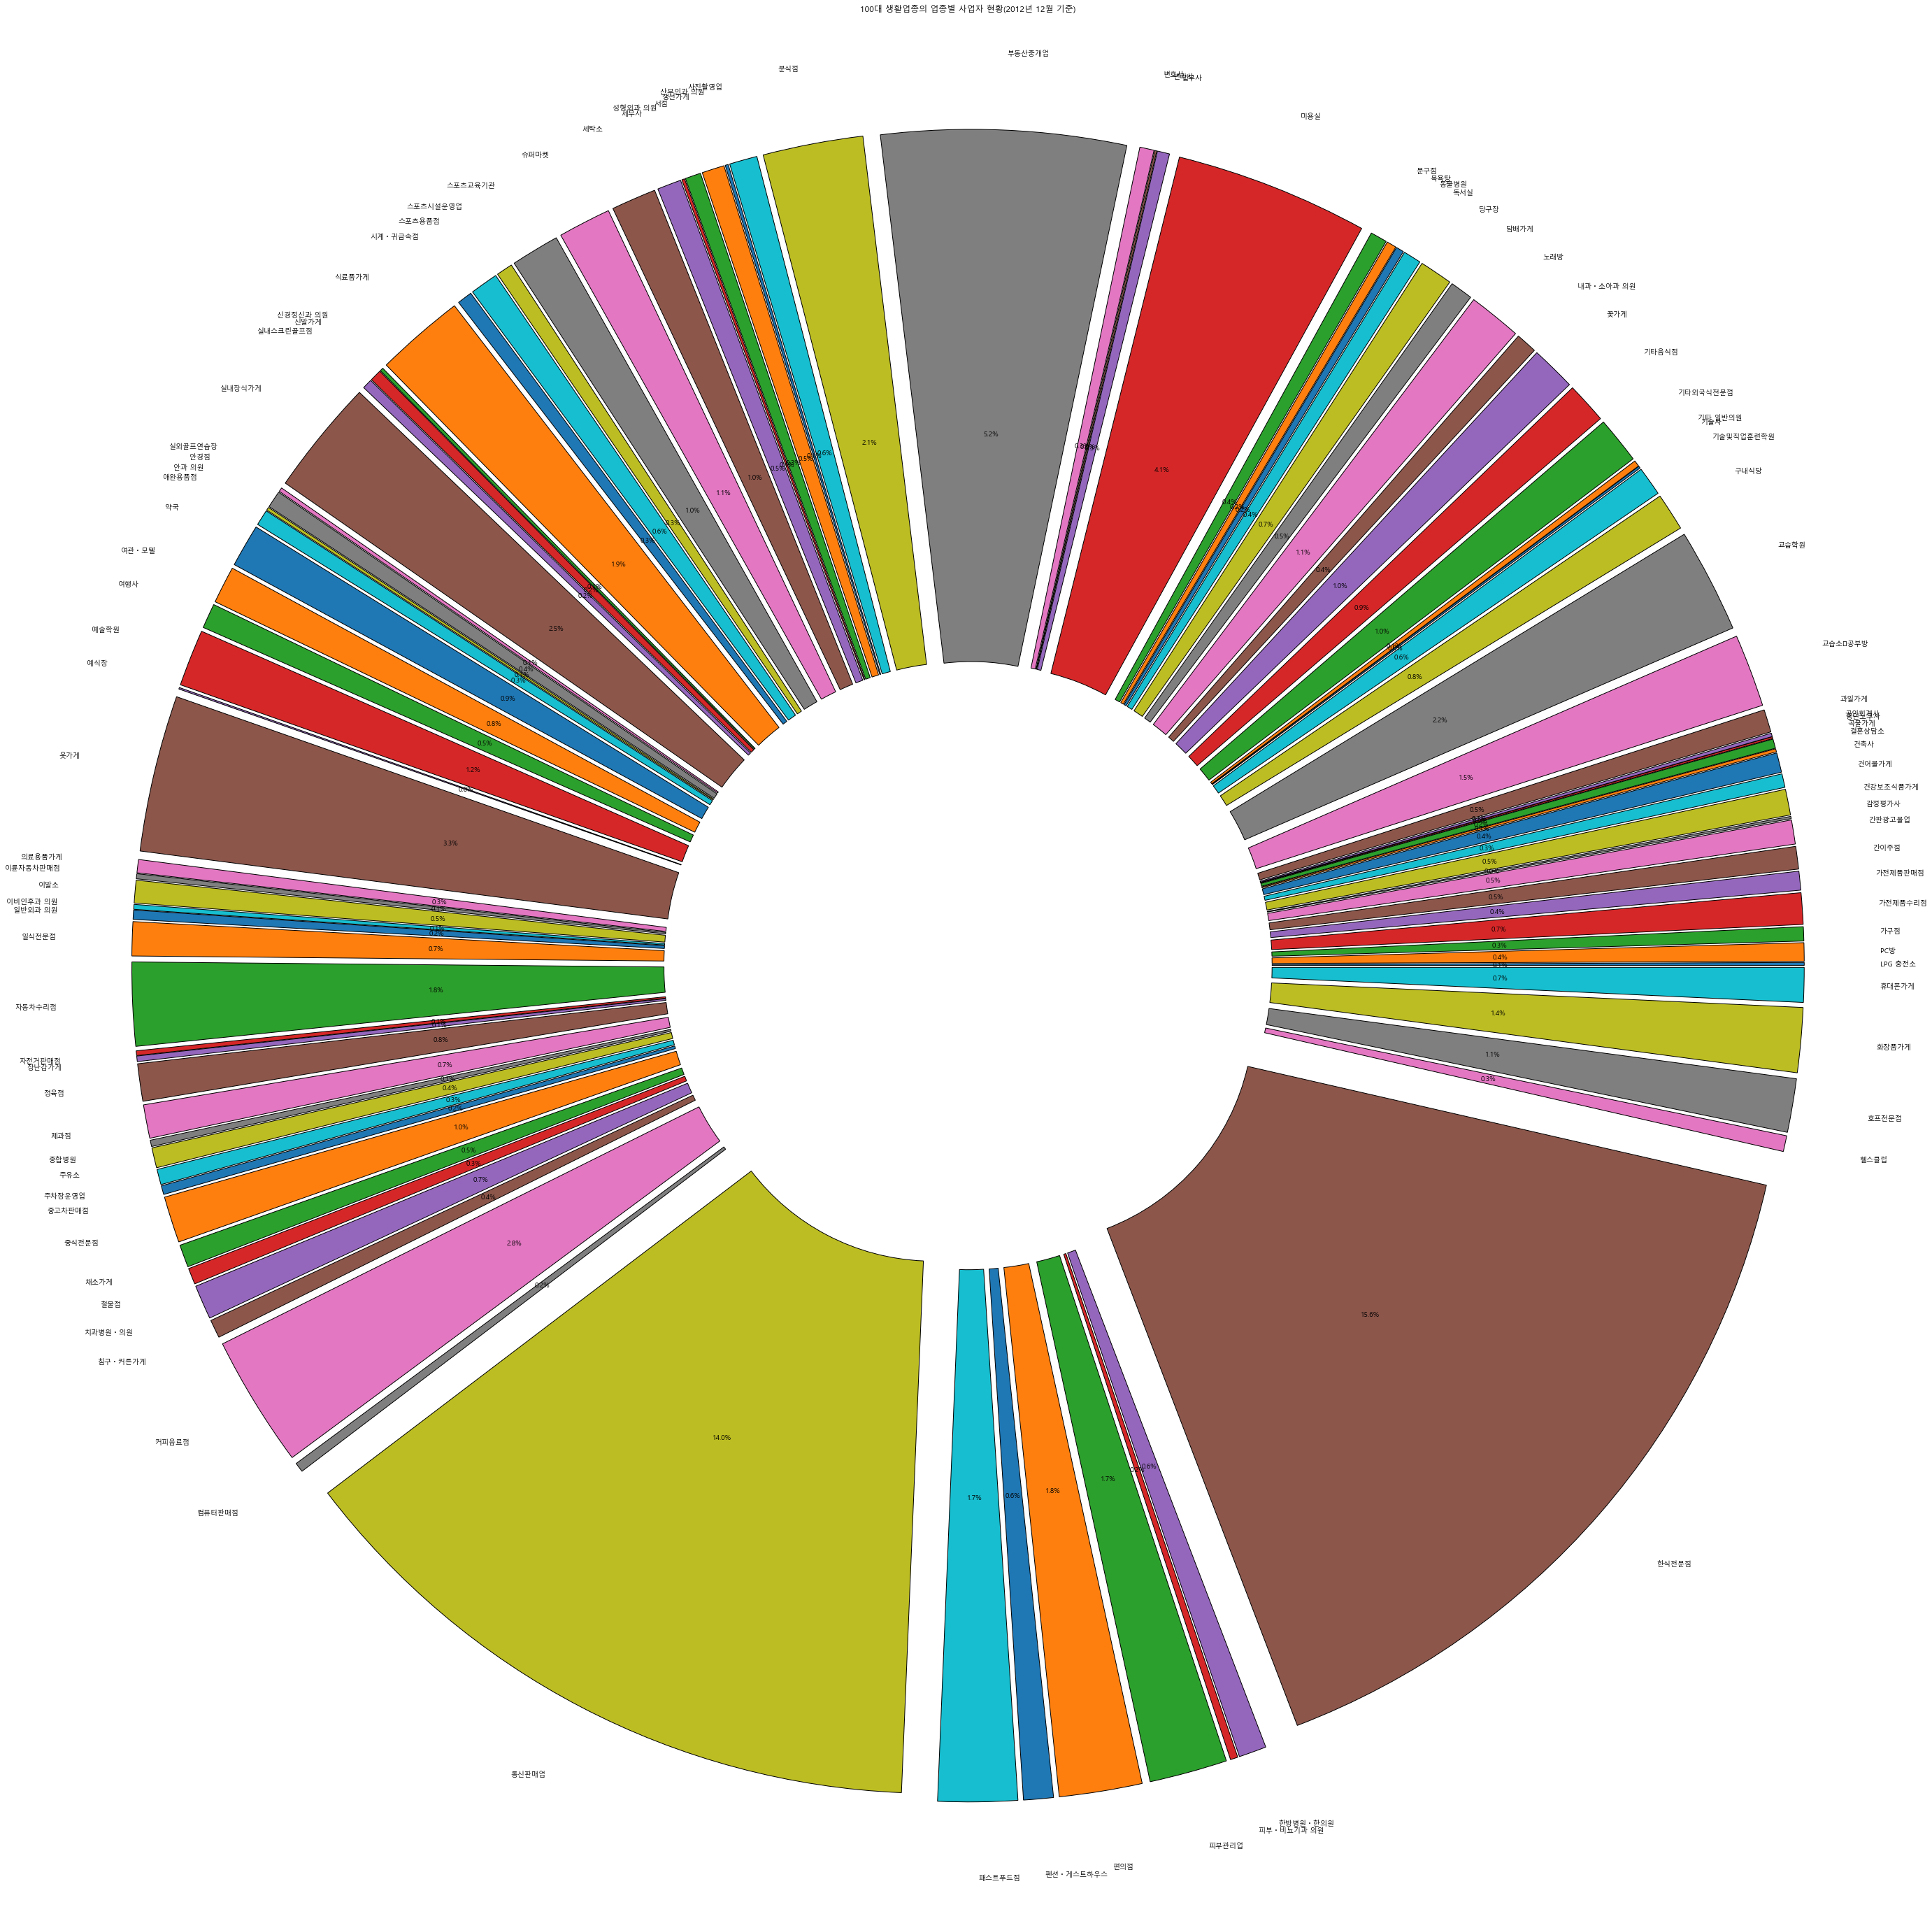

In [49]:
plt.figure(figsize = (50,50))
plt.title('100대 생활업종의 업종별 사업자 현황(2012년 12월 기준)')
plt.pie(df_2020_12['현황'],
        labels=df_2020_12['업종'], 
        autopct='%.1f%%',
        explode = [0.1 for i in range(len(df_2020_12))],
        wedgeprops = {'width': 0.7, 'edgecolor' : 'black', 'linewidth': 1}
       )

### 3. 지역별 주요 업종 비교
   + 지역별 주요 업종을 파악하기 위해, 분석 기간에 해당하는 전체 데이터셋의 지역별 업종 평균 현황 수를 계산한다.
   + 경로에 해당하는 24개월 동안의 전체 데이터셋을 읽고, 합친다.

In [3]:
dataset = [x for x in Path('./Big_Data_12_HWDataset').glob("*.xlsx")] ## 경로상의 xlsx 파일이름 저장
dataset.sort()
dataset

[WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 01월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 02월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 03월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 04월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 05월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 06월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 07월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 08월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 09월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 10월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 11월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 12월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2020년 01월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2020년 02월 100대 생활업종).

In [138]:
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                      sheet_name = '100대 생활업종',
                      skiprows = list(np.arange(5)))
    if i ==0 :
        df_col = df.columns
        df_concat = df
    else:
        df.columns = df_col ## 중간에 컬럼이 다른 excel 존재
        df_concat = pd.concat([df_concat,df])

df_concat = df_concat.dropna()        
df_concat

업종       시도   시군구      당월①      전월②  증감율(①/②)    전년동월③ 증감율(①/③)
0       업종전체       합계    합계  2295565  2284042   1.00505  2226964   1.0308
1       업종전체    서울특별시    합계   458980   456392   1.00567   447058  1.02667
2       업종전체    서울특별시   종로구    16497    16451    1.0028    16201  1.01827
3       업종전체    서울특별시    중구    18154    18083   1.00393    17972  1.01013
4       업종전체    서울특별시   용산구    13222    13131   1.00693    12939  1.02187
...      ...      ...   ...      ...      ...       ...      ...      ...
25899  휴대폰가게     경상남도   거창군       30       30         1       27  1.11111
25900  휴대폰가게     경상남도   합천군        8        7   1.14286        6  1.33333
25901  휴대폰가게  제주특별자치도    합계      244      247  0.987854      234  1.04274
25902  휴대폰가게  제주특별자치도   제주시      194      198  0.979798      189  1.02646
25903  휴대폰가게  제주특별자치도  서귀포시       50       49   1.02041       45  1.11111

[605158 rows x 8 columns]

   + 합쳐진 데이터셋을 통해 24개월 동안 지역별 업종을 파악한다.

In [177]:
df = df_concat[(df_concat['업종']!= '업종전체') &
               (df_concat['업종']!= ' 업종전체') &
               (df_concat['업종']!= '업종') &
              (df_concat['시군구'] == '합계') &
              (df_concat['시도'] != '합계')][['업종','시도','당월①']]
df.rename(columns = {'당월①': '현재수'}, inplace = True)
df

업종       시도   현재수
270      가구점    서울특별시  1015
296      가구점    인천광역시   292
308      가구점      경기도  1873
351      가구점      강원도   300
370      가구점    대전광역시   214
...      ...      ...   ...
25831  휴대폰가게     경상북도  1052
25855  휴대폰가게    부산광역시  1343
25872  휴대폰가게    울산광역시   508
25878  휴대폰가게     경상남도  1329
25901  휴대폰가게  제주특별자치도   244

[40759 rows x 3 columns]

In [178]:
for i in range(len(df)): ## 데이터 셋마다 업종의 이름이 다른 경우가 존재하기 떄문에 통일시켜줌
    if df.iloc[i][0] == 'pc방':
        df.iloc[i][0] = 'PC방'
    elif df.iloc[i][0] == '교습소ㆍ공부방':
        df.iloc[i][0] = '교습소･공부방'
    elif df.iloc[i][0] == 'LPG충전소':
        df.iloc[i][0] = 'LPG 충전소'
    elif df.iloc[i][2] == '*':
        df.iloc[i][2] = 0

   + 지역과 업종 기준으로 분석기간 동안 현황의 합을 피봇테이블로 나타내어 시각화 한다.

In [182]:
df = df[['업종','시도','현재수']]
df.rename(columns = {'현재수': '합산'}, inplace = True)
df = df.groupby(['시도','업종']).sum()
df

합산
시도   업종             
강원도  LPG 충전소    2264
     PC방       10319
     가구점        7250
     가전제품수리점   12991
     가전제품판매점   11044
...              ...
충청북도 한식전문점    368766
     헬스클럽       6372
     호프전문점     41300
     화장품가게     24579
     휴대폰가게     13149

[1700 rows x 1 columns]

   + 지역별 주요 업종은 분석 기간동안 지역의 업종별 업체 현황의 합산을 정렬하여, 상위 5개의 업종으로 한다.

In [273]:
conv = []
for i in range(len(df.index)):
    if i == 0:
        conv.append(df.index[i][0])
    else:
        if df.index[i][0] != df.index[i-1][0]:
            conv.append(df.index[i][0])

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

   + 상위 5개의 업종을 지역별 다중그래프 형식으로 막대그래프와 원 그래프를 이용하여 시각화 한다.

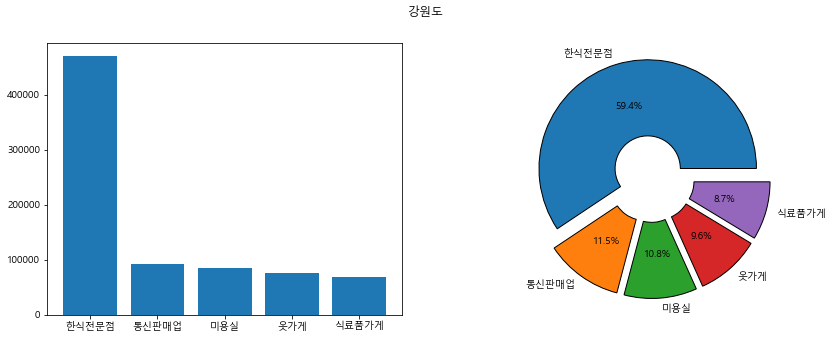

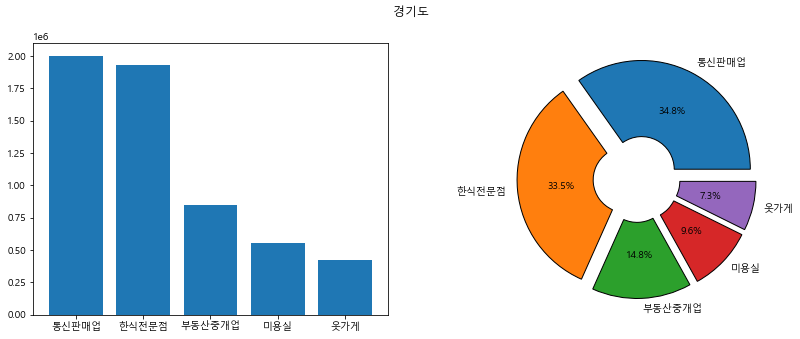

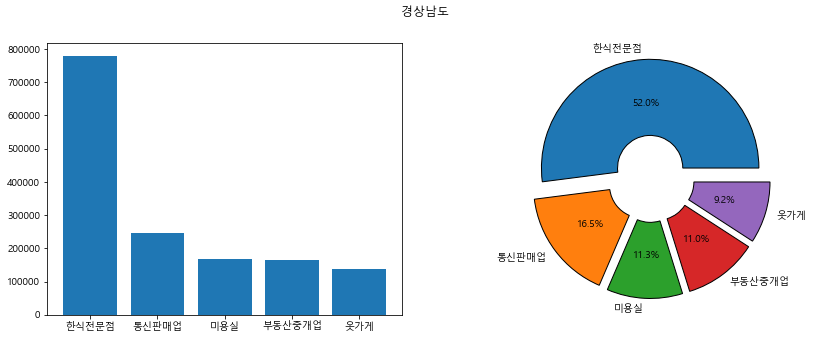

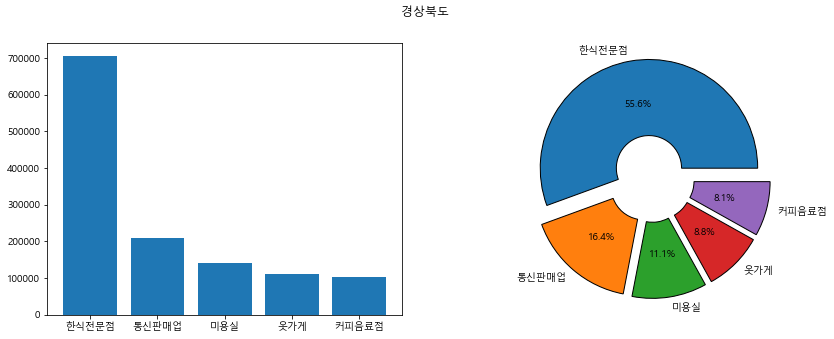

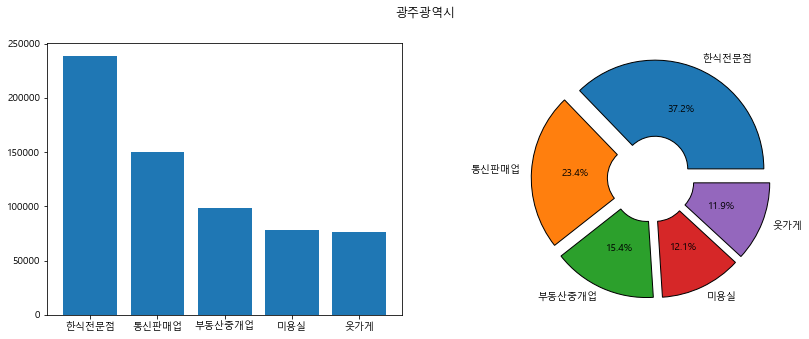

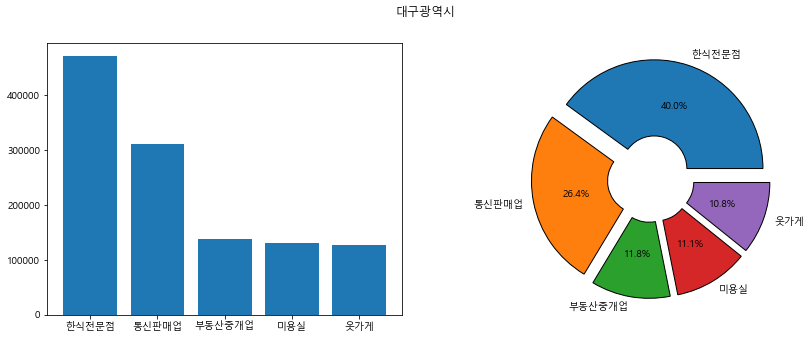

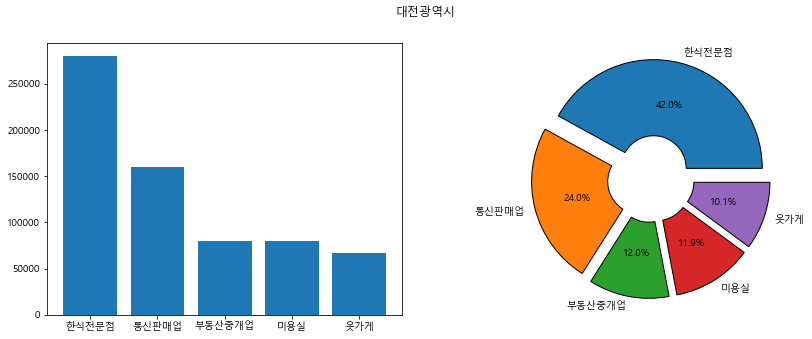

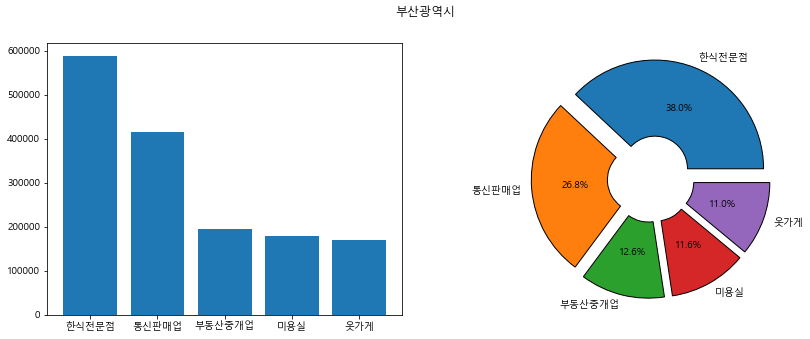

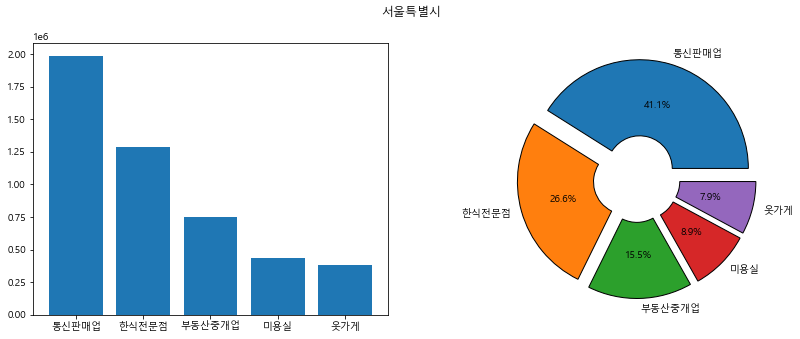

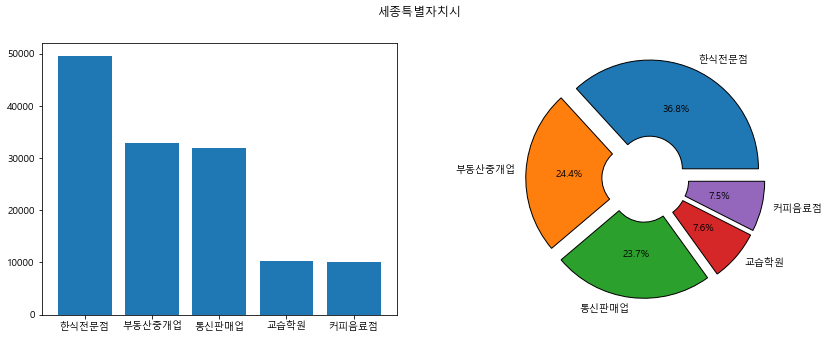

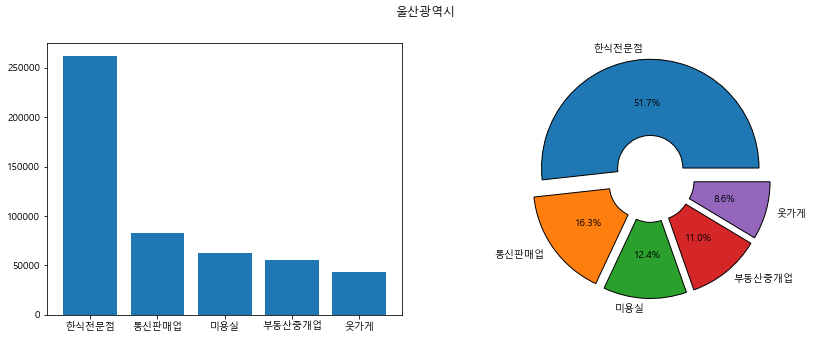

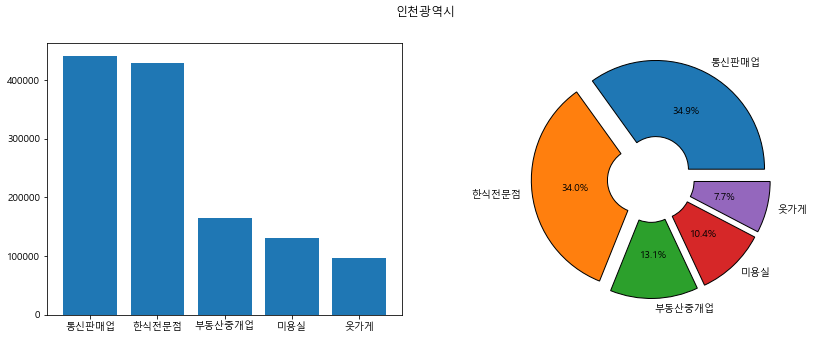

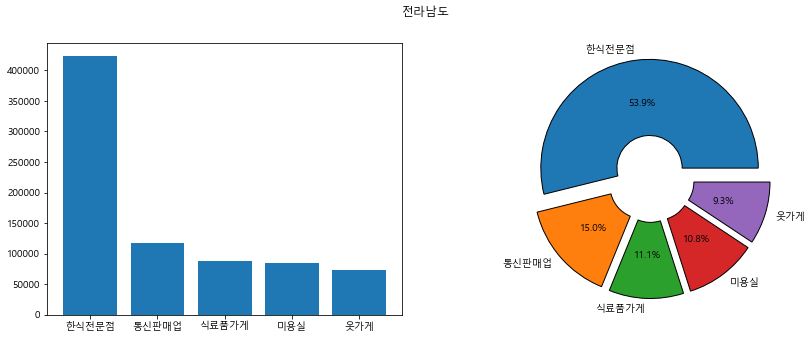

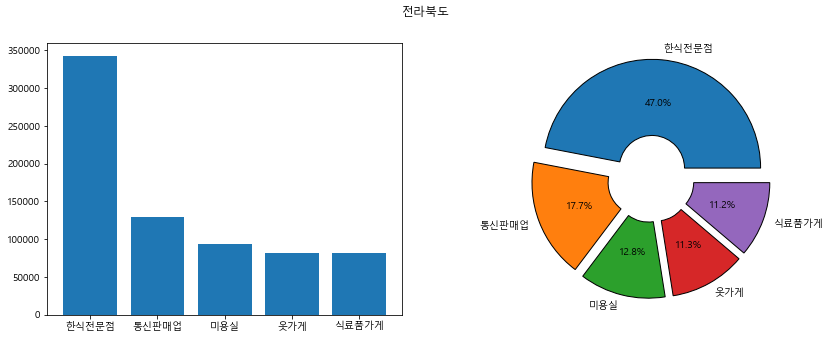

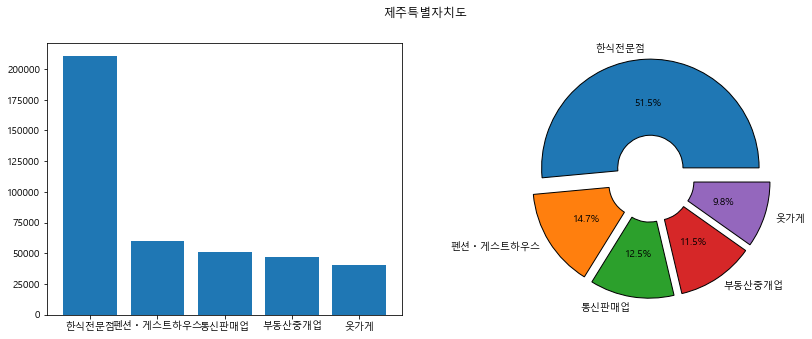

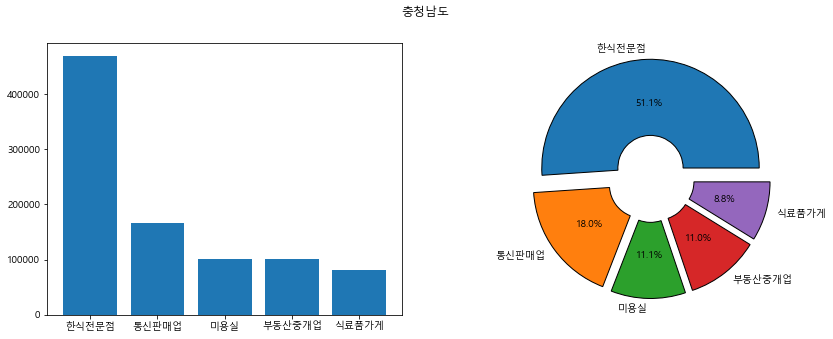

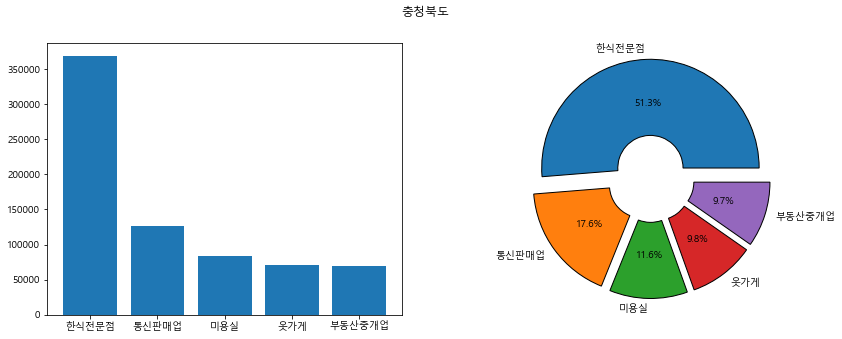

In [272]:
for i in range(len(conv)):
    main_df = df.query("시도 == '{}'".format(conv[i])).sort_values(by=['합산'], ascending = False).iloc[0:5]
    fig, ax = plt.subplots(1,2, figsize = (14,5))
    plt.suptitle(conv[i])
    ax[0].bar([x[1] for x in main_df.index], main_df['합산'])
    ax[1].pie(main_df['합산'],
        labels=[x[1] for x in main_df.index], 
        autopct='%.1f%%',
        explode = [0.1 for i in range(len(main_df.index))],
        wedgeprops = {'width': 0.7, 'edgecolor' : 'black', 'linewidth': 1}
       )

   + 모든지역에서 한식전문점이 가장 큰 비율을 차지하고 있는 것을 확인 할 수있고, 통신판매업, 미용실, 부동산중개업, 식료품가게와 같이 주변에서 쉽게 볼 수 있는 업종이 그뒤를 잇는 모습을 볼 수 있다.

### 4. 코로나 전후의 사업자수 변화
   + 코로나 19(COVID-19)은 대한민국 인천국제공항에 2020년 1월 8일 첫 발생함으로써, 한국에 유행이 시작되었으므로, 분석 기간 중 코로나 전은 2019년 1월 이전인 2019년 1월 ~ 2019년 12월, 코로나 후는 2020년 1월 ~ 2020년 12월로 한다.
   + 사업자 수는 업종과 관계 없이 월별 전체 사업자수로 한다. 

In [4]:
dataset = [x for x in Path('./Big_Data_12_HWDataset').glob("*.xlsx")] ## 경로상의 xlsx 파일이름 저장
dataset.sort()
dataset

[WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 01월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 02월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 03월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 04월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 05월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 06월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 07월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 08월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 09월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 10월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 11월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 12월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2020년 01월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2020년 02월 100대 생활업종).

   + 코로나 이전의 월별 사업자수와 이후의 월별 사업자 수를 리스트로 구성한다.

In [5]:
ls_member_before = []
ls_member_after = []
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                      sheet_name = '100대 생활업종',
                      skiprows = list(np.arange(5)))
    df = df.dropna()
    if i < len(dataset)/2 :
        ls_member_before.append(df.iloc[0,3])
    else:
        ls_member_after.append(df.iloc[0,3])
    print(dataset[i],df.iloc[0,3],df.columns[3])

Big_Data_12_HWDataset\사업자 현황(2019년 01월 100대 생활업종).xlsx 2295565 당월①
Big_Data_12_HWDataset\사업자 현황(2019년 02월 100대 생활업종).xlsx 2305692 당월①
Big_Data_12_HWDataset\사업자 현황(2019년 03월 100대 생활업종).xlsx 2313927 당월①
Big_Data_12_HWDataset\사업자 현황(2019년 04월 100대 생활업종).xlsx 2326567 당월①
Big_Data_12_HWDataset\사업자 현황(2019년 05월 100대 생활업종).xlsx 2337954 당월①
Big_Data_12_HWDataset\사업자 현황(2019년 06월 100대 생활업종).xlsx 2350456 당월①
Big_Data_12_HWDataset\사업자 현황(2019년 07월 100대 생활업종).xlsx 2360274 당월
Big_Data_12_HWDataset\사업자 현황(2019년 08월 100대 생활업종).xlsx 2369932 당월
Big_Data_12_HWDataset\사업자 현황(2019년 09월 100대 생활업종).xlsx 2376170 당월①
Big_Data_12_HWDataset\사업자 현황(2019년 10월 100대 생활업종).xlsx 2389698 당월①
Big_Data_12_HWDataset\사업자 현황(2019년 11월 100대 생활업종).xlsx 2400922 당월①
Big_Data_12_HWDataset\사업자 현황(2019년 12월 100대 생활업종).xlsx 2397281 당월①
Big_Data_12_HWDataset\사업자 현황(2020년 01월 100대 생활업종).xlsx 2407656 당월①
Big_Data_12_HWDataset\사업자 현황(2020년 02월 100대 생활업종).xlsx 2415709 당월①
Big_Data_12_HWDataset\사업자 현황(2020년 03월 100대 생활업종).xlsx 2418349 당

   + 코로나 이전의 사업자수와 이후의 사업자 수를 그래프로 시각화 한다.
   + 연속적인 시간이므로 위, 아래로 위치가 아닌 옆으로 길게 늘여 시각화한다.
   + 옆으로 길게 늘여 표현하기 위해, x의 인덱스는 총 2019년 1월 ~ 2020년 12월까지로 한다.

In [6]:
xindex = []
for i in range(24):
    if i < 12:
        xindex.append('19년 {}월'.format(i+1))
    else:
        xindex.append('20년 {}월'.format(i-11))

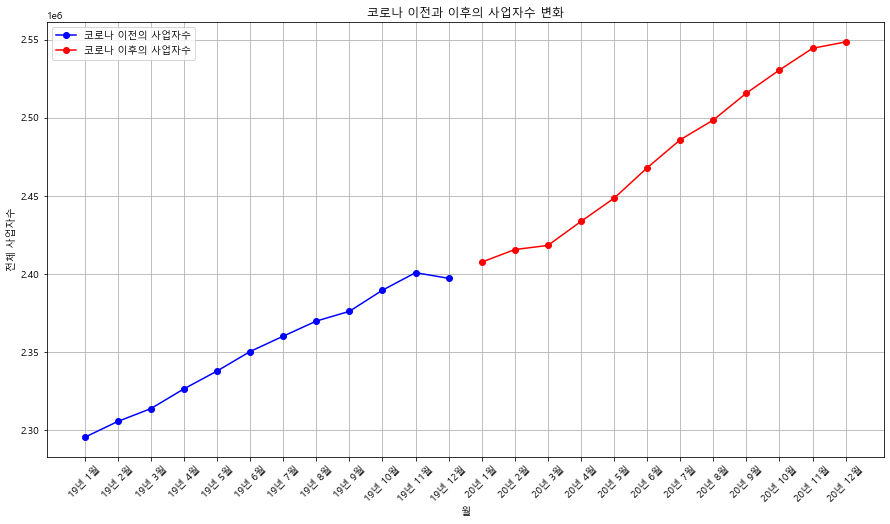

In [9]:
plt.figure(figsize = (15,8))
plt.title('코로나 이전과 이후의 사업자수 변화')
plt.plot(list(range(1,13)), ls_member_before, 'bo-',label = '코로나 이전의 사업자수')
plt.plot(list(range(13,25)), ls_member_after, 'ro-',label = '코로나 이후의 사업자수')
plt.xticks(list(range(1,25)),labels = xindex, rotation = 45)
plt.xlabel('월')
plt.ylabel('전체 사업자수')
plt.grid(True)
plt.legend()

   + 코로나 이전과 비교하여 코로나 이후임에도 불구하고 전체 사업자 수는 19년 12월을 제외하고 계속하여 증가하는 추세로 진행되는 것을 확인할 수 있다.
   + 코로나 이전과 이후의 전월과 비교한 사업자수의 증감율을 월별로 시각화 한다.
   + 전년 동월과의 비교를 위해 같은 x축에 이전, 이후의 증감율을 막대그래프로 표현한다.

In [217]:
ls_incperc_before = []
ls_incperc_after = []
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                      sheet_name = '100대 생활업종',
                      skiprows = list(np.arange(5)))
    df = df.dropna()
    if i < len(dataset)/2 :
        ls_incperc_before.append(df.iloc[0,5])
    else:
        ls_incperc_after.append(df.iloc[0,5])

In [25]:
xindex = []
sub=[]
for i in range(12):
    xindex.append('{}월'.format(i+1))
    sub.append(ls_incperc_after[i]-ls_incperc_before[i])

([<matplotlib.axis.XTick at 0x2176c522160>,
 [Text(0.2, 0, '1월'),
  Text(1.2, 0, '2월'),
  Text(2.2, 0, '3월'),
  Text(3.2, 0, '4월'),
  Text(4.2, 0, '5월'),
  Text(5.2, 0, '6월'),
  Text(6.2, 0, '7월'),
  Text(7.2, 0, '8월'),
  Text(8.2, 0, '9월'),
  Text(9.2, 0, '10월'),
  Text(10.2, 0, '11월'),
  Text(11.2, 0, '12월')])

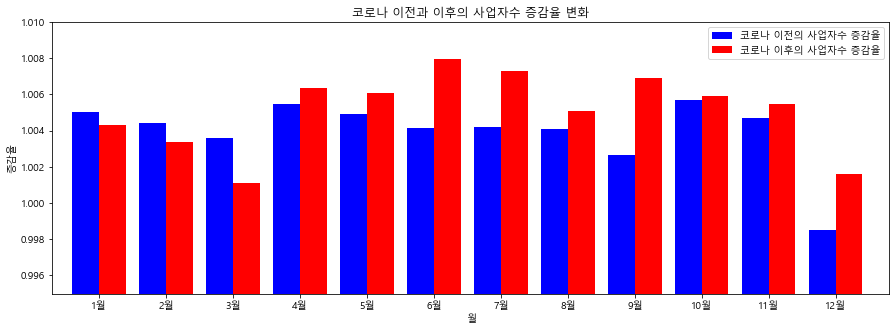

In [49]:
x = np.arange(len(xindex))
w = 0.4

plt.figure(figsize = (15,5))
plt.title('코로나 이전과 이후의 사업자수 증감율 변화')
plt.xlabel('월')
plt.ylabel('증감율')
plt.bar(x,ls_incperc_before, color = 'blue', width = w, label = '코로나 이전의 사업자수 증감율')
plt.bar(x+w,ls_incperc_after, color = 'red', width = w, label = '코로나 이후의 사업자수 증감율')
plt.axis([-0.5,12,0.995,1.010])
plt.legend(loc='best')

plt.xticks(x+w/2,xindex)


   + 1월, 2월, 3월을 제외하고 전년 동월과 비교하여 코로나 이후임에도 불구하고 사업자수 증감율이 전체적으로 더 높은 것을 확인 할 수 있다.
   + 코로나 이전의 평균 사업자수 증감율과, 코로나 이후의 평균 사업자수 증감율을 막대그래프로 시각화 한다

Text(0, 0.5, '증감율')

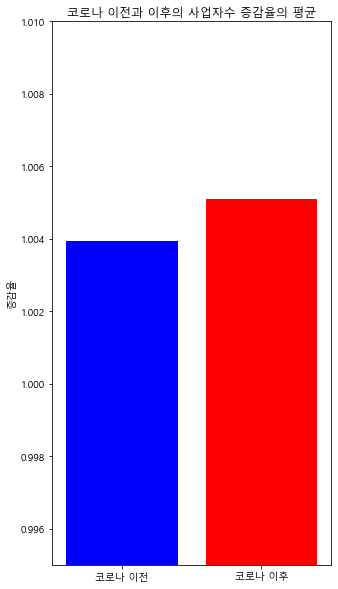

In [52]:
plt.figure(figsize = (5,10))
plt.title('코로나 이전과 이후의 사업자수 증감율의 평균')
plt.bar(['코로나 이전', '코로나 이후'],
        [np.mean(ls_incperc_before),np.mean(ls_incperc_after)],
        color = ['blue','red'])
plt.axis([-0.5,1.5,0.995,1.010])
plt.ylabel('증감율')

   + 평균적으로 시각화 하였을때도, 코로나 이전의 사업자수 증감율 보다 코로나 이후의 사업자수의 증감율이 더 큼을 확인할 수 있다.

### 5. 코로나 이후 감소한 업종

   + 월별로 업종별 합계를 코로나 이전과 이후로 나누어 비교한다. 5. 절에서는 코로나 이후에 감소한 업종에 대해서만 분석하고, 시각화한다.

In [67]:
dataset = [x for x in Path('./Big_Data_12_HWDataset').glob("*.xlsx")] ## 경로상의 xlsx 파일이름 저장
dataset.sort()
dataset

[WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 01월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 02월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 03월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 04월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 05월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 06월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 07월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 08월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 09월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 10월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 11월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2019년 12월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2020년 01월 100대 생활업종).xlsx'),
 WindowsPath('Big_Data_12_HWDataset/사업자 현황(2020년 02월 100대 생활업종).

In [55]:
for i in range(len(dataset)):
    df = pd.read_excel(dataset[i],
                      sheet_name = '100대 생활업종',
                      skiprows = list(np.arange(5)))
    if i ==0 :
        df_col = df.columns
        df_concat = df
    else:
        df.columns = df_col ## 중간에 컬럼명이 다른 excel 존재
        df_concat = pd.concat([df_concat,df])

df_concat = df_concat.dropna()        
df_concat

업종       시도   시군구      당월①      전월②  증감율(①/②)    전년동월③ 증감율(①/③)
0       업종전체       합계    합계  2295565  2284042   1.00505  2226964   1.0308
1       업종전체    서울특별시    합계   458980   456392   1.00567   447058  1.02667
2       업종전체    서울특별시   종로구    16497    16451    1.0028    16201  1.01827
3       업종전체    서울특별시    중구    18154    18083   1.00393    17972  1.01013
4       업종전체    서울특별시   용산구    13222    13131   1.00693    12939  1.02187
...      ...      ...   ...      ...      ...       ...      ...      ...
25899  휴대폰가게     경상남도   거창군       30       30         1       27  1.11111
25900  휴대폰가게     경상남도   합천군        8        7   1.14286        6  1.33333
25901  휴대폰가게  제주특별자치도    합계      244      247  0.987854      234  1.04274
25902  휴대폰가게  제주특별자치도   제주시      194      198  0.979798      189  1.02646
25903  휴대폰가게  제주특별자치도  서귀포시       50       49   1.02041       45  1.11111

[605158 rows x 8 columns]

In [97]:
df = df_concat[(df_concat['업종']!= '업종전체') &
               (df_concat['업종']!= ' 업종전체') &
               (df_concat['업종']!= '업종') &
              (df_concat['시군구'] == '합계') &
              (df_concat['시도'] == '합계')][['업종', '당월①']]
df.rename(columns = {'당월①': '연합계'}, inplace = True)
df

업종     연합계
269        가구점    7450
537    가전제품수리점   13299
806    가전제품판매점    9817
1075      간이주점   15649
1341    간판광고물업   12897
...        ...     ...
24576    한식전문점  397465
24844     헬스클럽    8569
25101    호프전문점   29002
25369    화장품가게   35004
25637    휴대폰가게   18737

[2400 rows x 2 columns]

In [98]:
for i in range(len(df)): ## 데이터 셋마다 업종의 이름이 다른 경우가 존재하기 떄문에 통일시켜줌
    if df.iloc[i][0] == 'pc방':
        df.iloc[i][0] = 'PC방'
    elif df.iloc[i][0] == '교습소ㆍ공부방':
        df.iloc[i][0] = '교습소･공부방'
    elif df.iloc[i][0] == 'LPG충전소':
        df.iloc[i][0] = 'LPG 충전소'
    elif df.iloc[i][1] == '*':
        df.iloc[i][1] = 0

   + 데이터를 아래로 concat 하였기 때문에 전체 길이에서 앞 1/2는 코로나 전인 2019년의 데이터, 뒤 1/2은 코로나 후인 2020년의 데이터이다.

In [99]:
len(df) ## 100개업종 * 2년(24개월) = 2400 이여야만함!, 2400 아니면 다시확인

2400

In [118]:
df_before = df[:1200]
df_after = df[1200:]
print(len(df_before),len(df_after))

1200 1200


   + 코로나 이전과 이후의 데이터프레임을 업종 기준 합계로 피봇테이블을 형성한다.

In [119]:
df_before_group = df_before.groupby(df_before['업종']).sum()
df_before_group

연합계
업종              
LPG 충전소    19363
PC방       123975
가구점        89888
가전제품수리점   177083
가전제품판매점   120158
...          ...
한식전문점    4598590
헬스클럽       89327
호프전문점     408765
화장품가게     421014
휴대폰가게     216430

[100 rows x 1 columns]

In [120]:
df_after_group = df_after.groupby(df_after['업종']).sum()
df_after_group

연합계
업종              
LPG 충전소    19306
PC방       121122
가구점        90653
가전제품수리점   199162
가전제품판매점   121499
...          ...
한식전문점    4705519
헬스클럽       98090
호프전문점     373371
화장품가게     419841
휴대폰가게     221947

[100 rows x 1 columns]

   + 업종별로 코로나 이전의 연합계, 코로나 이후의 연합계를 비교하여 코로나 이후의 연합계가 큰 작은 업종은 5.절에서 다루고, 코로나 이후의 연합계가 큰 업종은 6.절에서 다룬다.

In [124]:
ls_inc = []
ls_dec = []
for i in range(len(df_after_group)):
    if df_before_group['연합계'][i] > df_after_group['연합계'][i]: 
        ## 코로나 이전의 연합계와 이후의 연합계가 같은 업종 존재 X
        ls_dec.append(list(df_before_group.index)[i])
    else:
        ls_inc.append(list(df_before_group.index)[i])

   + 코로나 이후 감소한 업종은 간이주점, 기타음식점, 노래방 등 총 26개이다

In [125]:
print(len(ls_dec),ls_dec)

26 ['LPG 충전소', 'PC방', '간이주점', '구내식당', '기타음식점', '노래방', '담배가게', '당구장', '독서실', '목욕탕', '문구점', '슈퍼마켓', '시계ㆍ귀금속점', '식료품가게', '신발가게', '실외골프연습장', '여관ㆍ모텔', '여행사', '예식장', '옷가게', '일식전문점', '자전거판매점', '철물점', '침구ㆍ커튼가게', '호프전문점', '화장품가게']


In [142]:
xindex = []
for i in range(24):
    if i < 12:
        xindex.append('19년 {}월'.format(i+1))
    else:
        xindex.append('20년 {}월'.format(i-11))

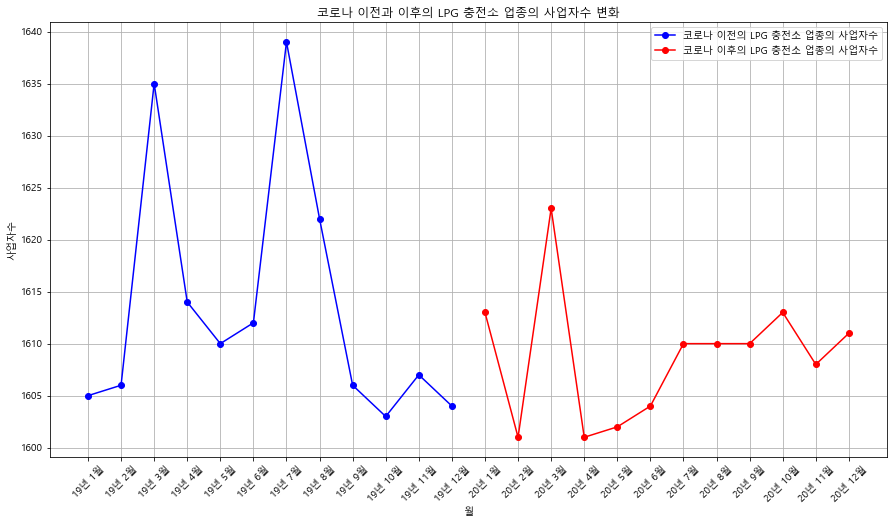

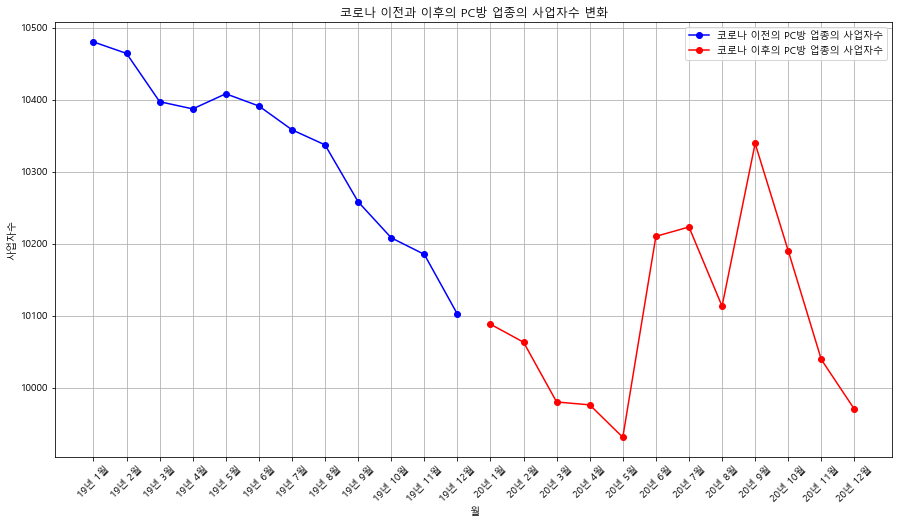

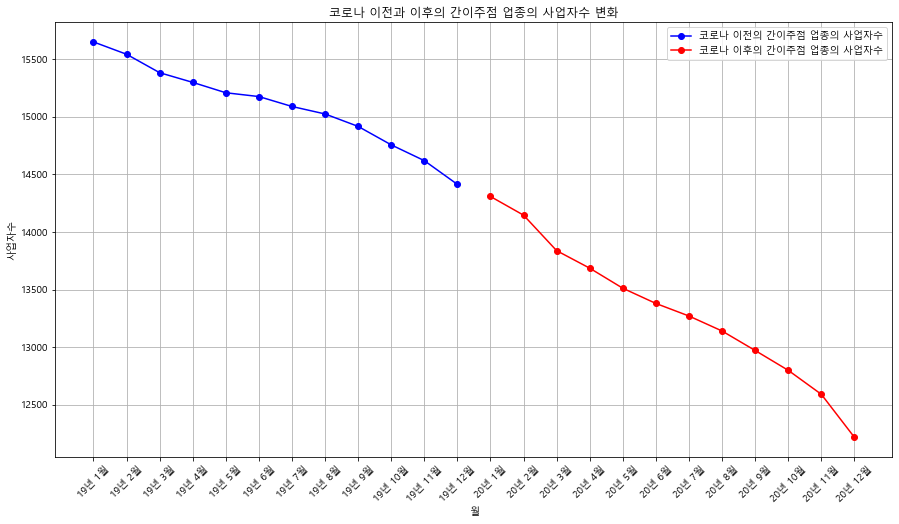

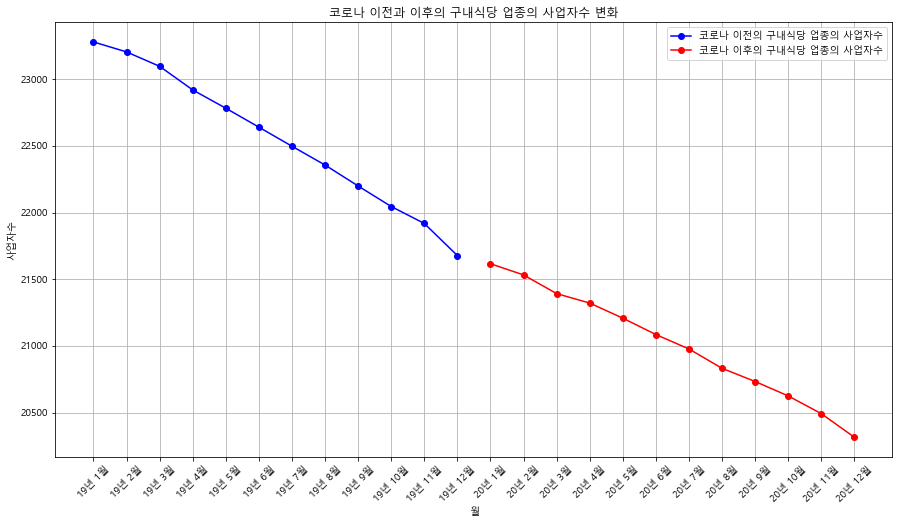

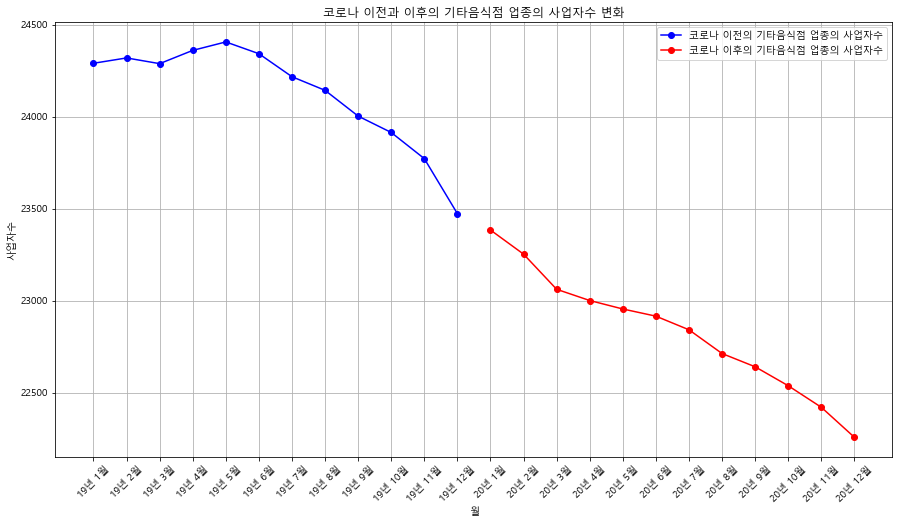

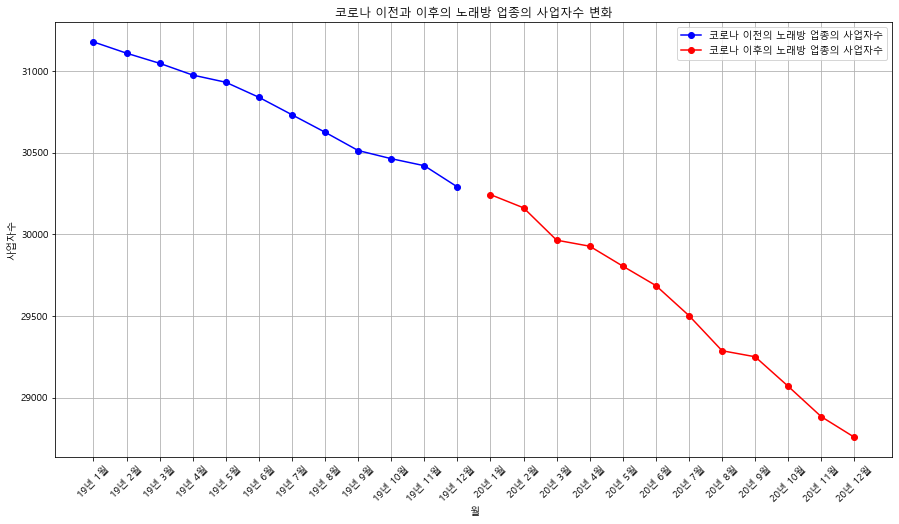

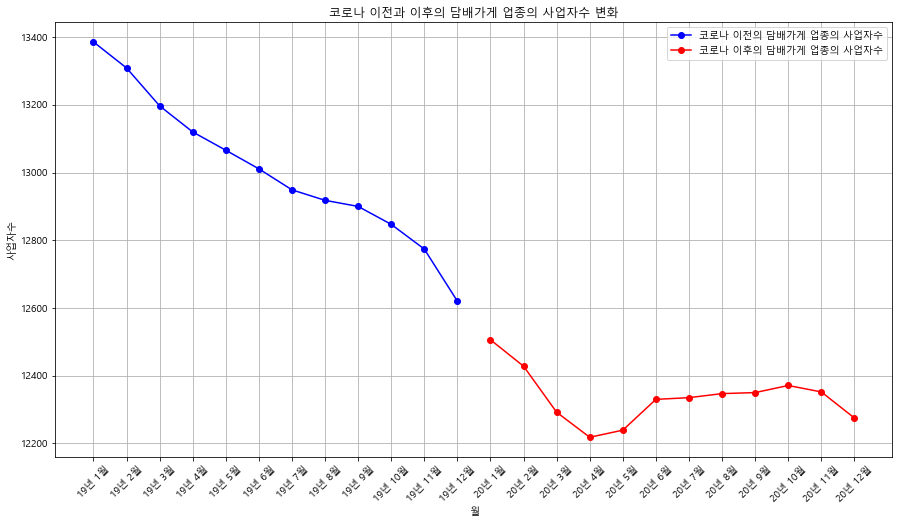

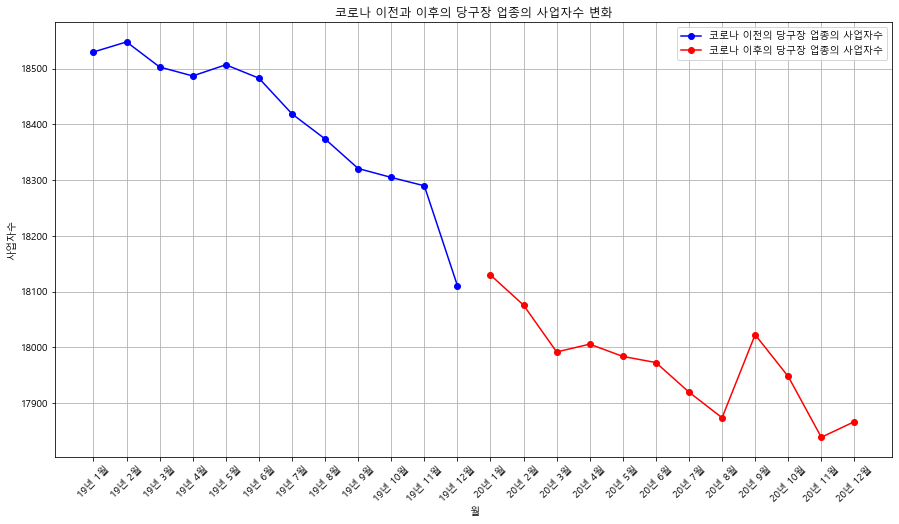

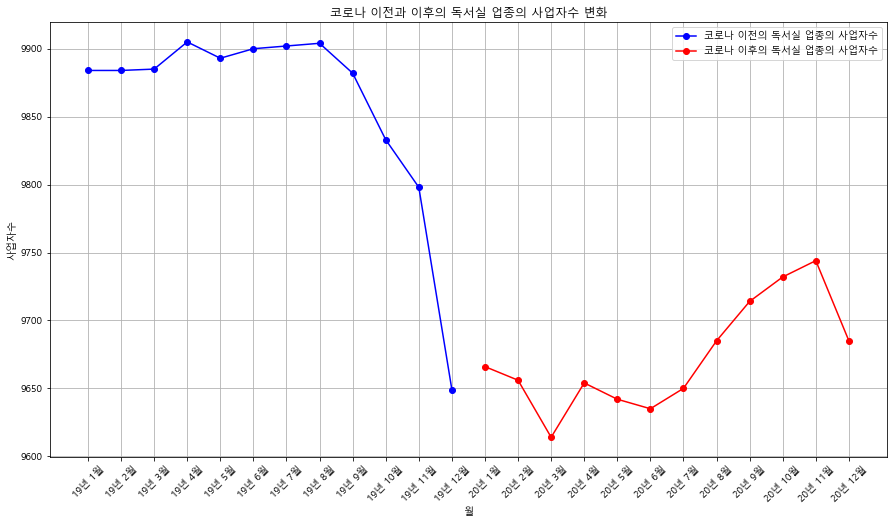

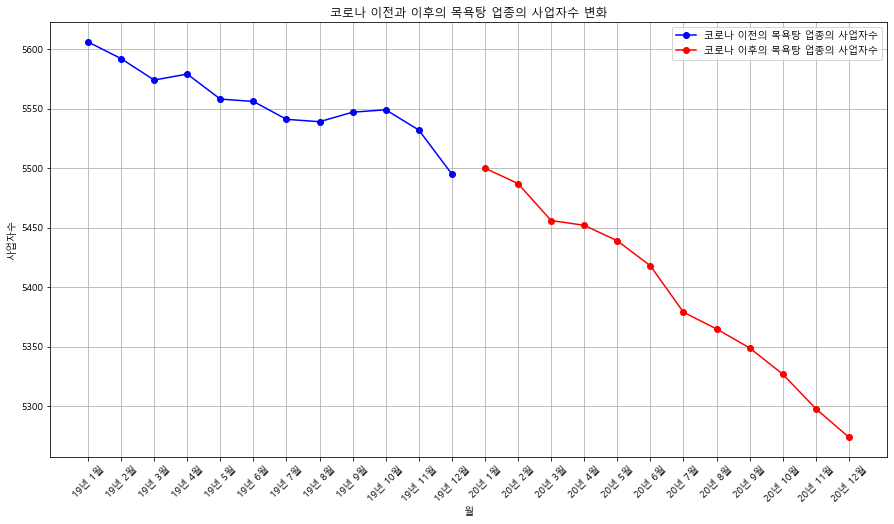

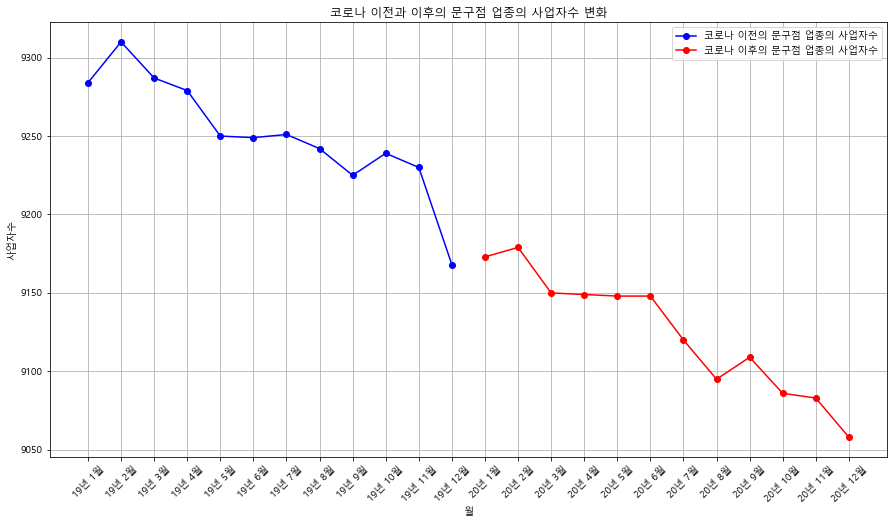

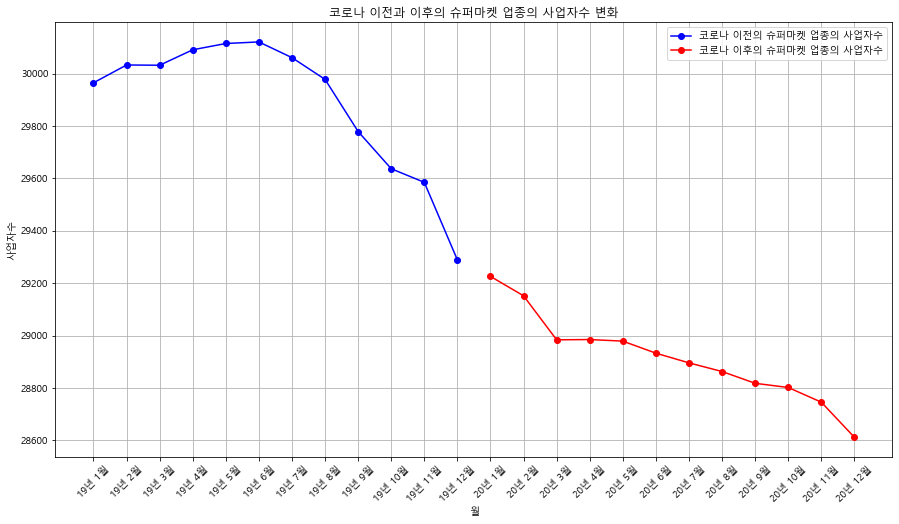

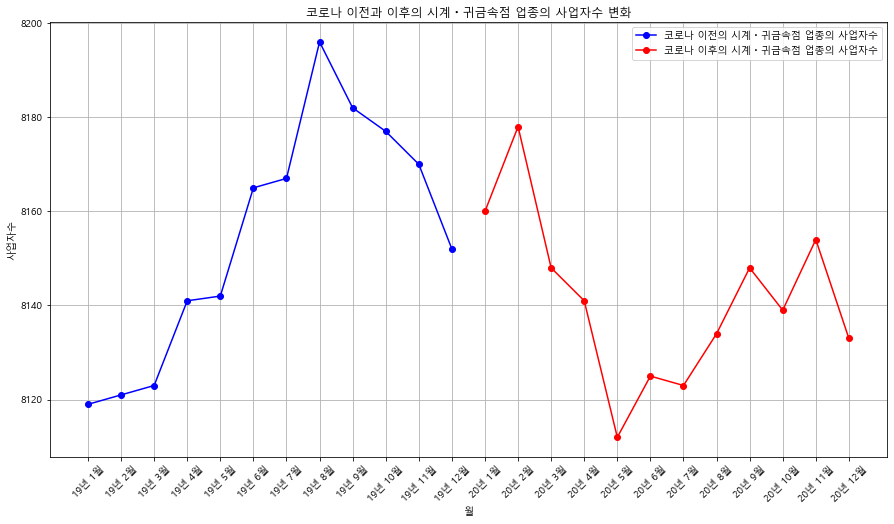

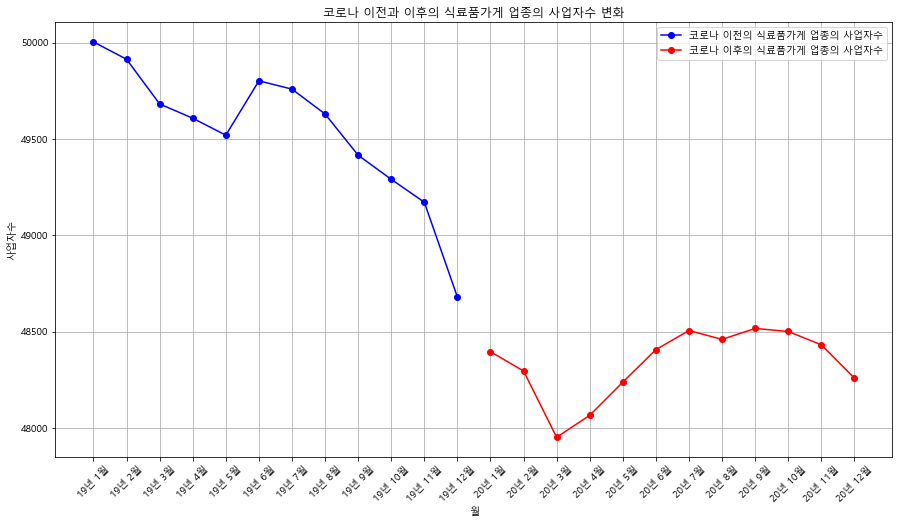

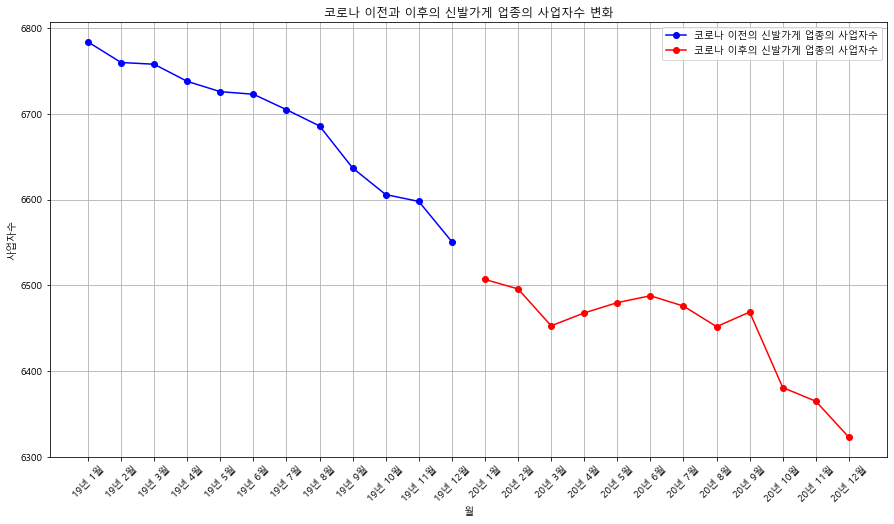

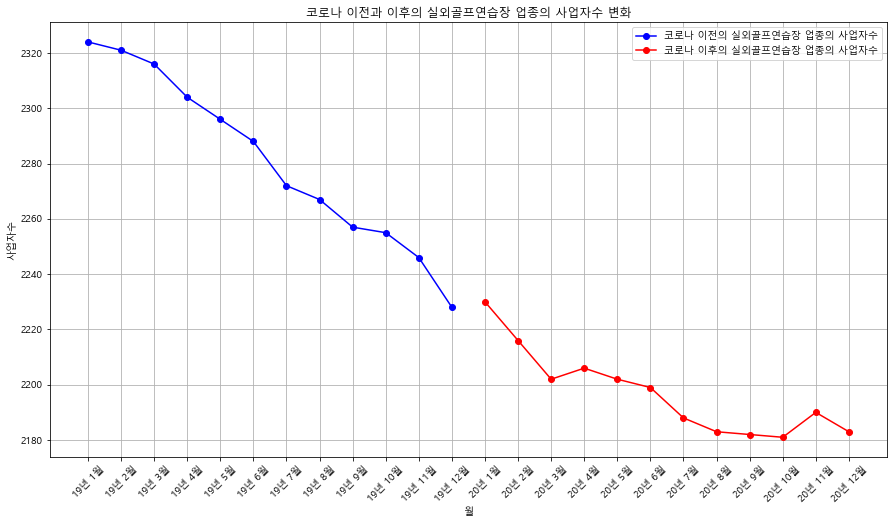

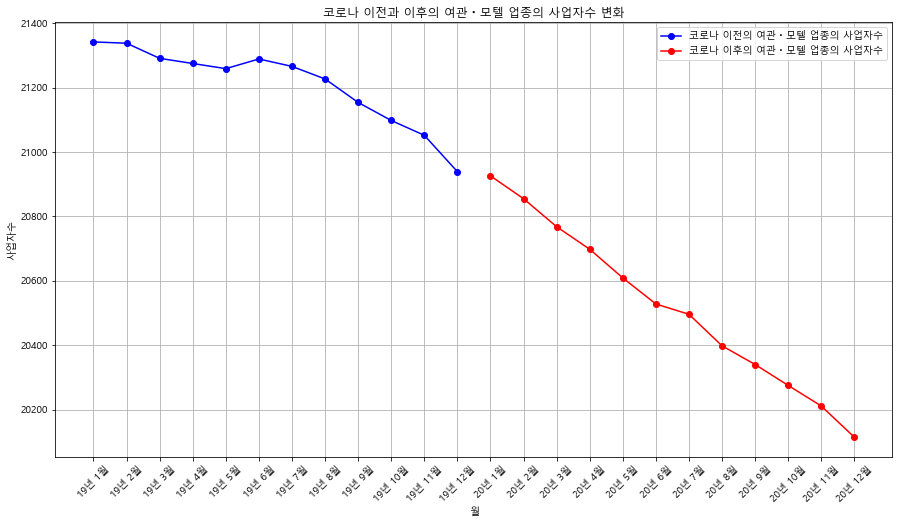

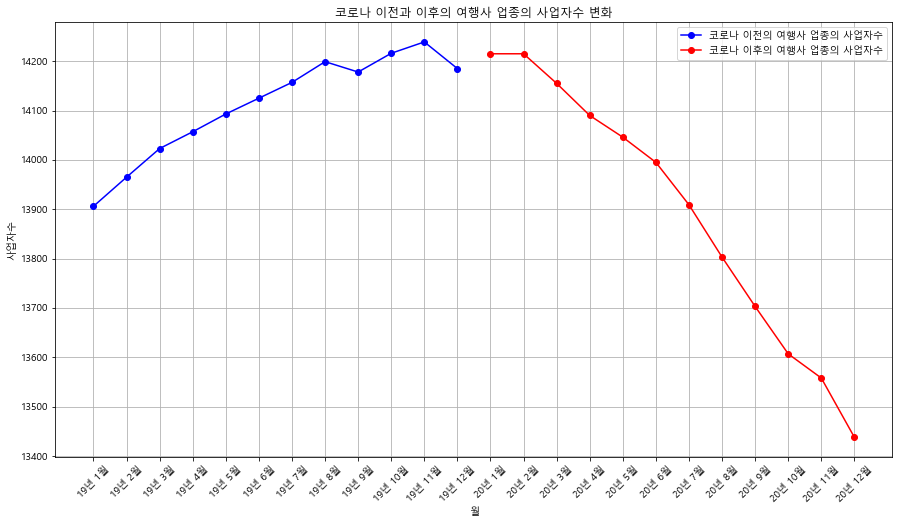

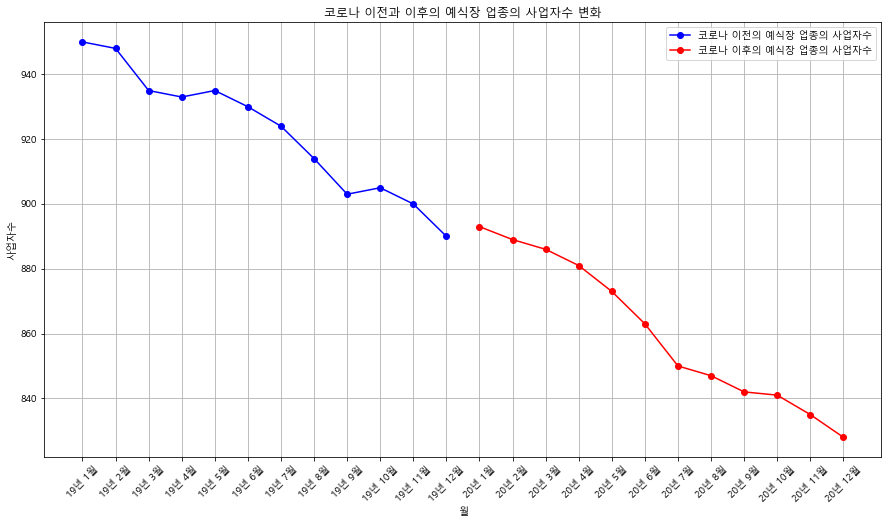

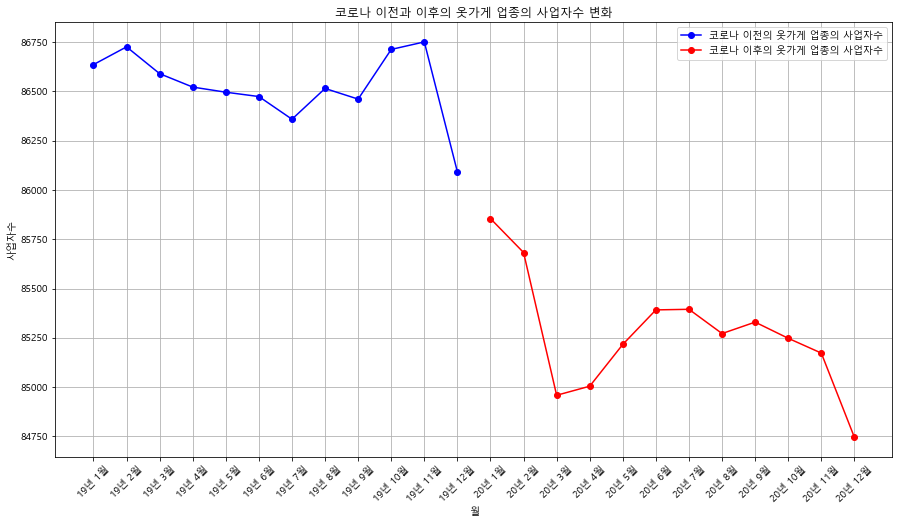

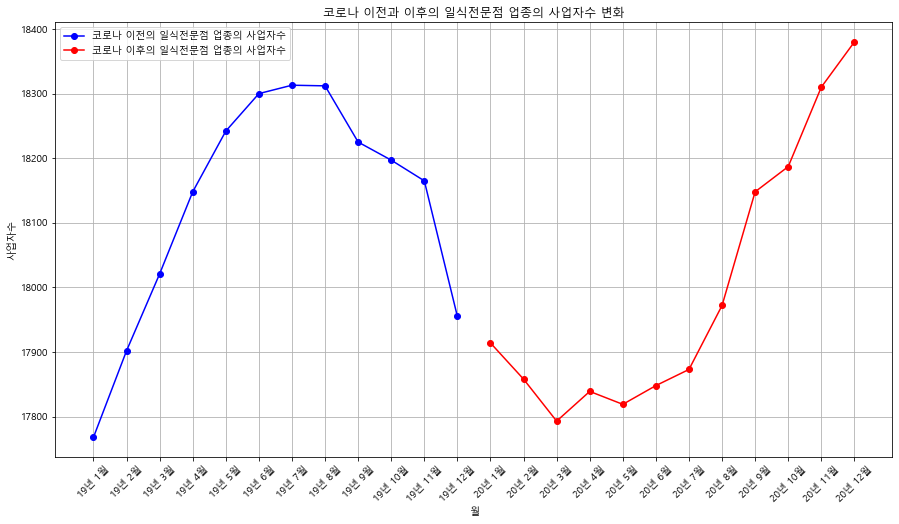

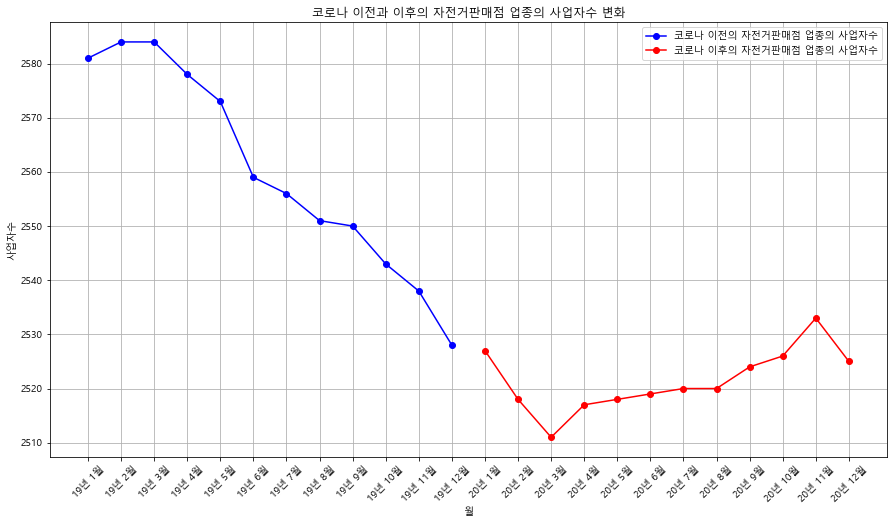

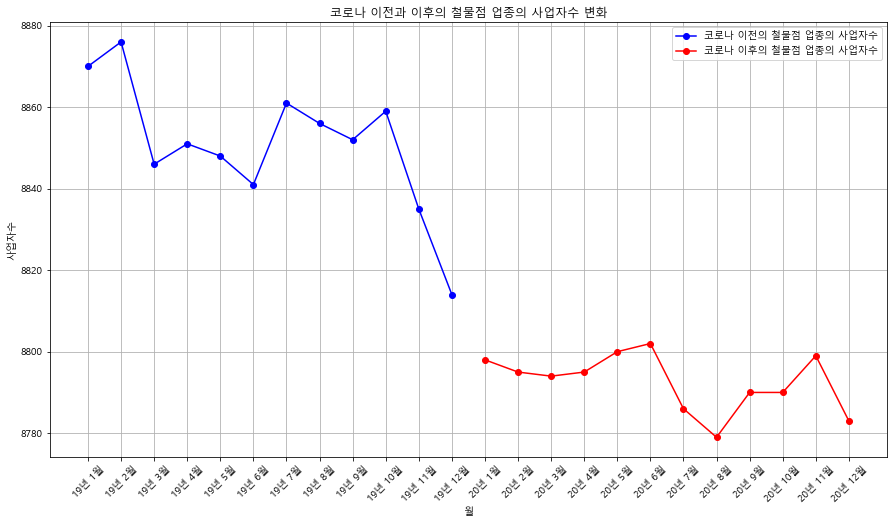

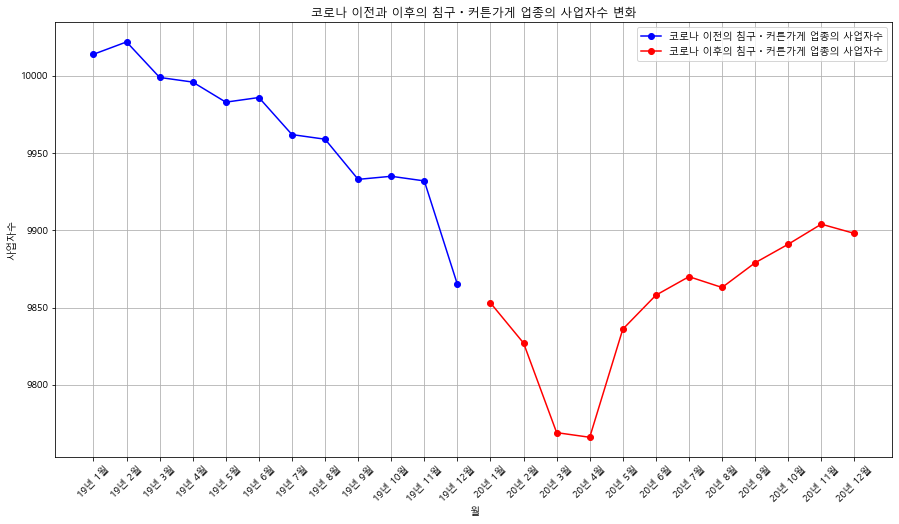

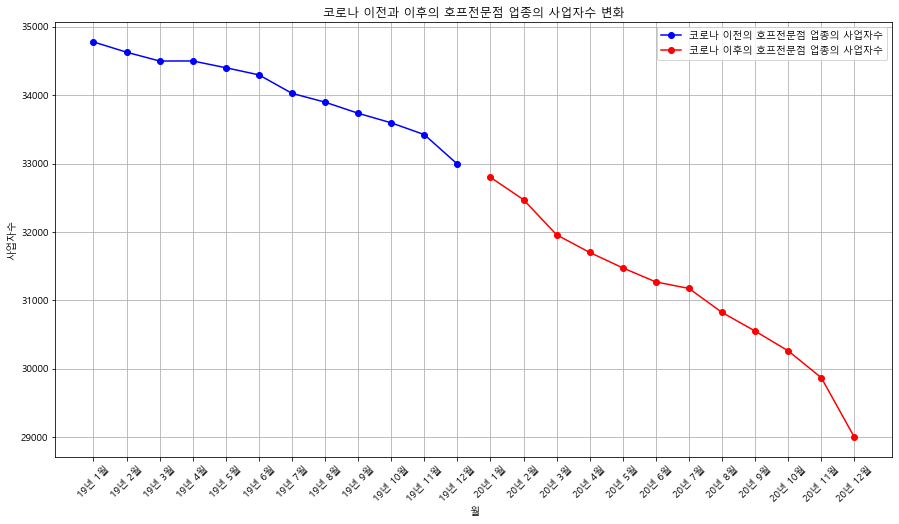

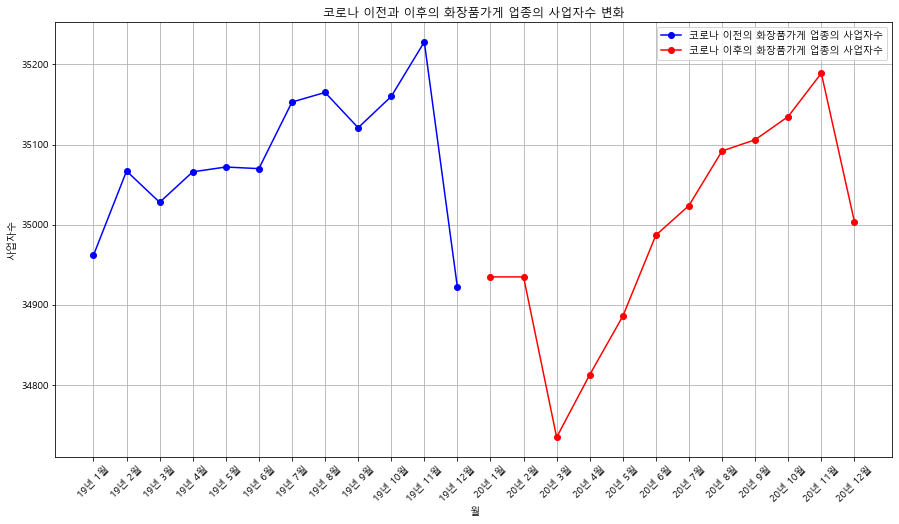

In [143]:
for i in range(len(ls_dec)):
    plt.figure(figsize = (15,8))
    plt.title('코로나 이전과 이후의 {} 업종의 사업자수 변화'.format(ls_dec[i]))
    plt.plot(list(range(1,13)), list(df_before[df_before['업종'] == ls_dec[i]]['연합계']), 
             'bo-',label = '코로나 이전의 {} 업종의 사업자수'.format(ls_dec[i]))
    plt.plot(list(range(13,25)), list(df_after[df_after['업종'] == ls_dec[i]]['연합계']), 
             'ro-',label = '코로나 이후의 {} 업종의 사업자수'.format(ls_dec[i]))
    plt.xticks(list(range(1,25)),labels = xindex, rotation = 45)
    plt.xlabel('월')
    plt.ylabel('사업자수')
    plt.grid(True)
    plt.legend()

   + 19년의 연 합계보다 20년의 연합계보다 작은 업종은 코로나 이후의 사업자 수가 코로나 이전의 사업자 수보다 적은 것을 볼 수 있다.
   + '일식전문점'은 전체적으로 보았을 때는 코로나 이후의 업종의 사업자수가 적다고 볼 수 있지만, 2020년 12월 데이터를 보면 2019년의 월별 사업자의 수보다 월등히 높은걸 볼 수 있으며, 이는 데이터를 분류하는 기준에 따라 달라 질 수 있다.

   + 코로나 이전과 이후로 비교한 업종별 사업자수를 월별로 시각화 한다.
   + 전년 동월과의 비교를 위해 같은 x축에 코로나 이전, 코로나 이후의 사업자수를 업종별로 막대그래프로 표현한다.

In [148]:
xindex = []
sub=[]
for i in range(12):
    xindex.append('{}월'.format(i+1))

In [154]:
x = np.arange(len(xindex))
w = 0.4

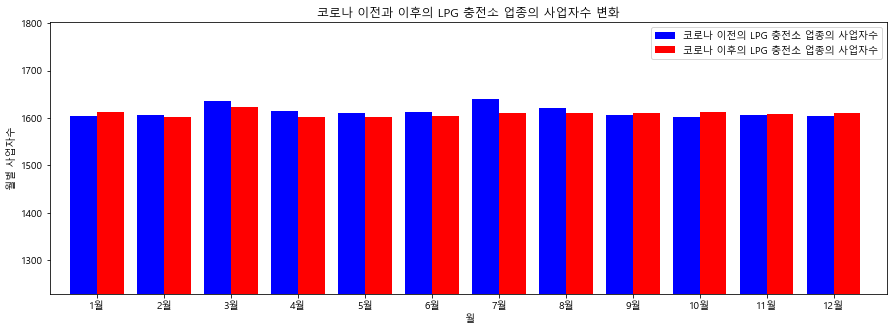

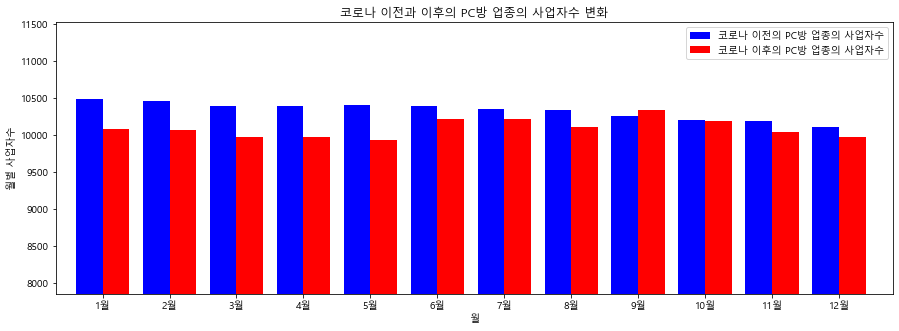

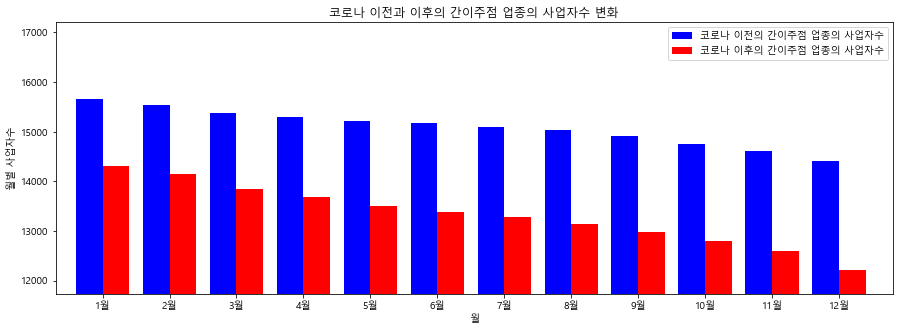

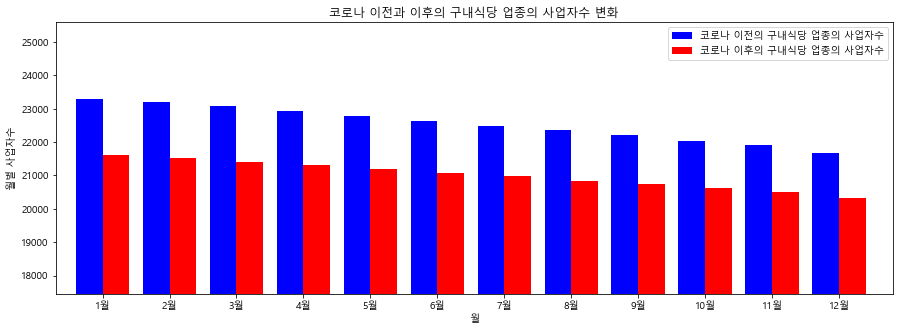

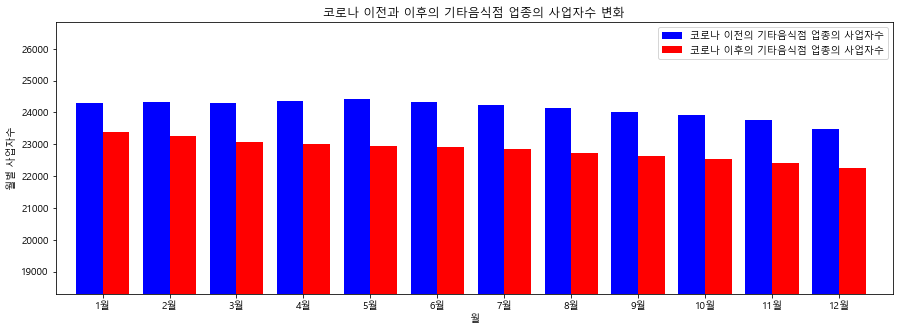

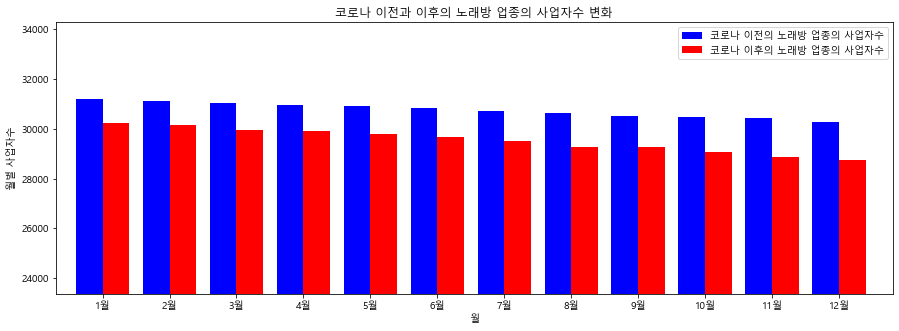

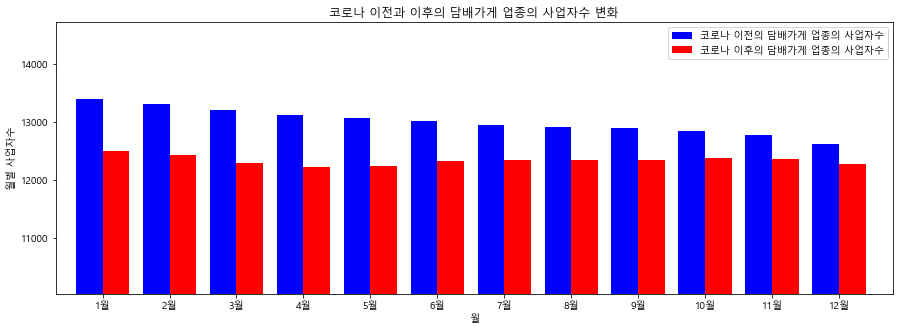

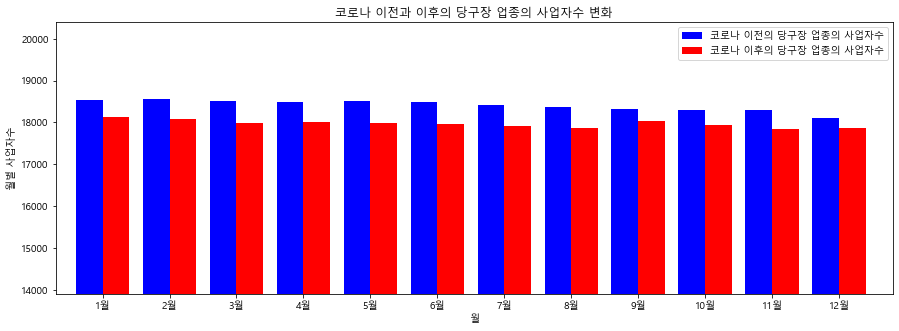

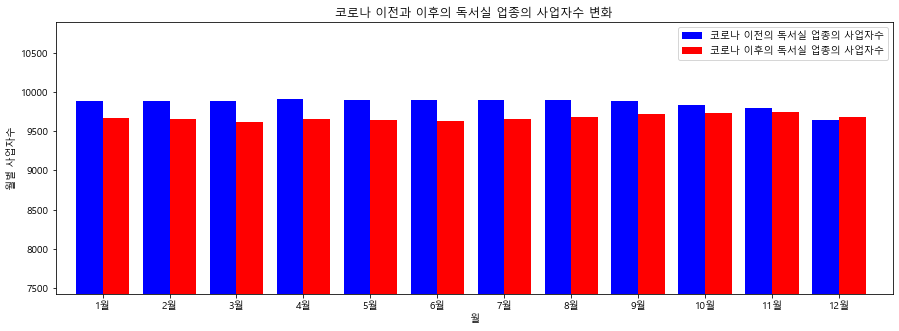

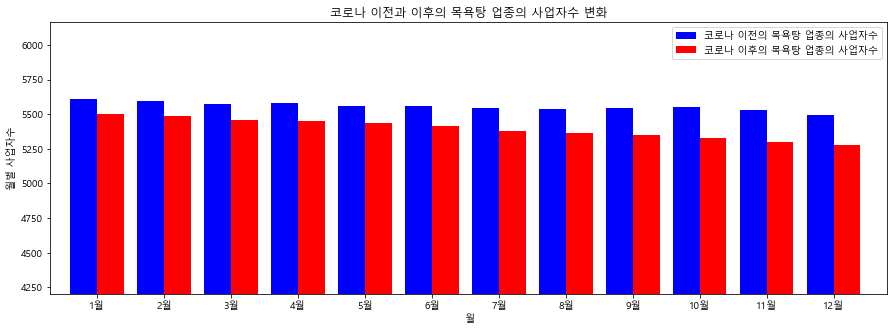

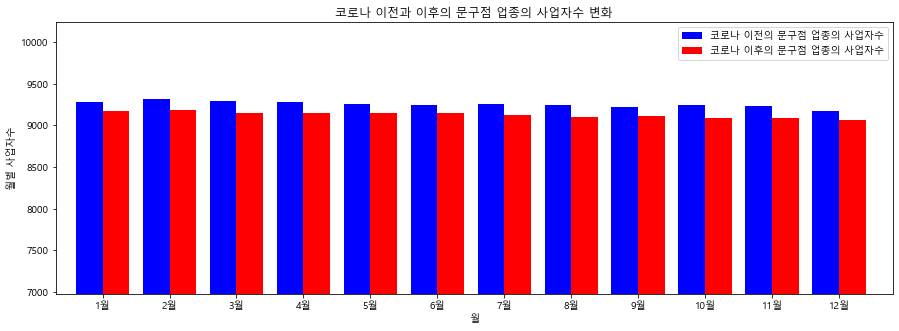

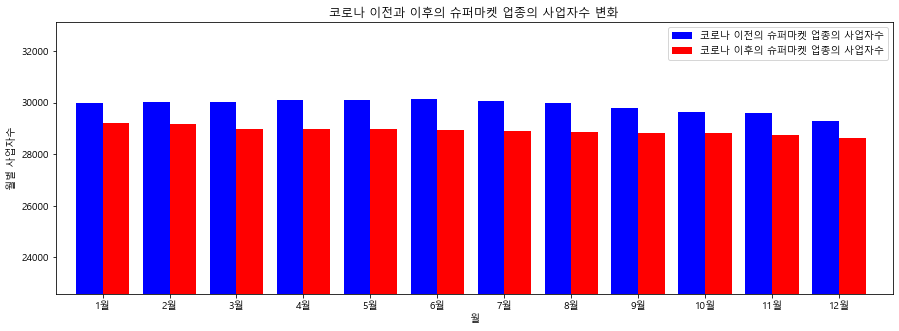

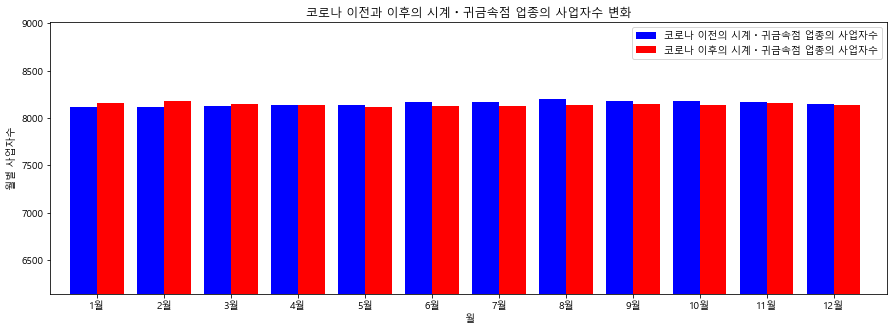

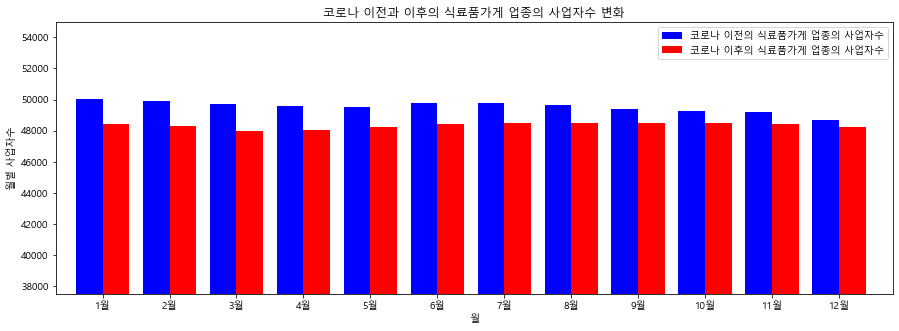

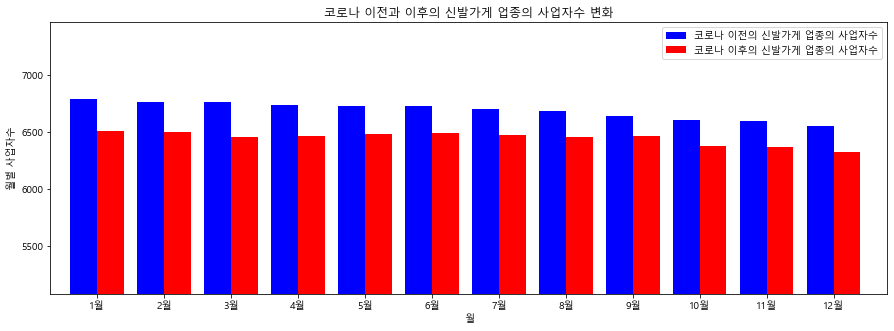

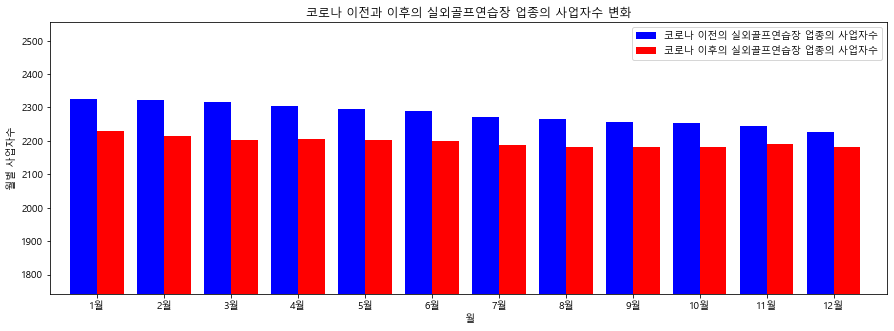

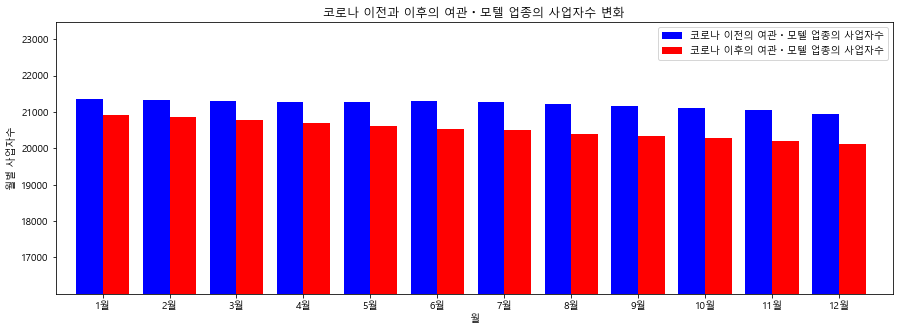

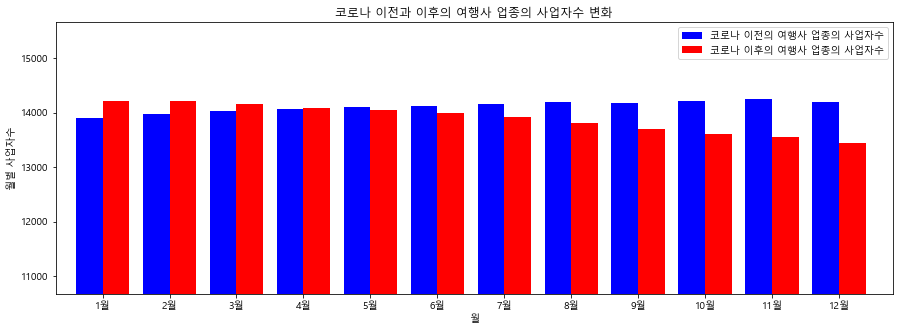

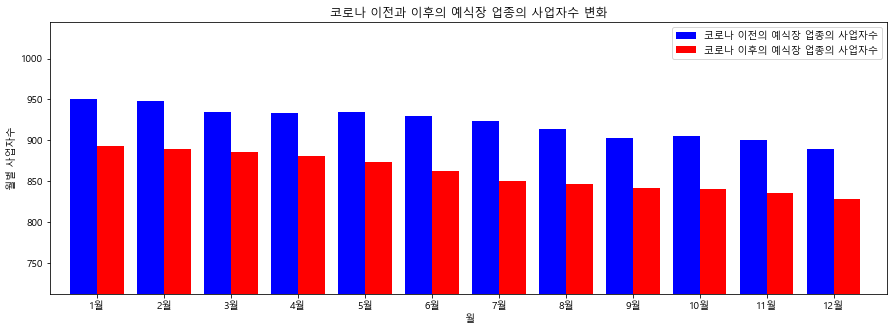

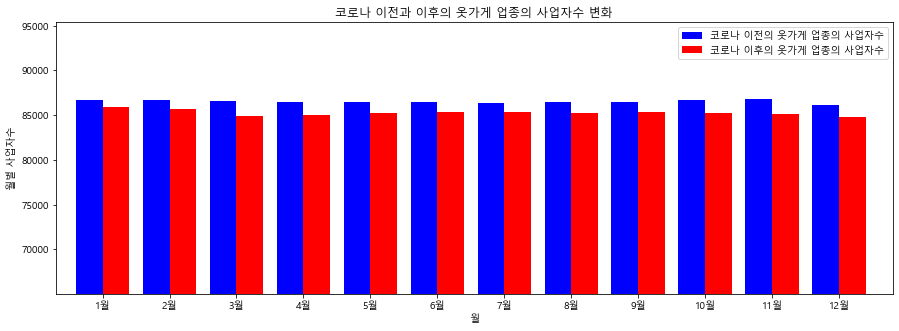

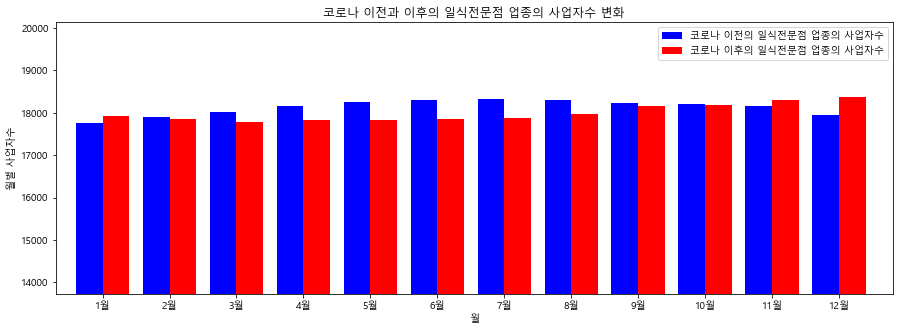

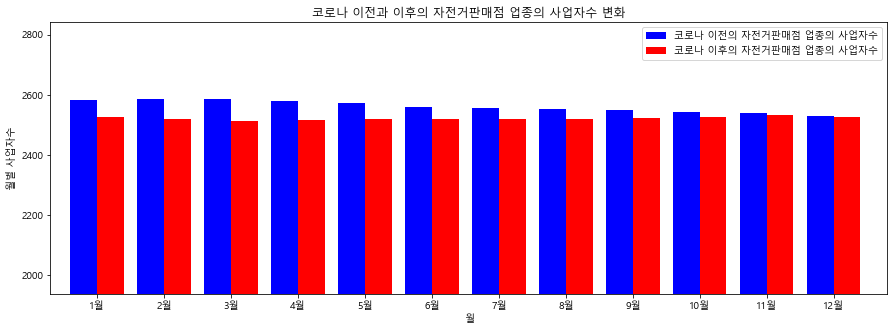

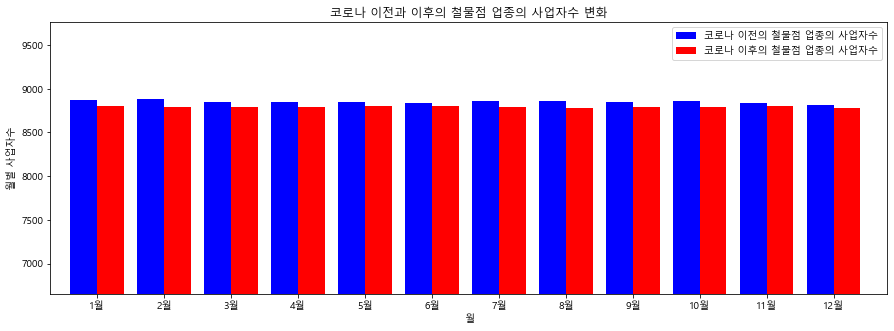

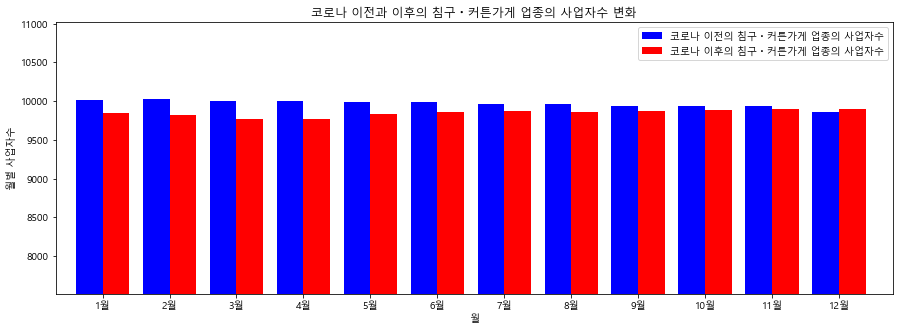

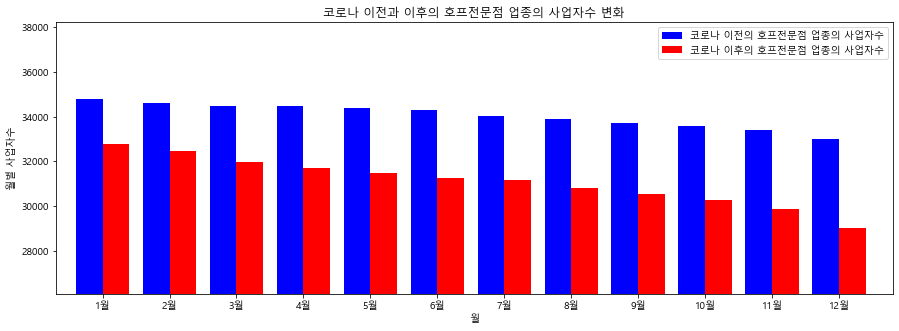

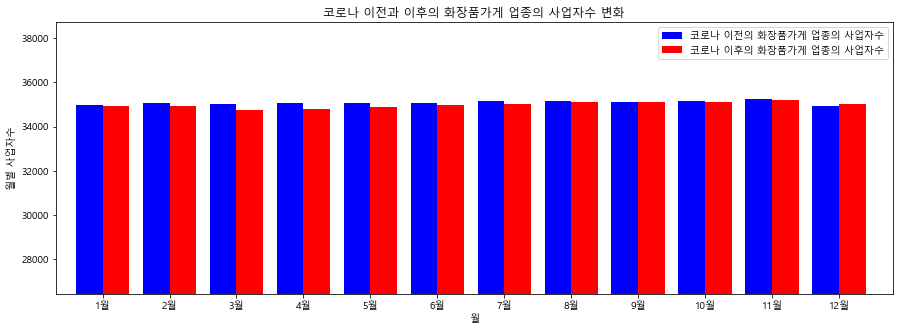

In [164]:
for i in range(len(ls_dec)):
    plt.figure(figsize = (15,5))
    plt.title('코로나 이전과 이후의 {} 업종의 사업자수 변화'.format(ls_dec[i]))
    plt.xlabel('월')
    plt.ylabel('월별 사업자수')
    plt.bar(x,list(df_before[df_before['업종'] == ls_dec[i]]['연합계']), 
            color = 'blue', width = w, label = '코로나 이전의 {} 업종의 사업자수'.format(ls_dec[i]))
    plt.bar(x+w,list(df_after[df_after['업종'] == ls_dec[i]]['연합계']), 
            color = 'red', width = w, label = '코로나 이후의 {} 업종의 사업자수'.format(ls_dec[i]))
    plt.axis([-0.5,12,
              max(list(df_before[df_before['업종'] == ls_dec[i]]['연합계']))-
              max(list(df_before[df_before['업종'] == ls_dec[i]]['연합계']))/4,
              max(list(df_before[df_before['업종'] == ls_dec[i]]['연합계']))+
              max(list(df_before[df_before['업종'] == ls_dec[i]]['연합계']))/10
              ])
    plt.legend(loc='best')

    plt.xticks(x+w/2,xindex)

### 6. 코로나 이후 증가한 업종
   + 5.절에서와 마찬가지로, 월별로 업종별 합계를 코로나 이전과 이후로 나누어 비교한다. 6. 절에서는 코로나 이후에 증가한 업종에 대해서만 분석하고, 시각화한다
   + 5.절에서 코로나 이후 증가한 업종 또한 ls_inc라는 리스트로 생성해 놓았으므로 해당 리스트를 이용한다.
   + 코로나 이후 증가한 업종은 '통신판매업', '한식전문점', '기술사'등 총 74개의 업종이다.

In [218]:
print(len(ls_inc),ls_inc)

74 ['가구점', '가전제품수리점', '가전제품판매점', '간판광고물업', '감정평가사', '건강보조식품가게', '건어물가게', '건축사', '결혼상담소', '곡물가게', '공인노무사', '공인회계사', '과일가게', '교습소･공부방', '교습학원', '기술및직업훈련학원', '기술사', '기타 일반의원', '기타외국식전문점', '꽃가게', '내과ㆍ소아과 의원', '동물병원', '미용실', '법무사', '변리사', '변호사', '부동산중개업', '분식점', '사진촬영업', '산부인과 의원', '생선가게', '서점', '성형외과 의원', '세무사', '세탁소', '스포츠교육기관', '스포츠시설운영업', '스포츠용품점', '신경정신과 의원', '실내스크린골프점', '실내장식가게', '안경점', '안과 의원', '애완용품점', '약국', '예술학원', '의료용품가게', '이륜자동차판매점', '이발소', '이비인후과 의원', '일반외과 의원', '자동차수리점', '장난감가게', '정육점', '제과점', '종합병원', '주유소', '주차장운영업', '중고차판매점', '중식전문점', '채소가게', '치과병원ㆍ의원', '커피음료점', '컴퓨터판매점', '통신판매업', '패스트푸드점', '펜션ㆍ게스트하우스', '편의점', '피부ㆍ비뇨기과 의원', '피부관리업', '한방병원ㆍ한의원', '한식전문점', '헬스클럽', '휴대폰가게']


In [165]:
xindex = []
for i in range(24):
    if i < 12:
        xindex.append('19년 {}월'.format(i+1))
    else:
        xindex.append('20년 {}월'.format(i-11))

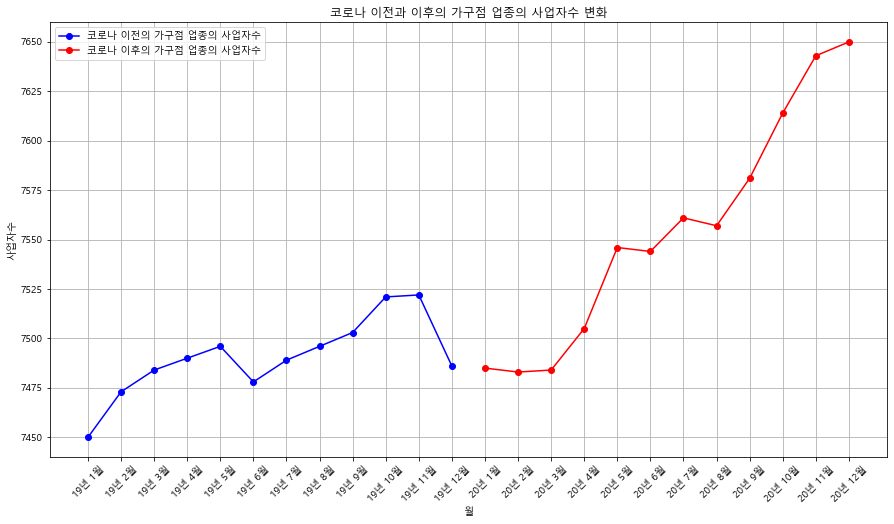

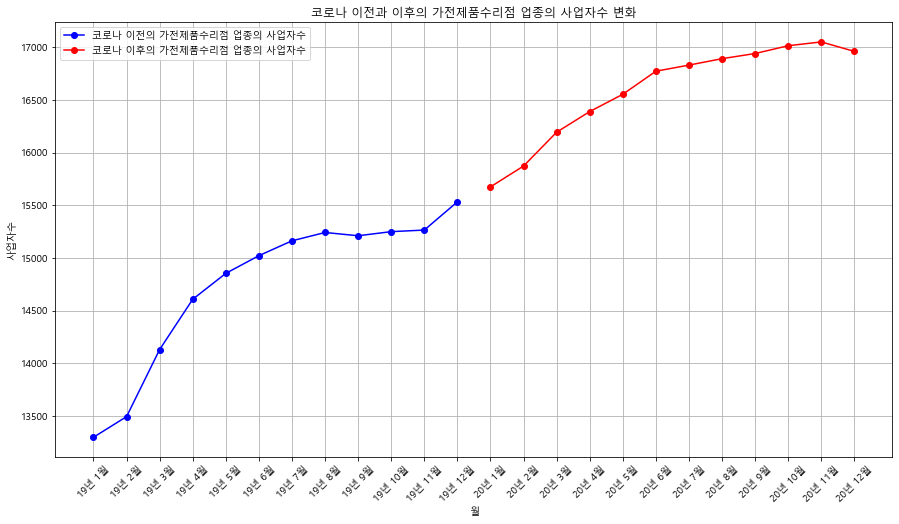

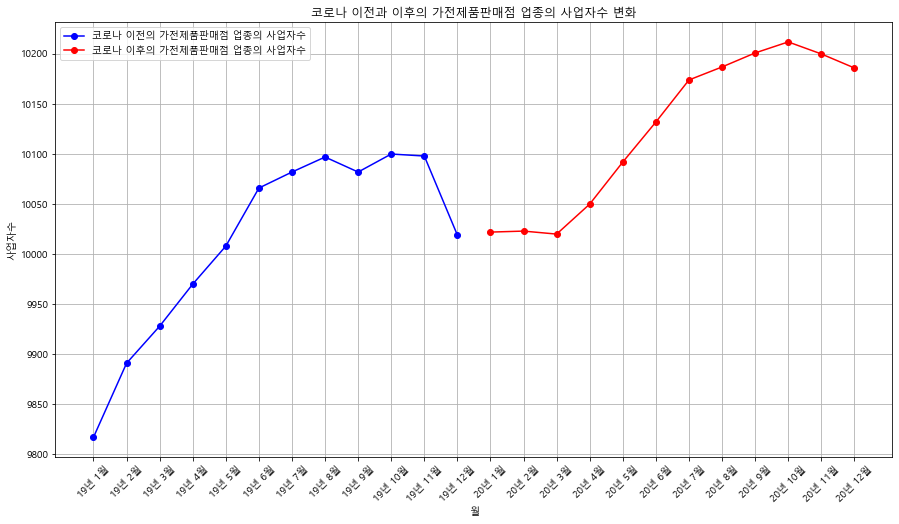

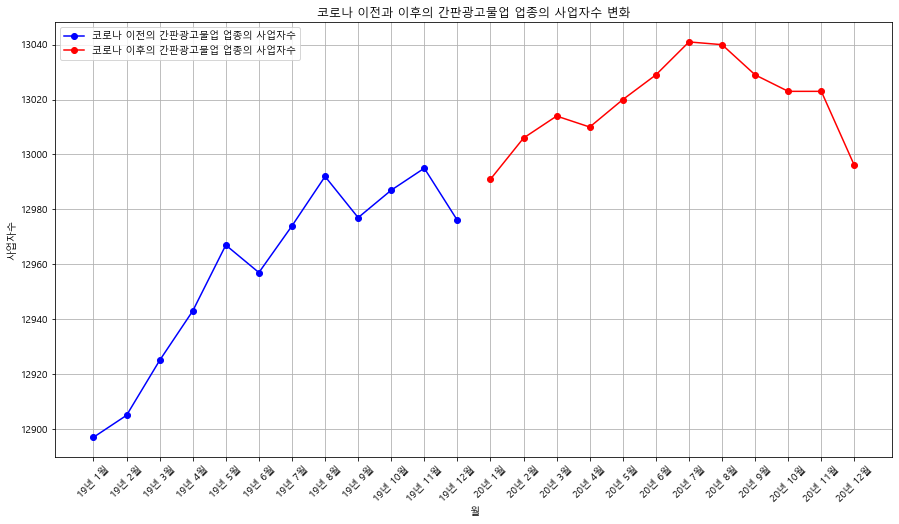

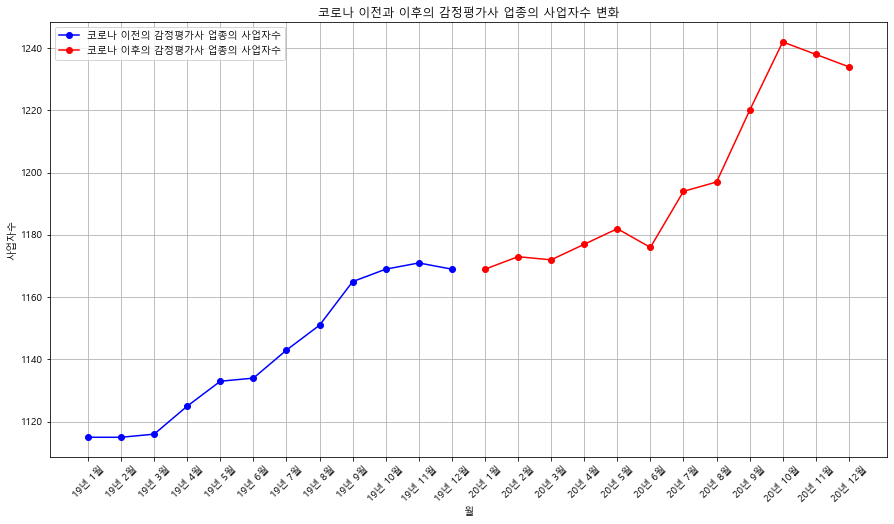

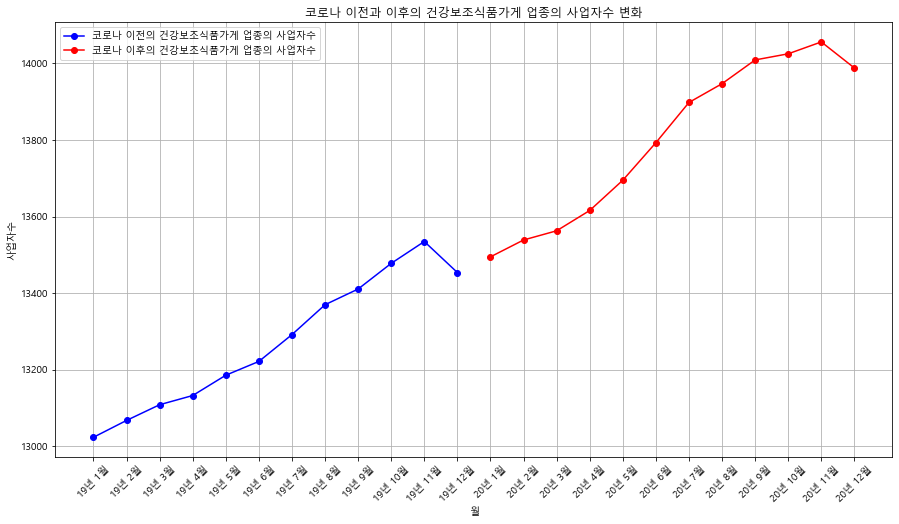

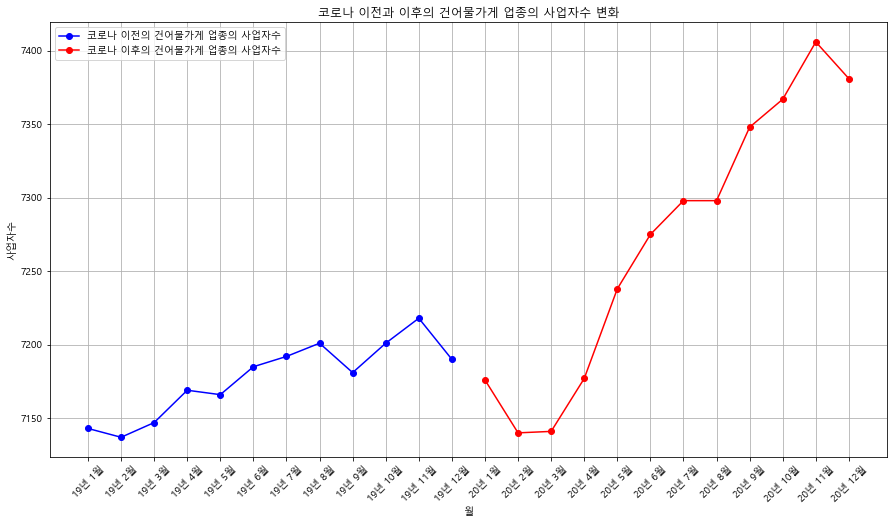

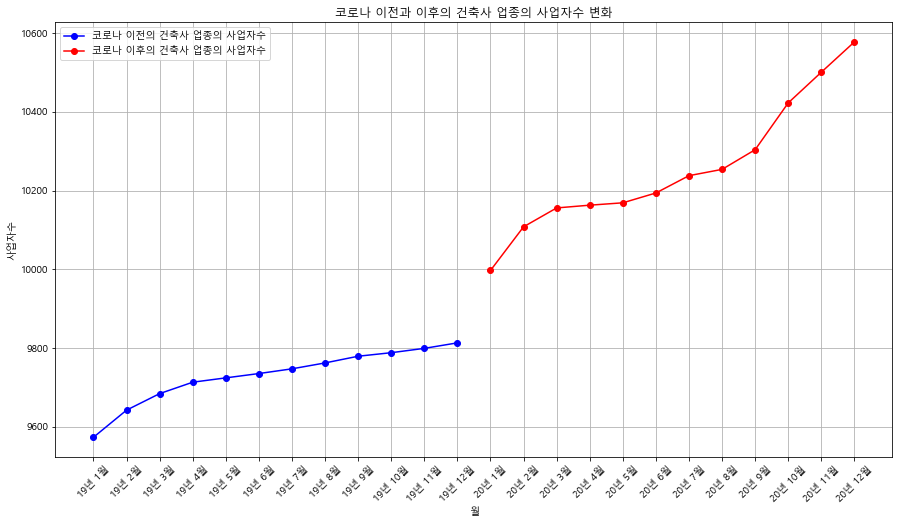

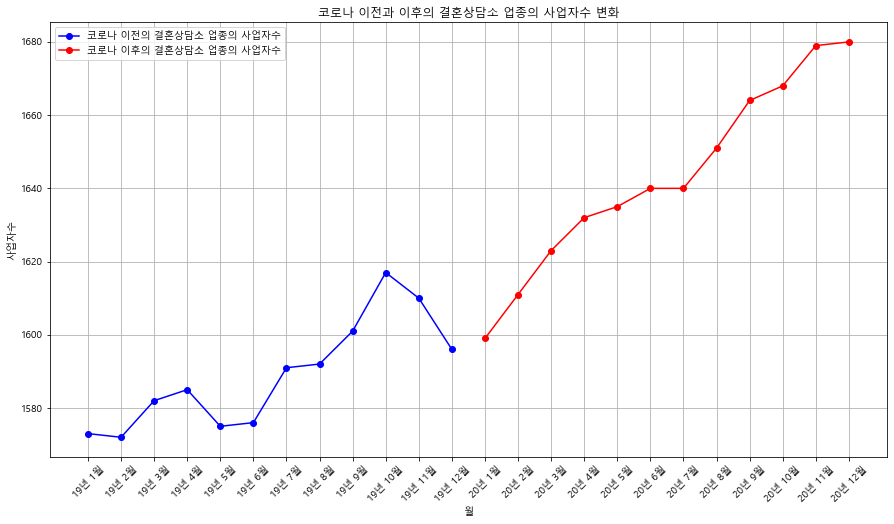

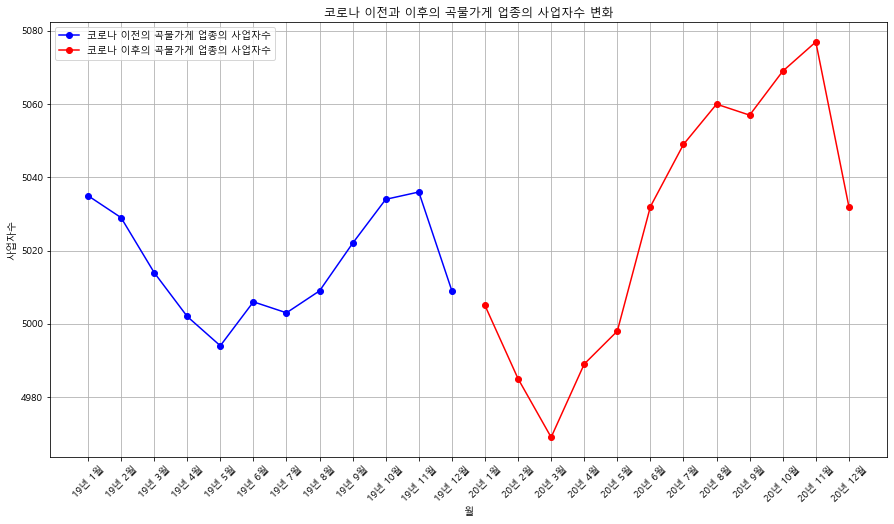

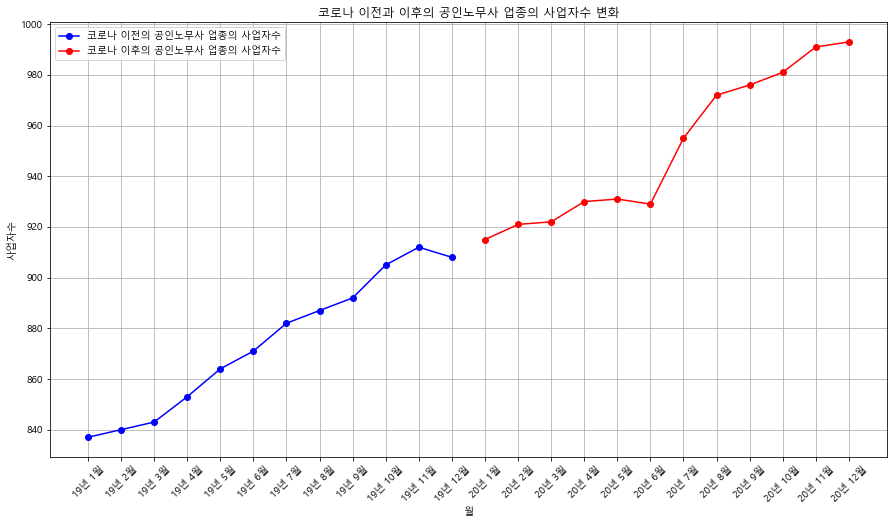

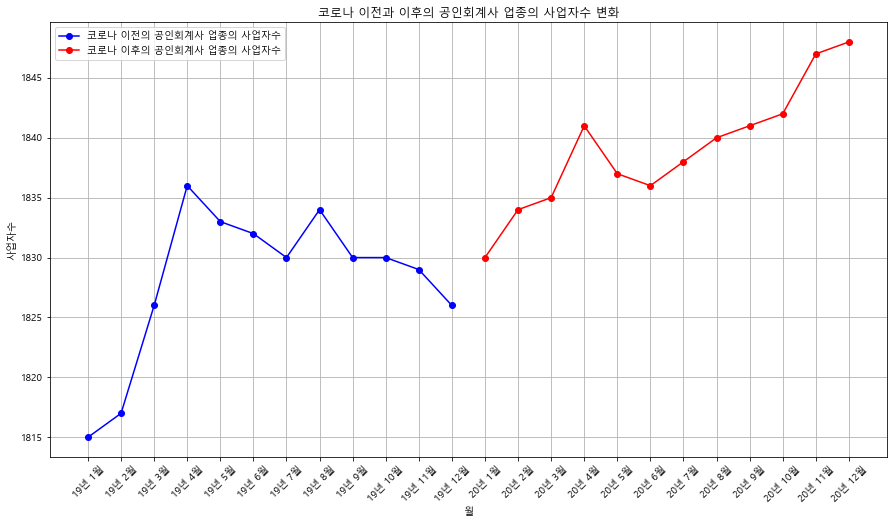

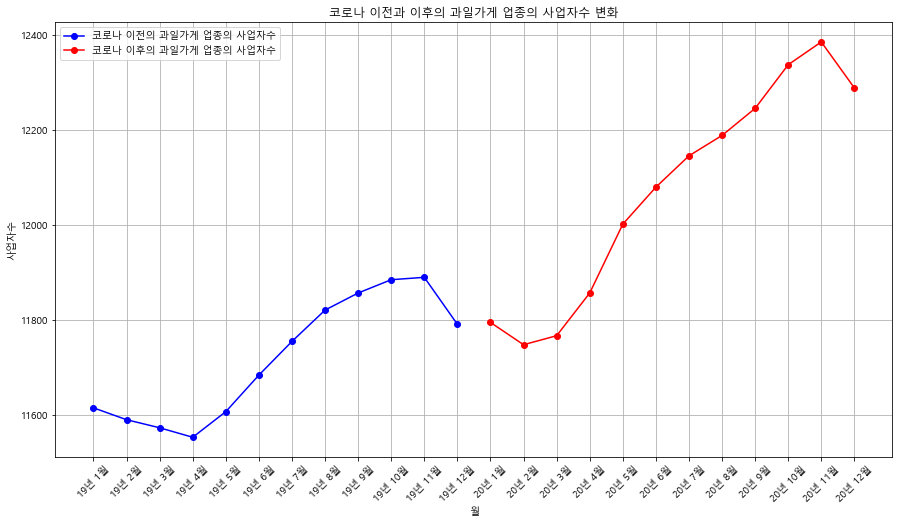

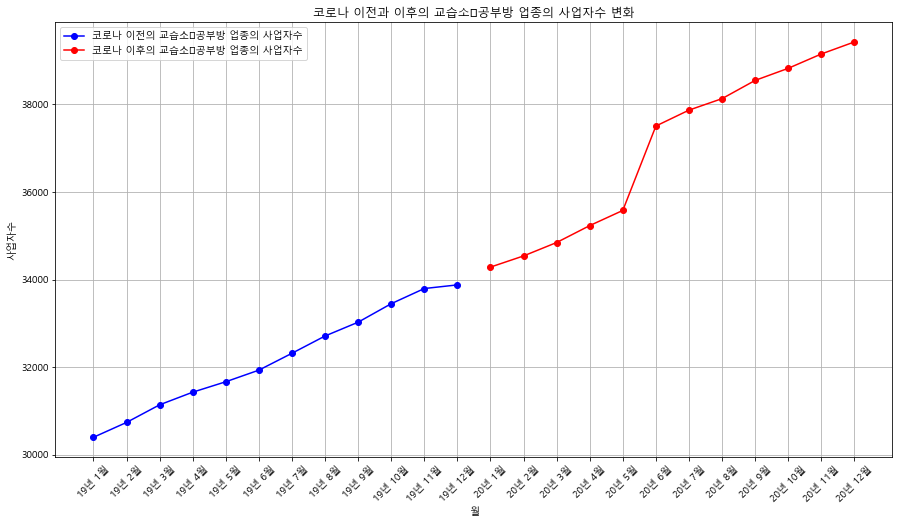

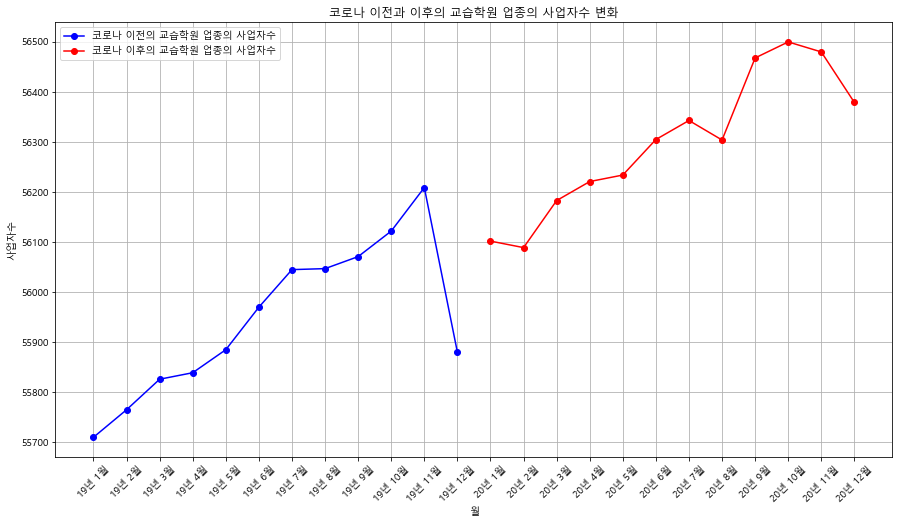

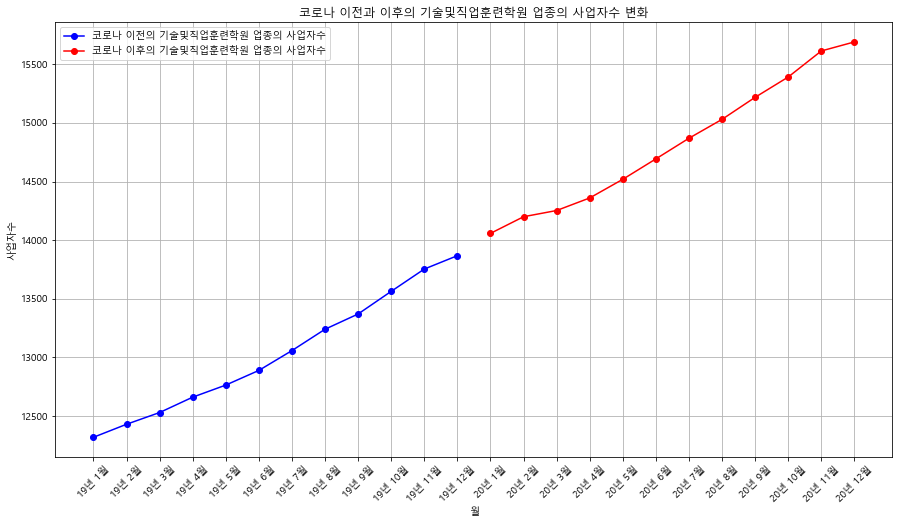

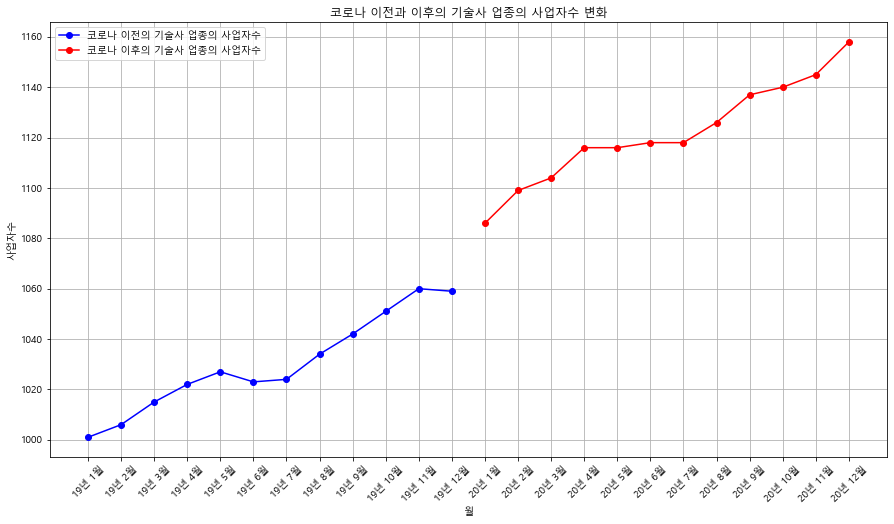

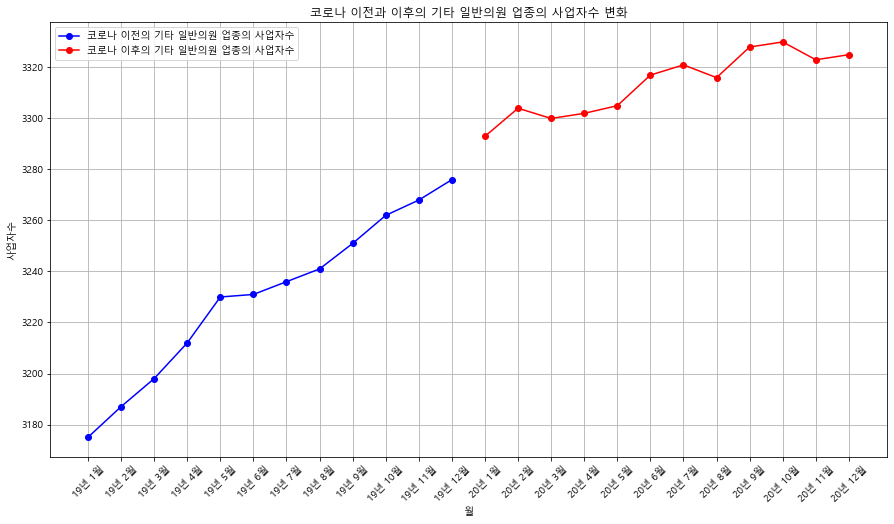

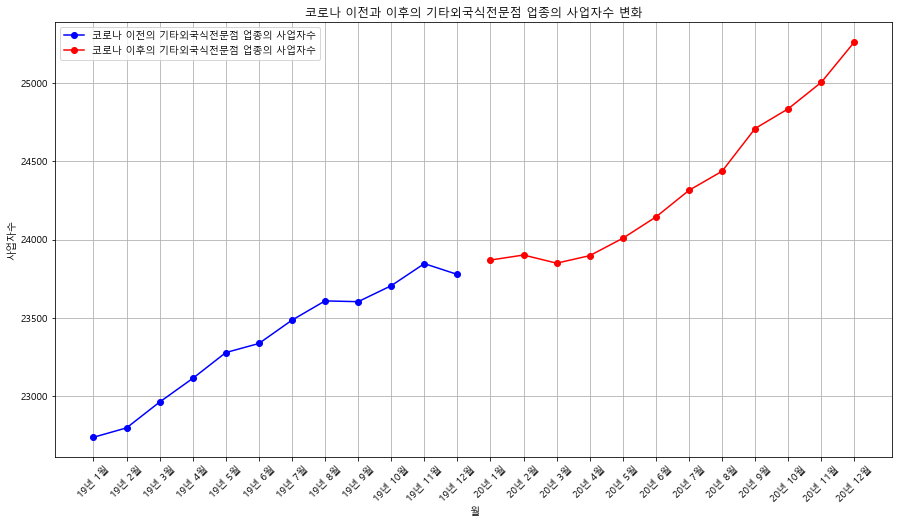

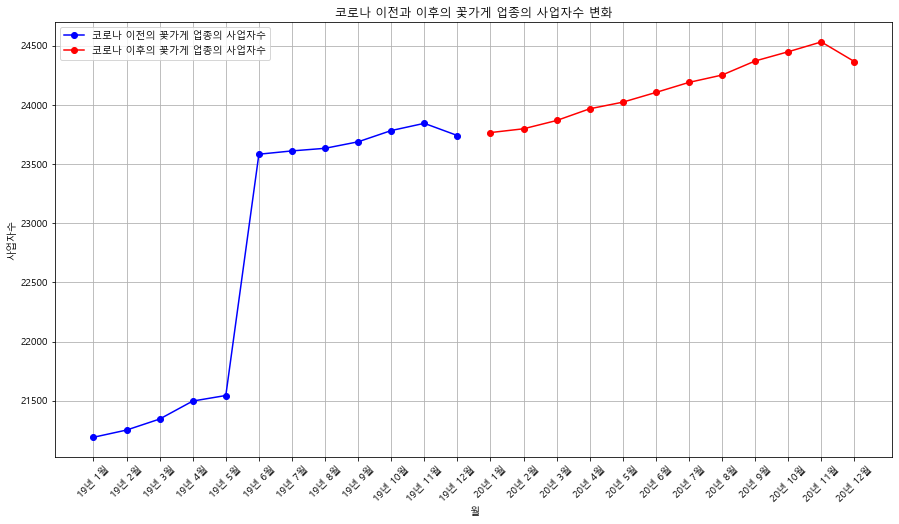

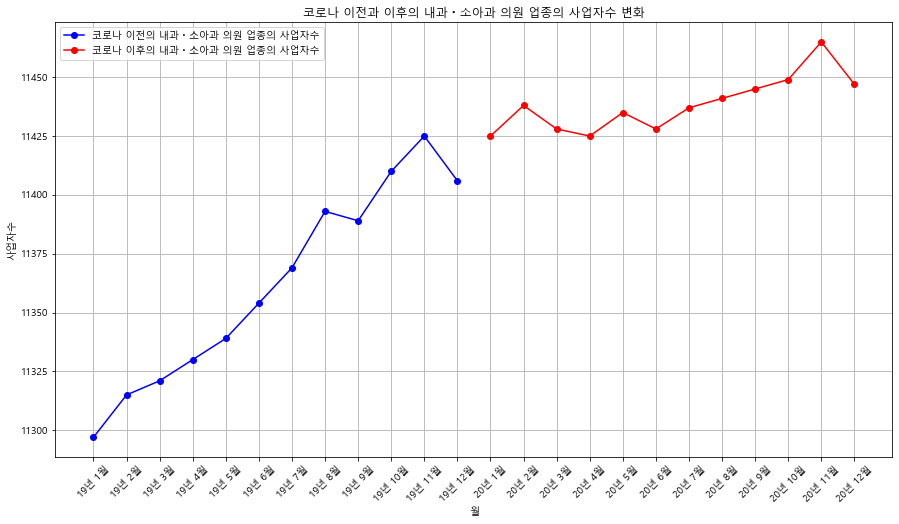

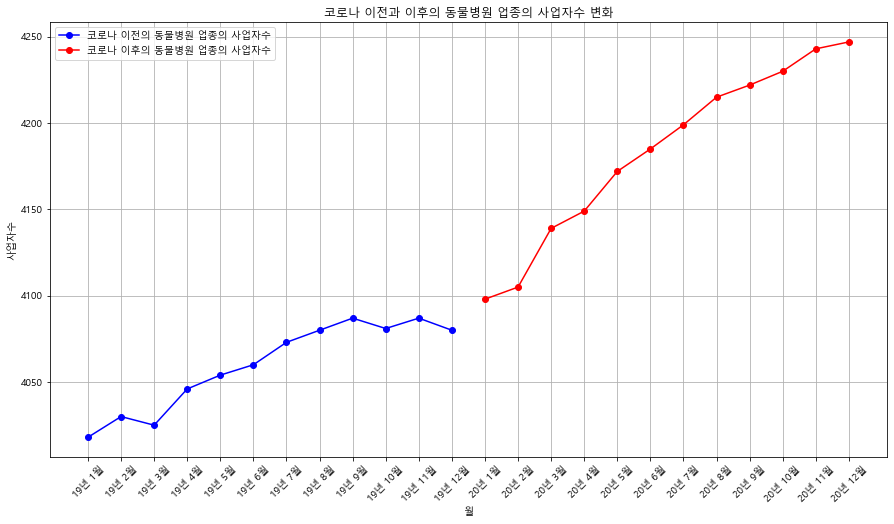

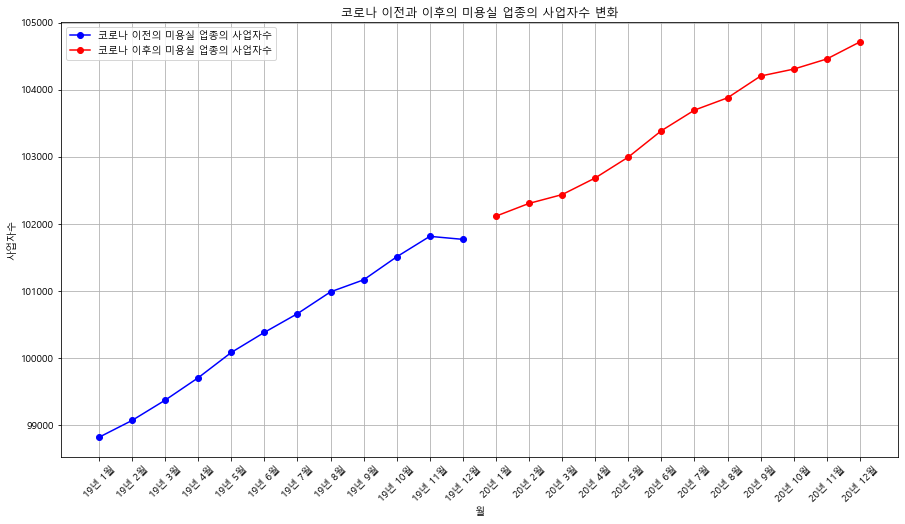

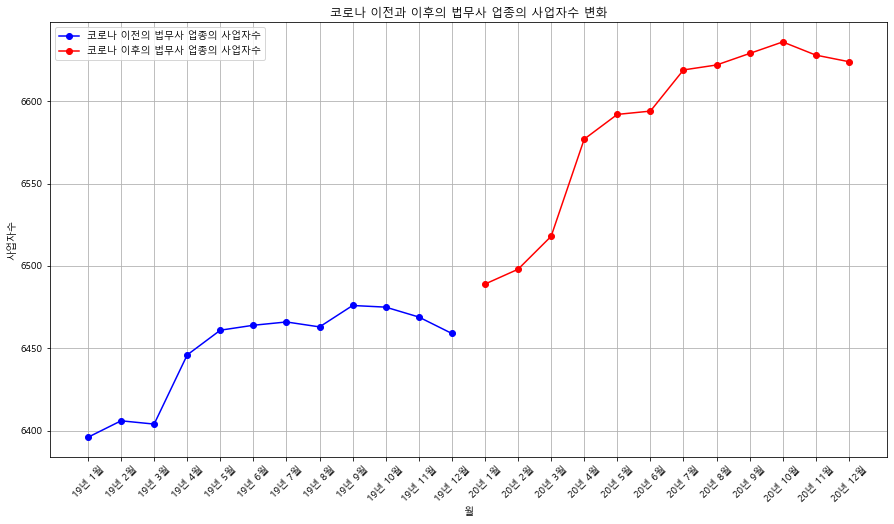

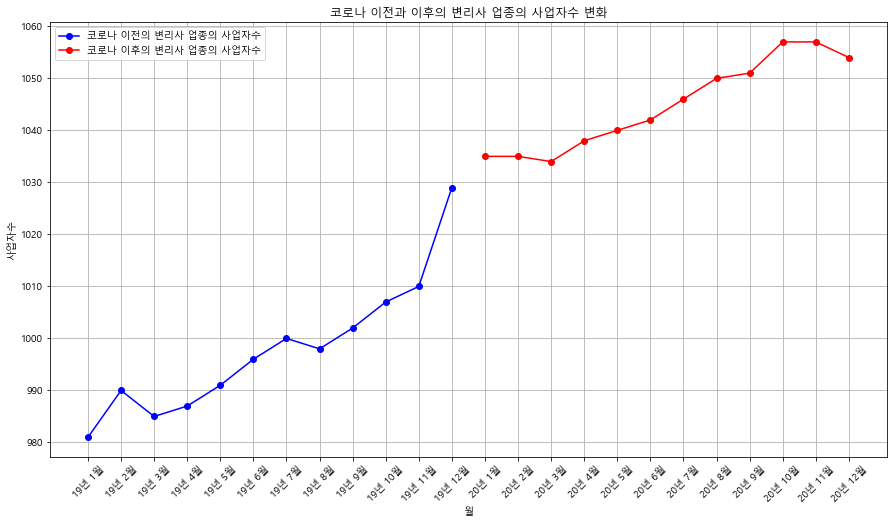

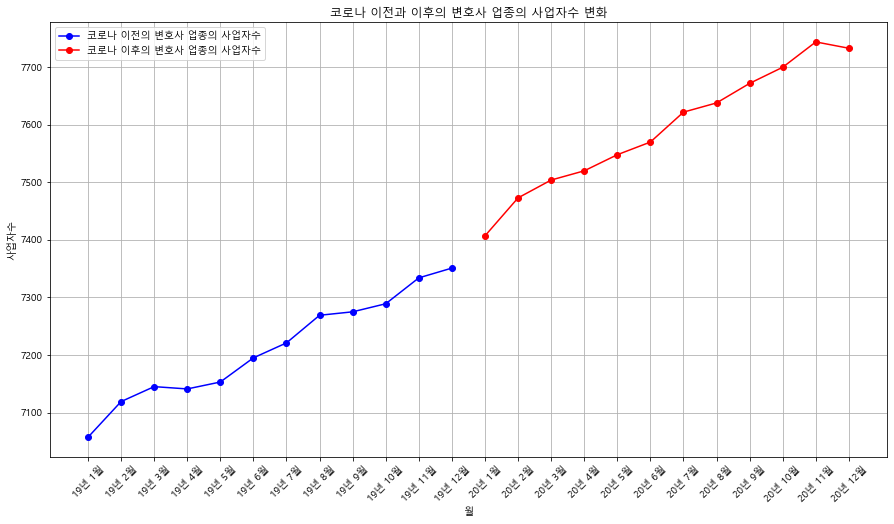

In [166]:
for i in range(len(ls_inc)):
    plt.figure(figsize = (15,8))
    plt.title('코로나 이전과 이후의 {} 업종의 사업자수 변화'.format(ls_inc[i]))
    plt.plot(list(range(1,13)), list(df_before[df_before['업종'] == ls_inc[i]]['연합계']), 
             'bo-',label = '코로나 이전의 {} 업종의 사업자수'.format(ls_inc[i]))
    plt.plot(list(range(13,25)), list(df_after[df_after['업종'] == ls_inc[i]]['연합계']), 
             'ro-',label = '코로나 이후의 {} 업종의 사업자수'.format(ls_inc[i]))
    plt.xticks(list(range(1,25)),labels = xindex, rotation = 45)
    plt.xlabel('월')
    plt.ylabel('사업자수')
    plt.grid(True)
    plt.legend()

   + 5.절에서와 동일하게 막대그래프로 또한 시각화를 수행한다.

In [169]:
xindex = []
sub=[]
for i in range(12):
    xindex.append('{}월'.format(i+1))

In [170]:
x = np.arange(len(xindex))
w = 0.4

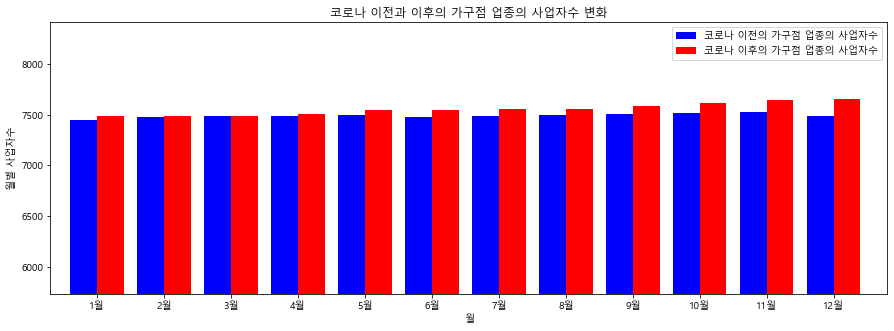

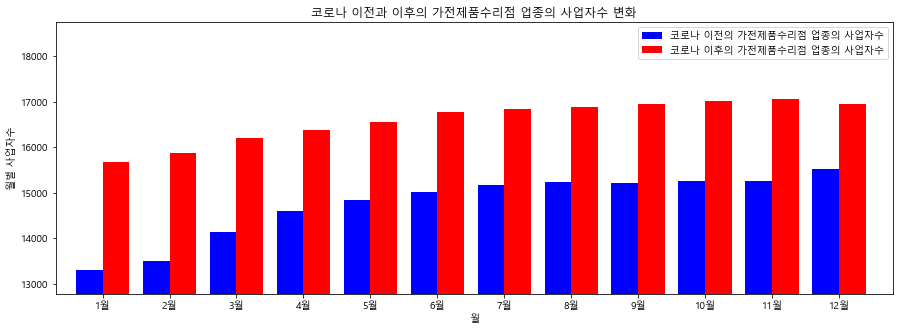

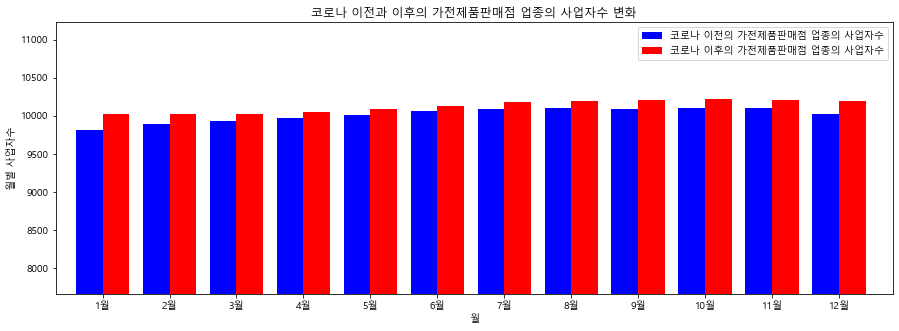

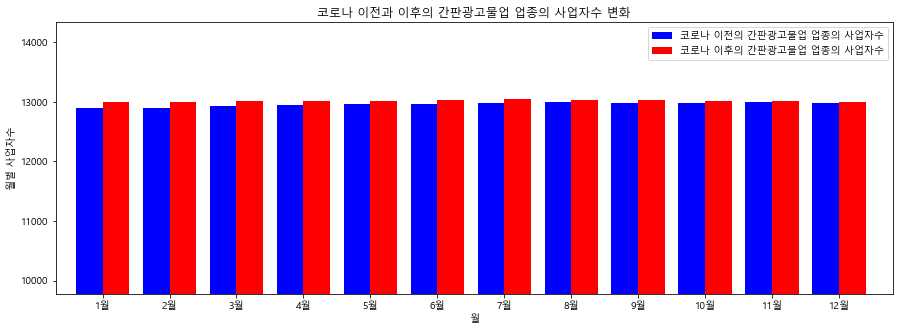

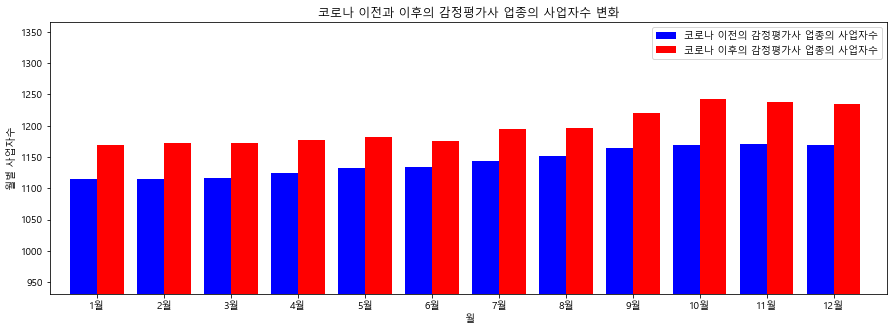

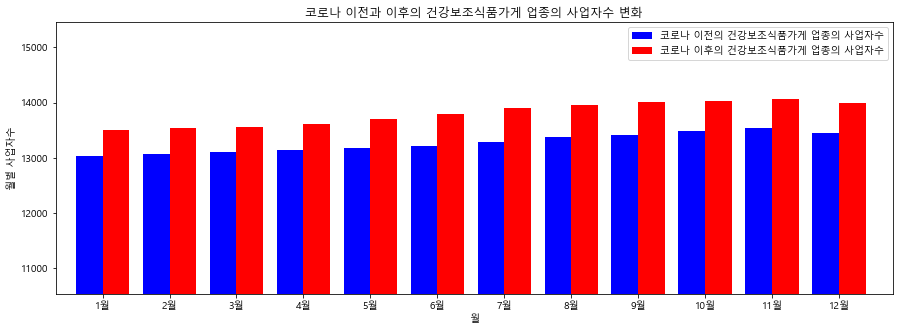

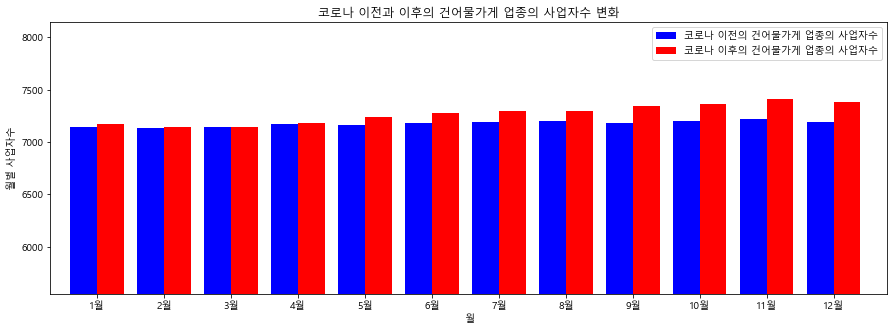

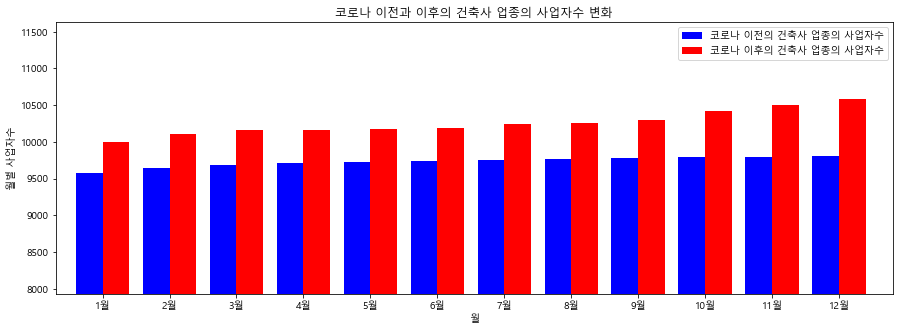

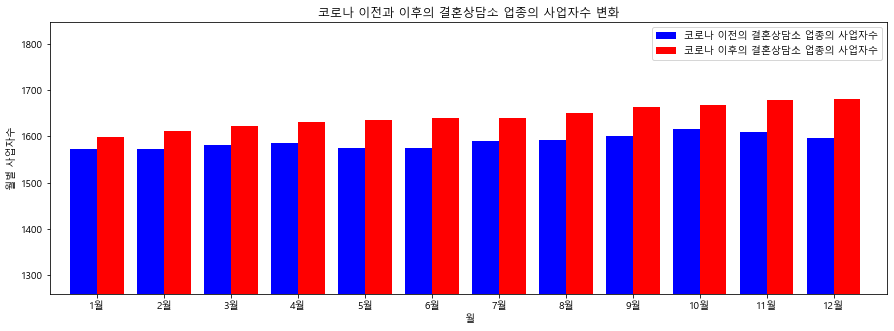

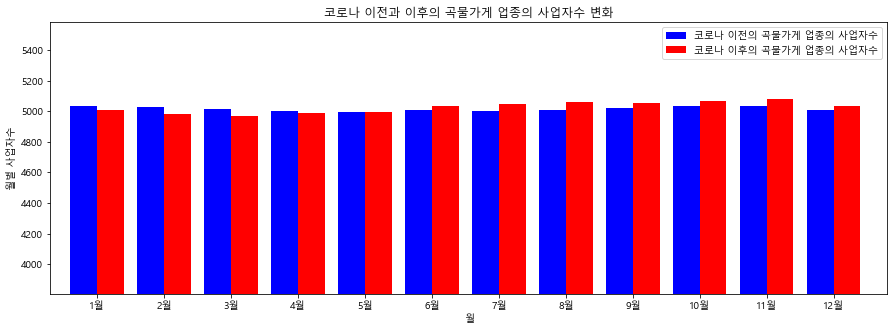

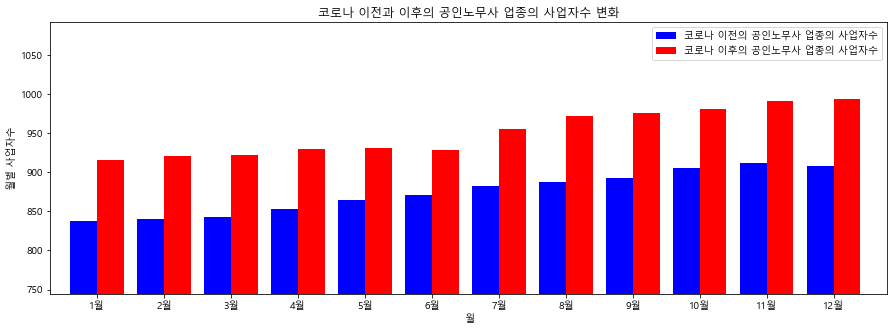

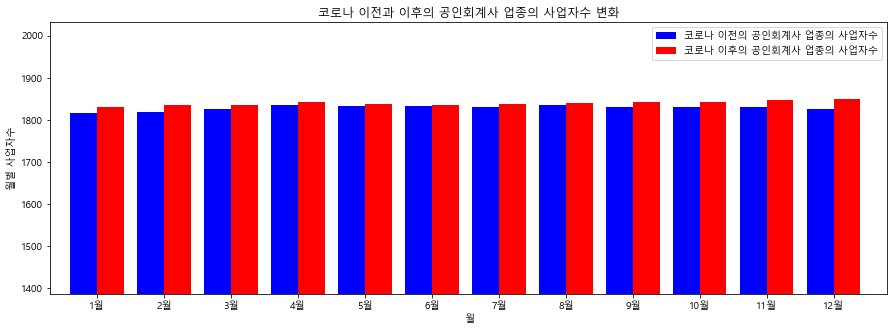

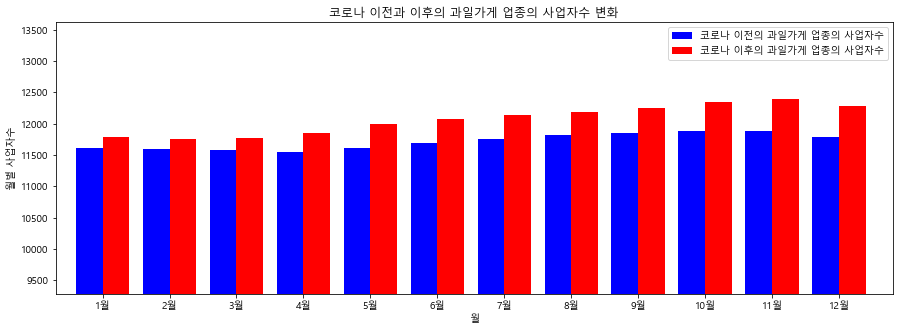

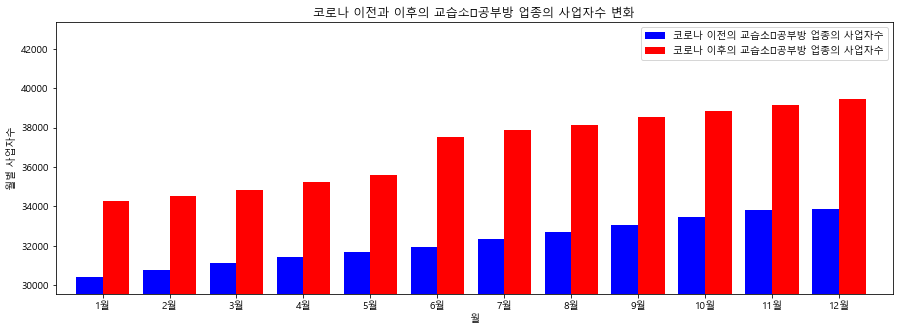

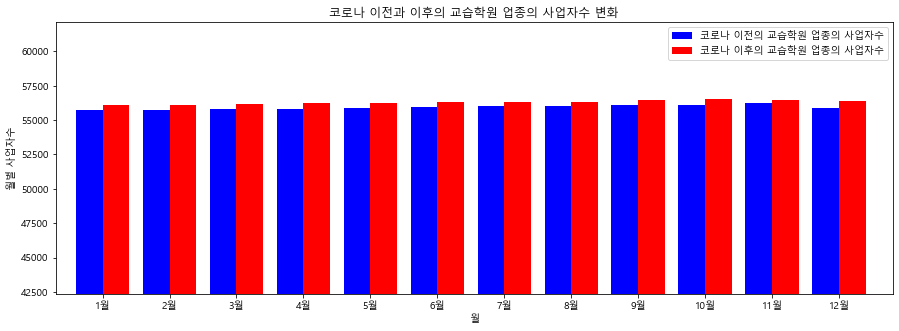

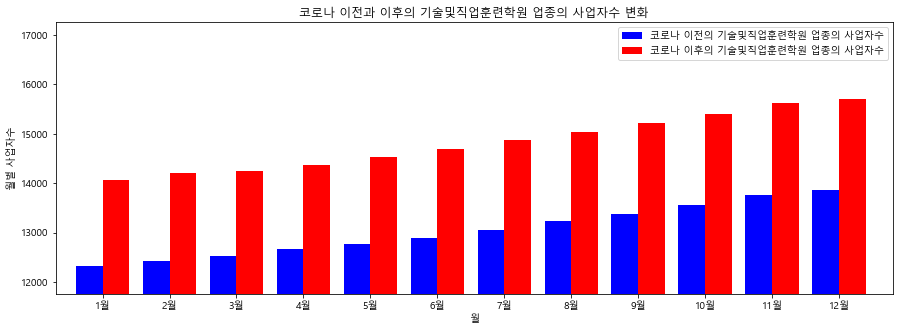

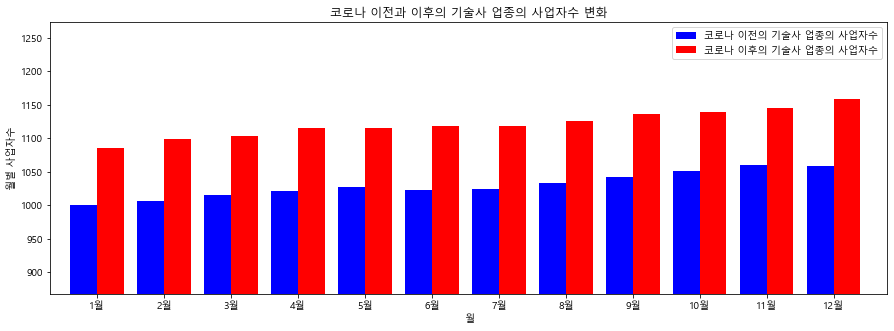

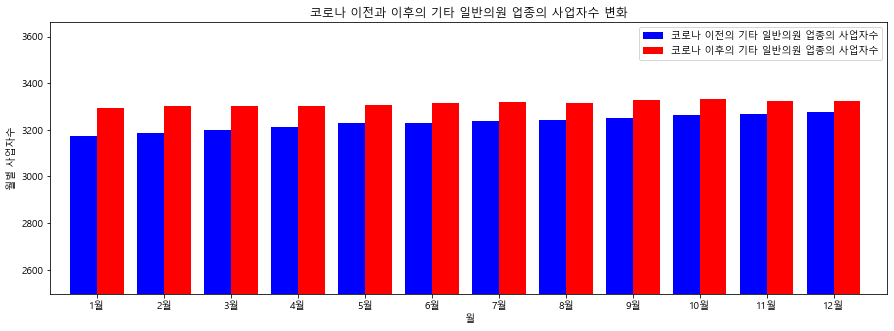

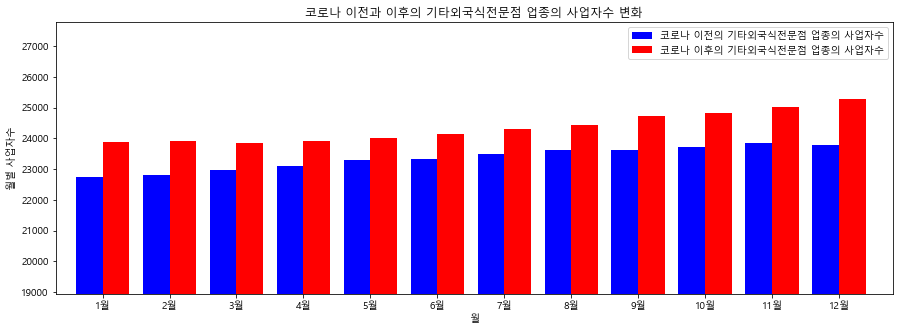

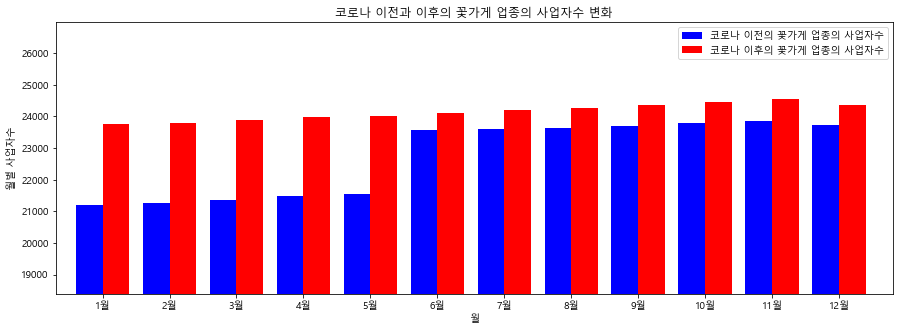

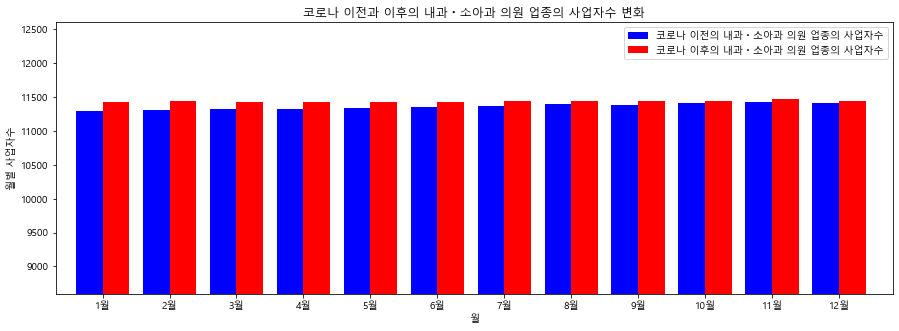

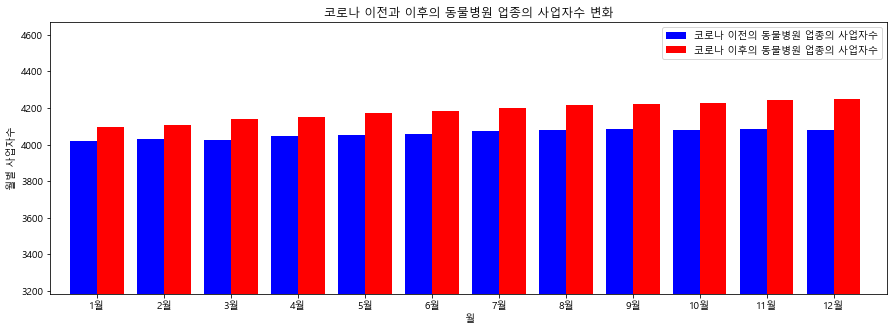

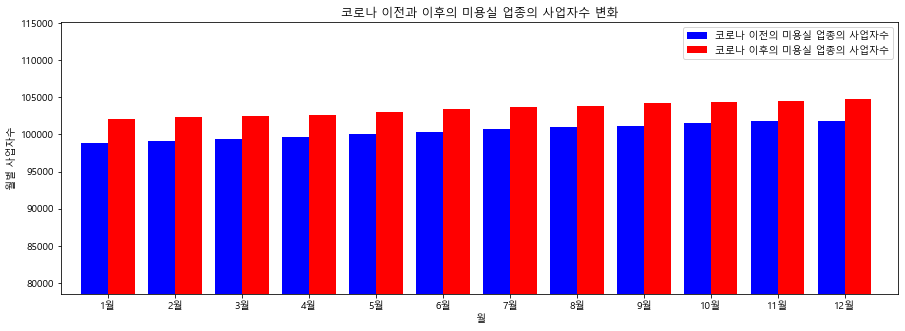

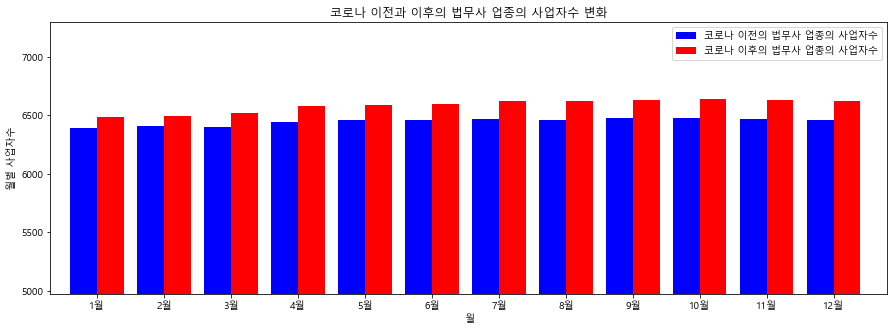

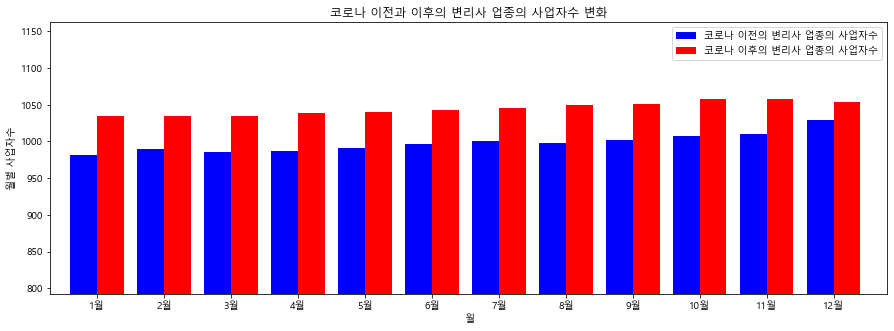

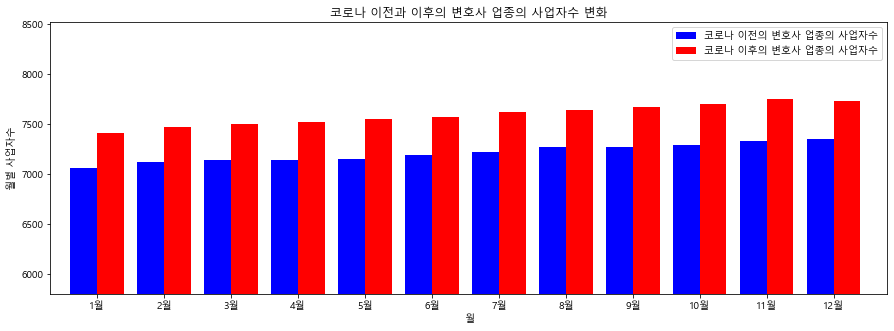

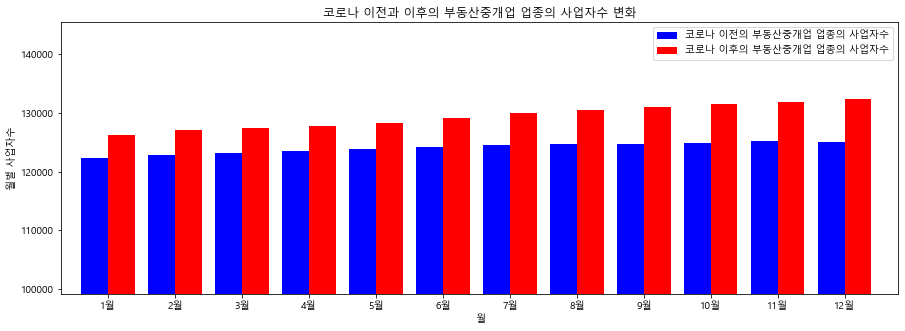

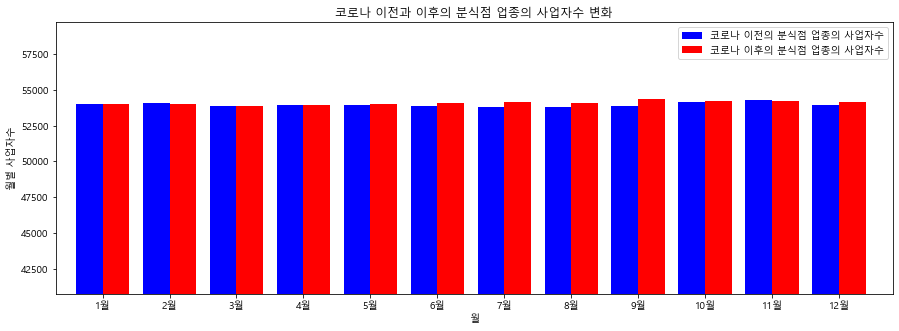

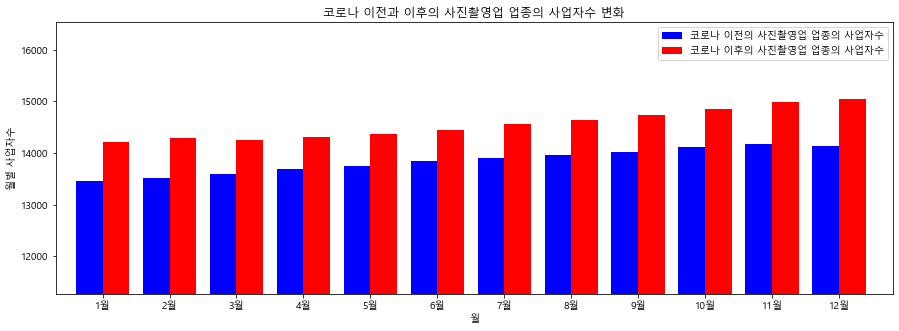

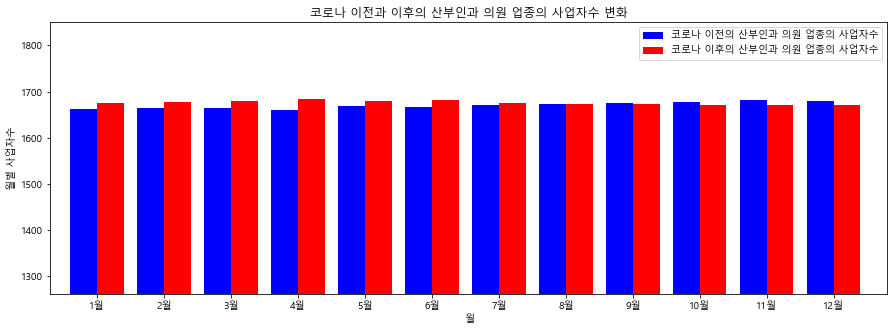

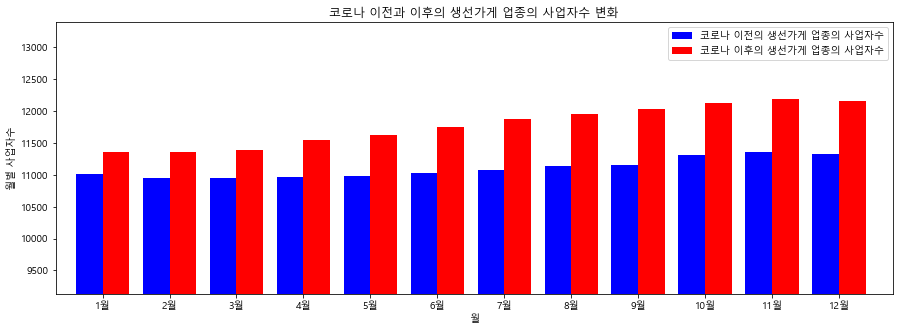

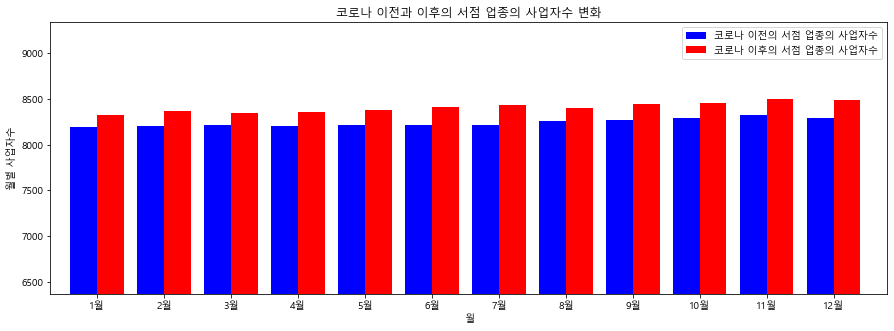

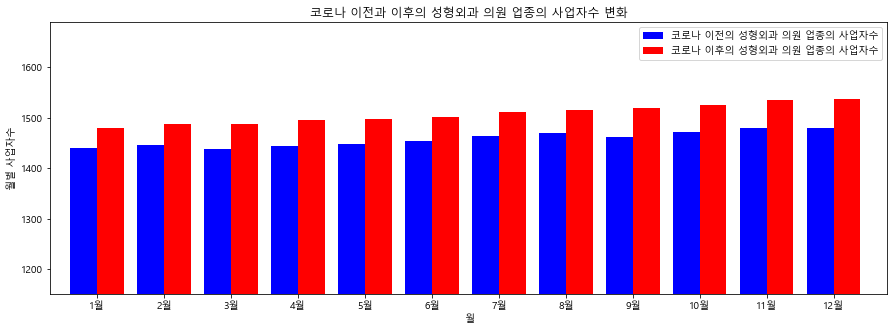

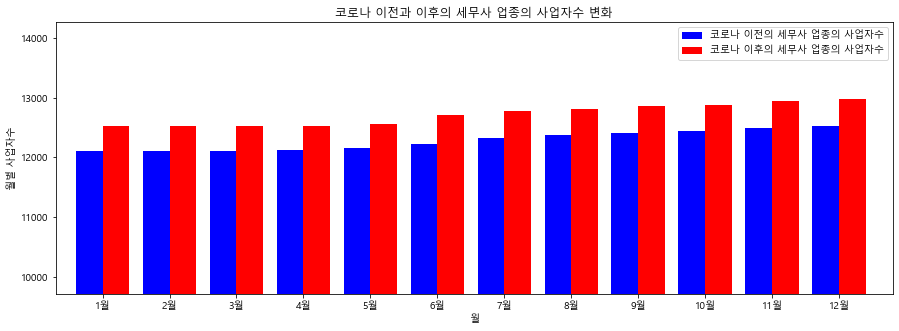

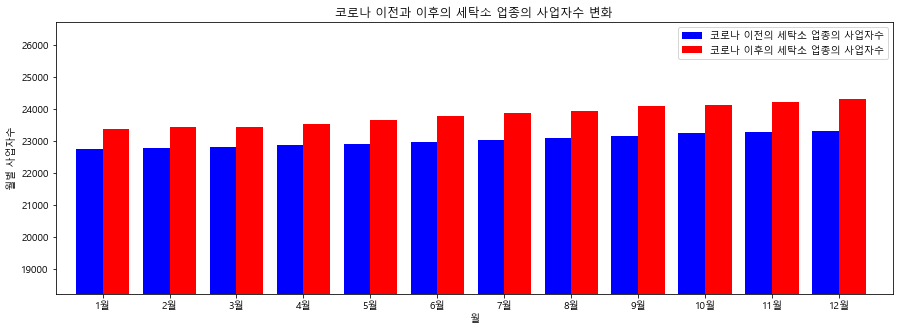

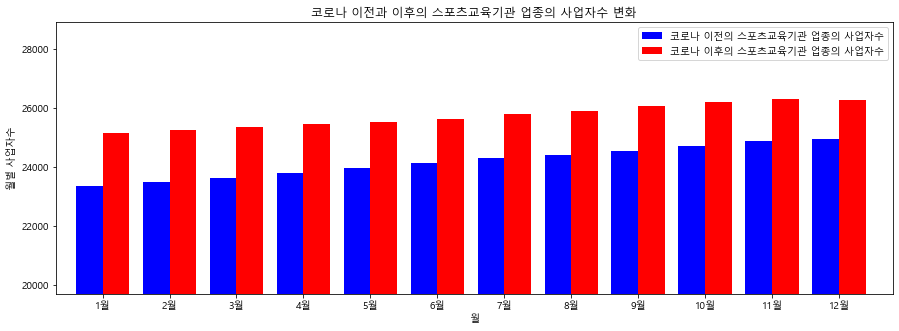

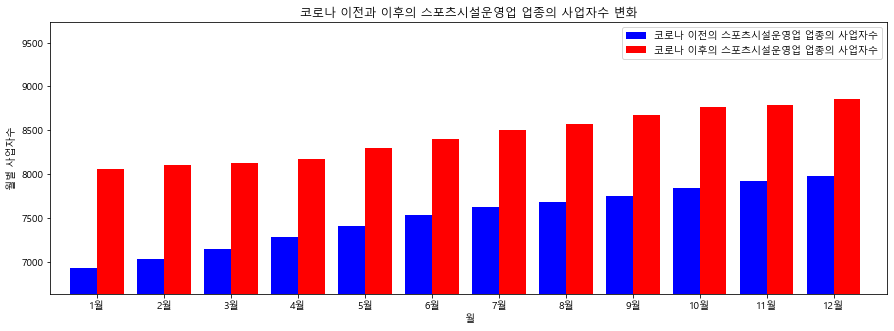

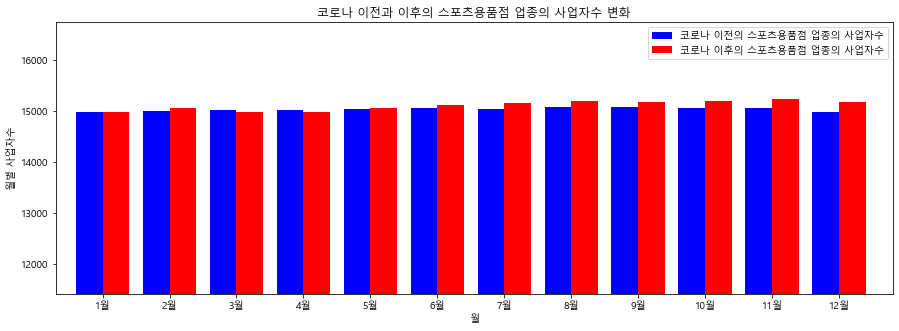

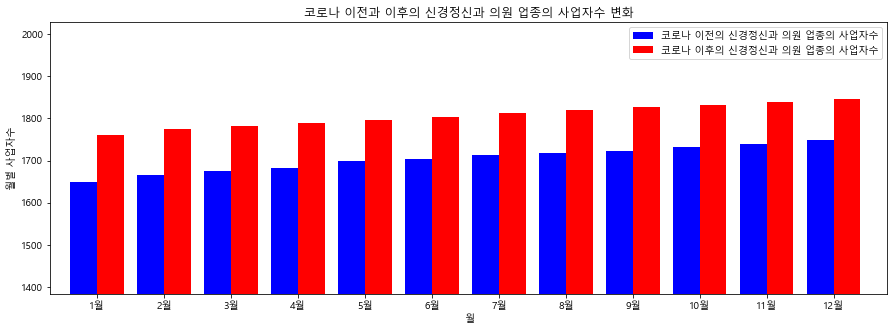

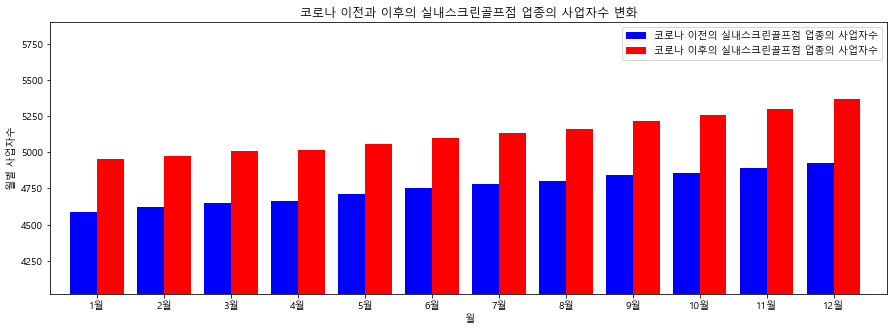

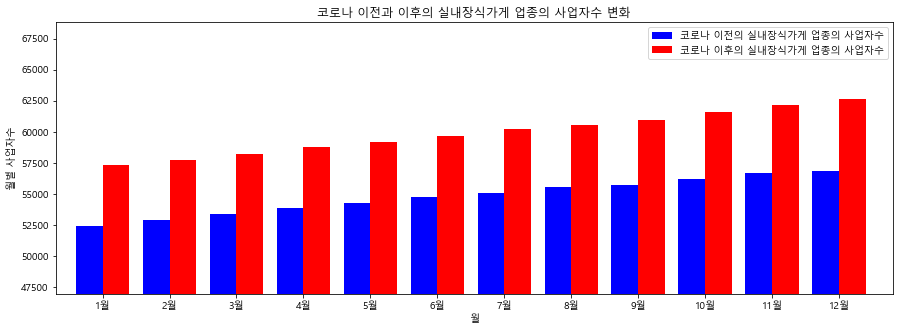

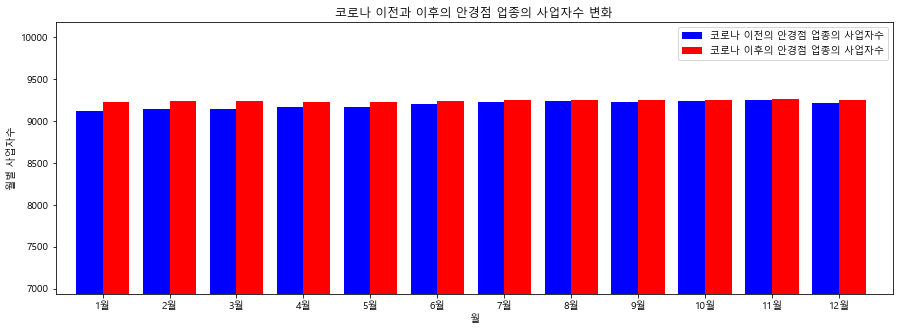

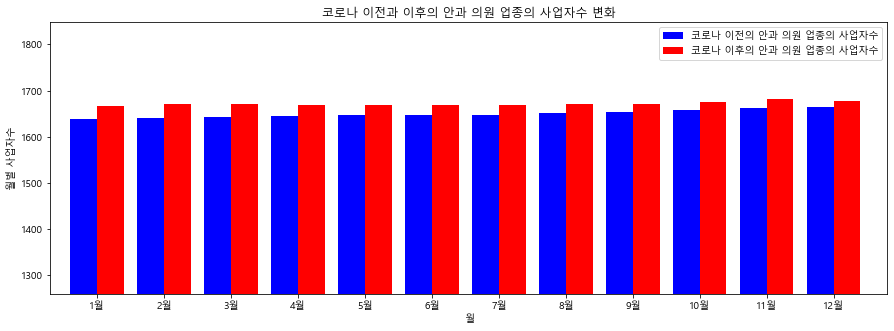

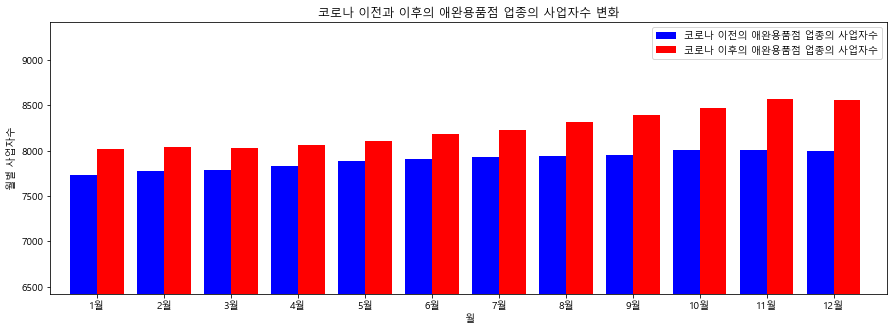

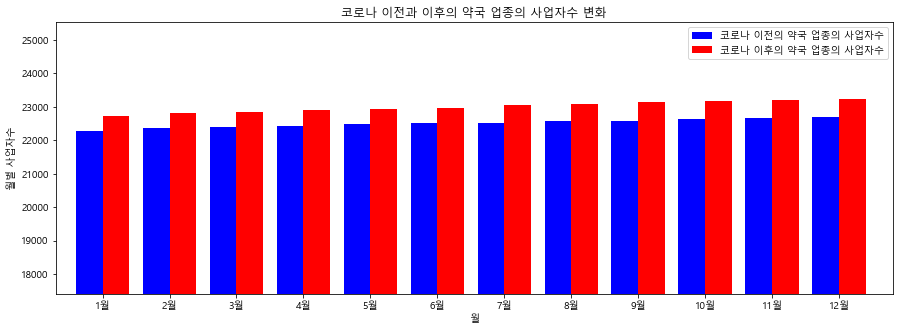

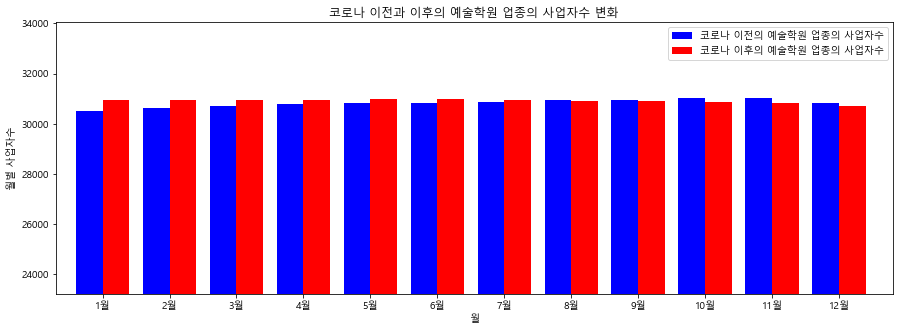

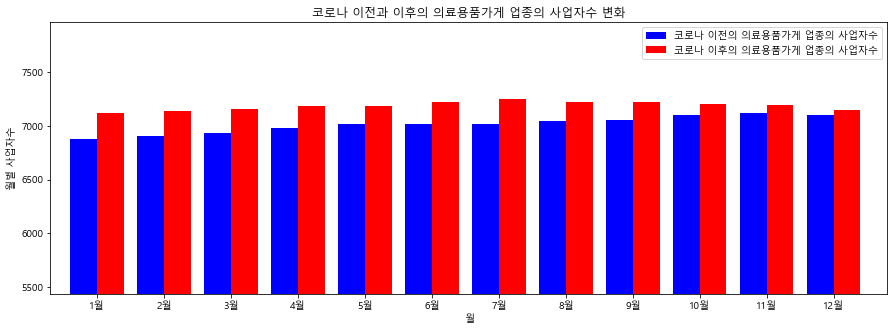

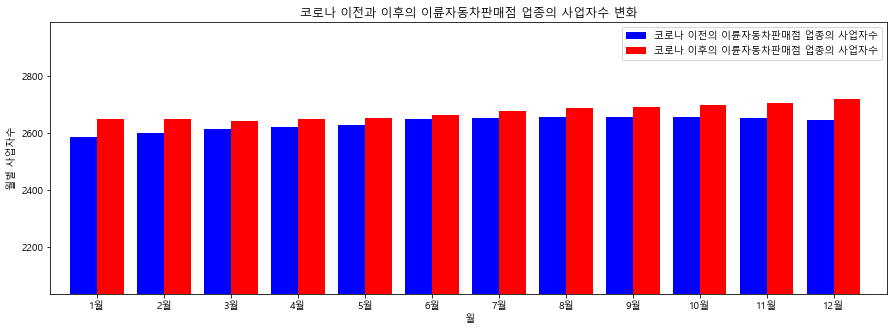

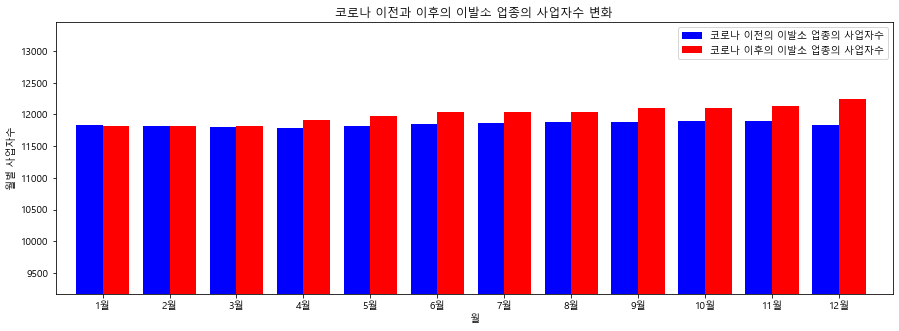

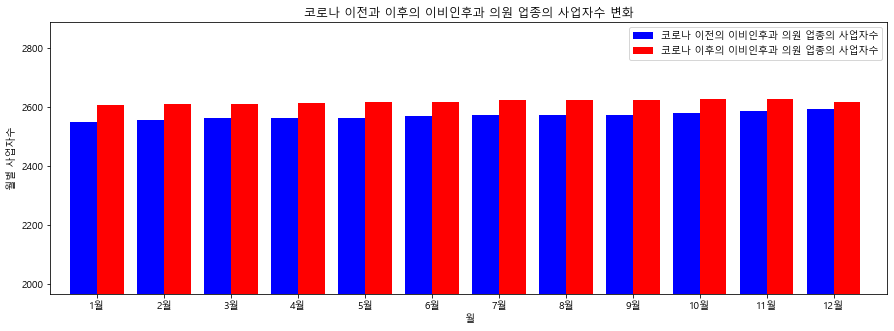

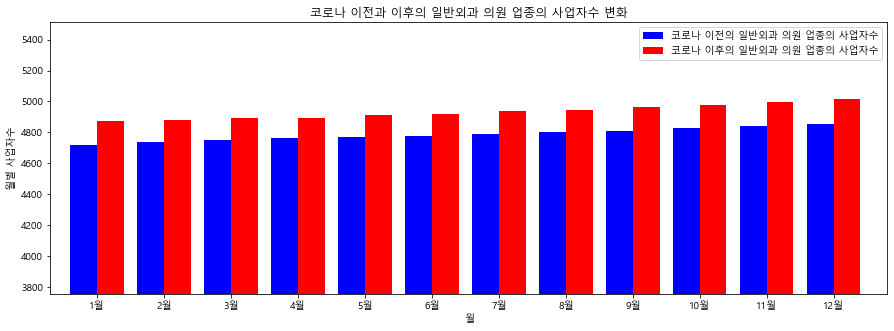

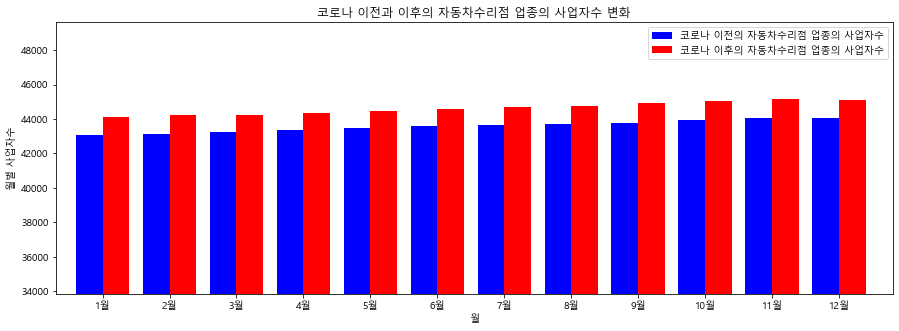

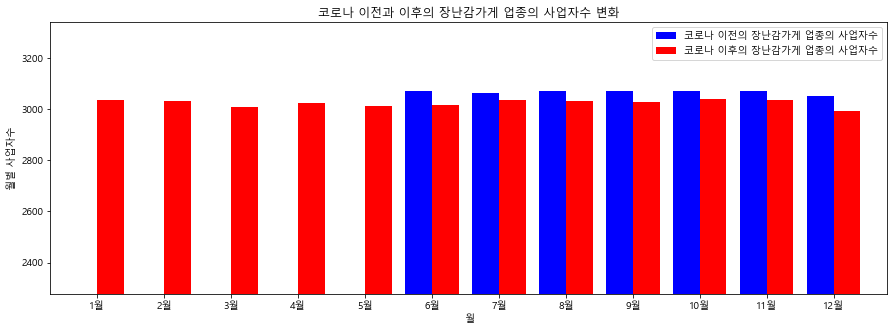

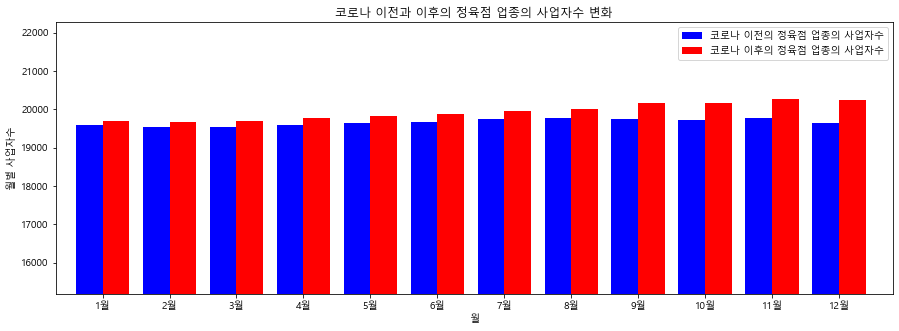

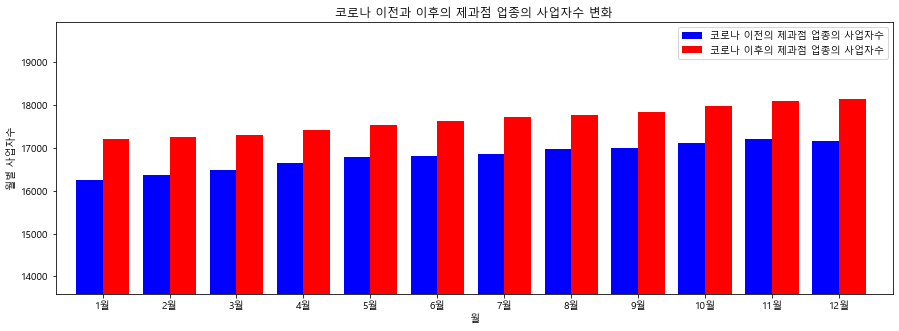

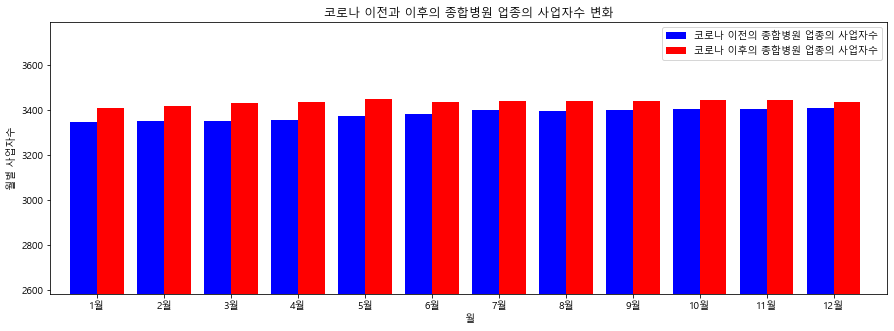

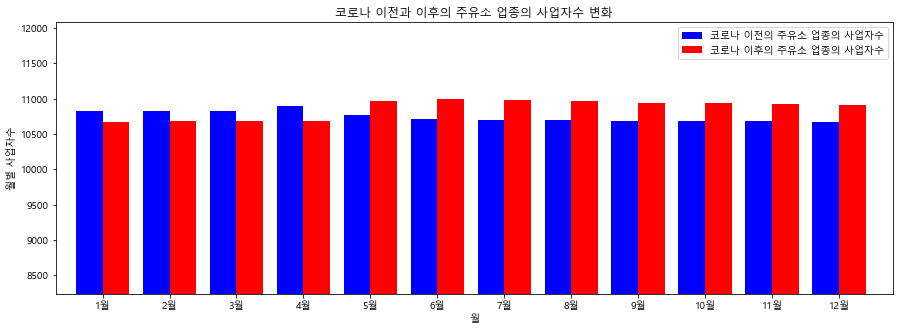

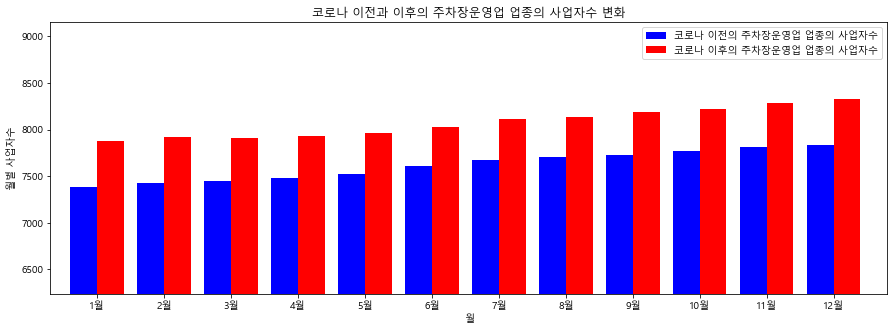

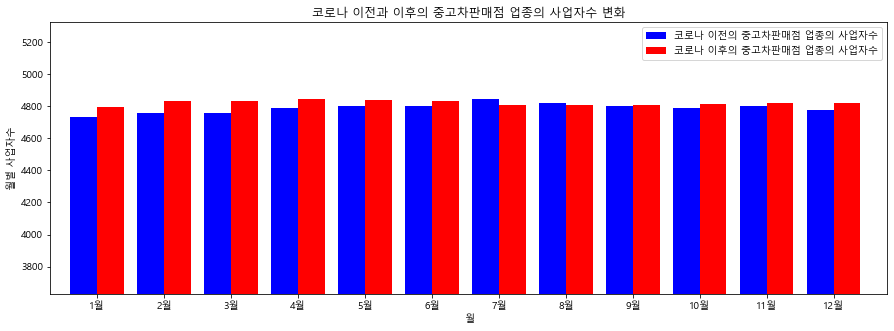

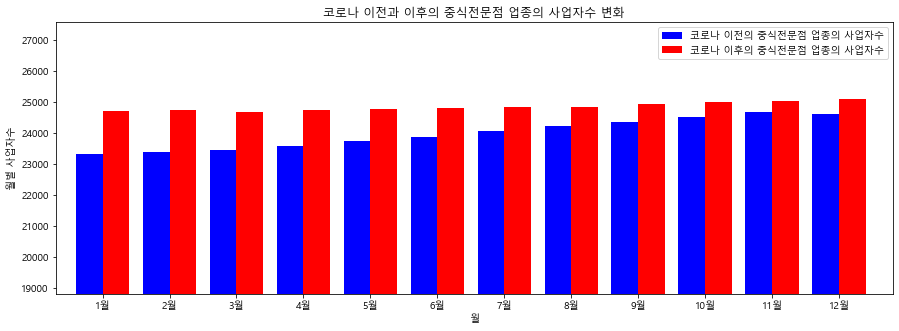

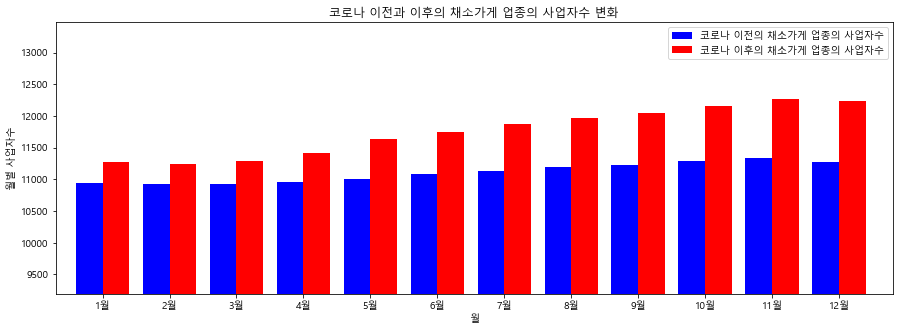

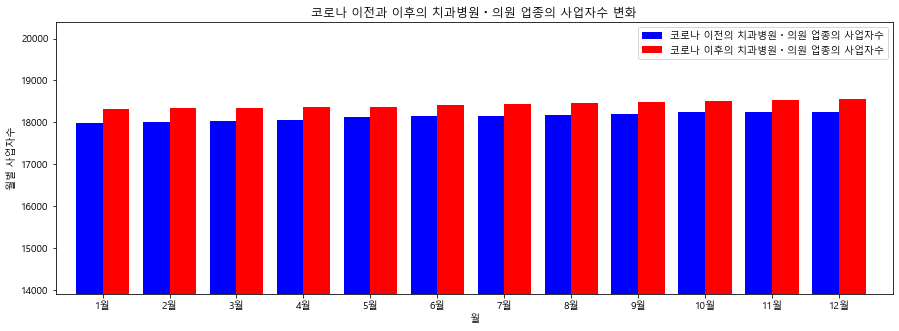

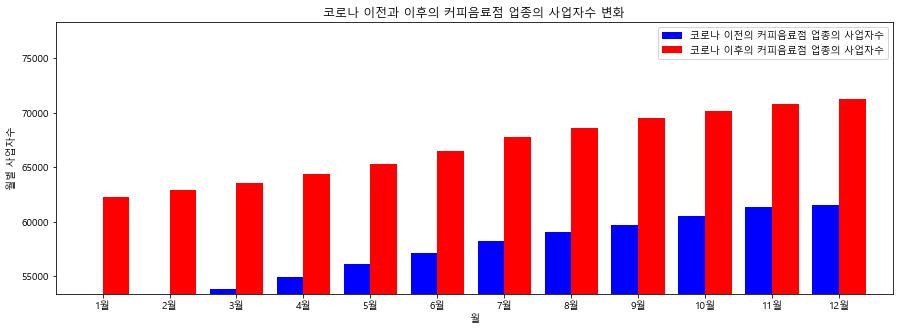

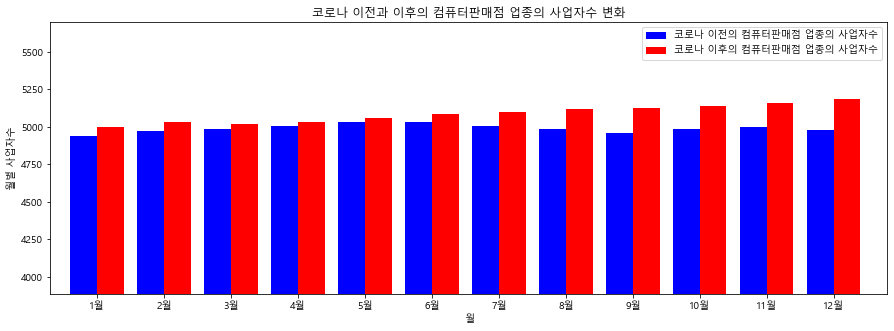

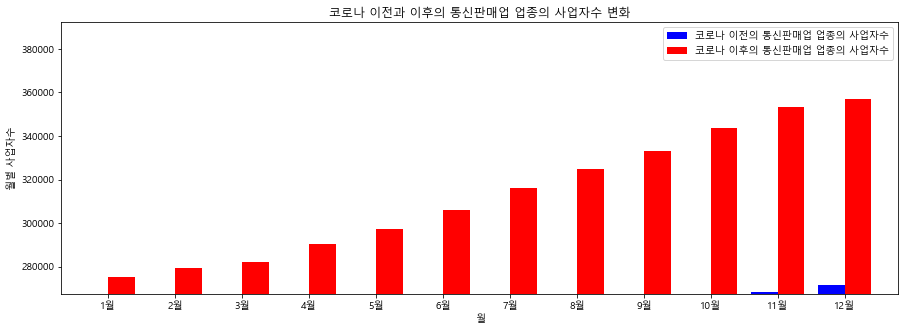

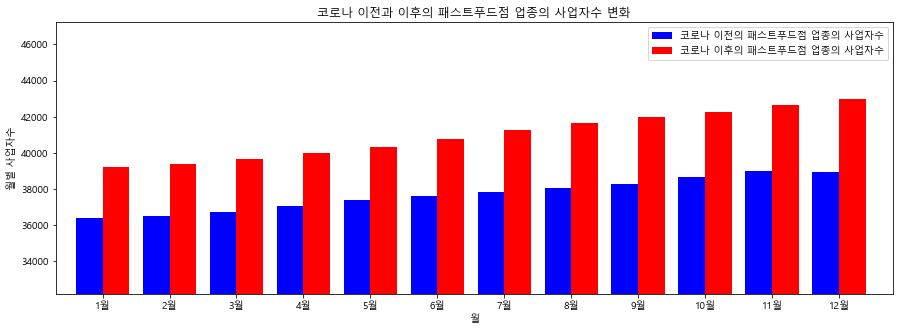

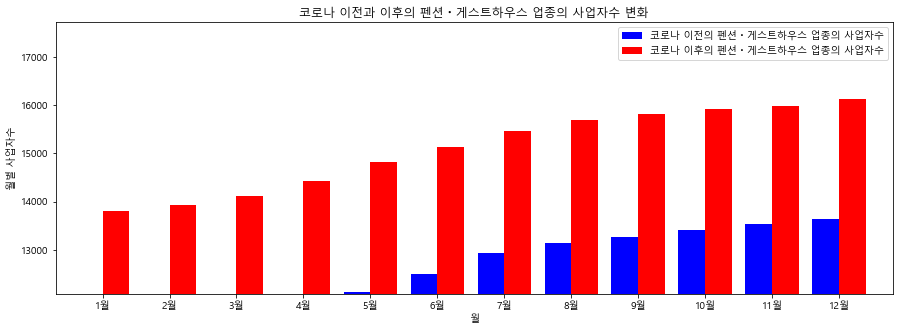

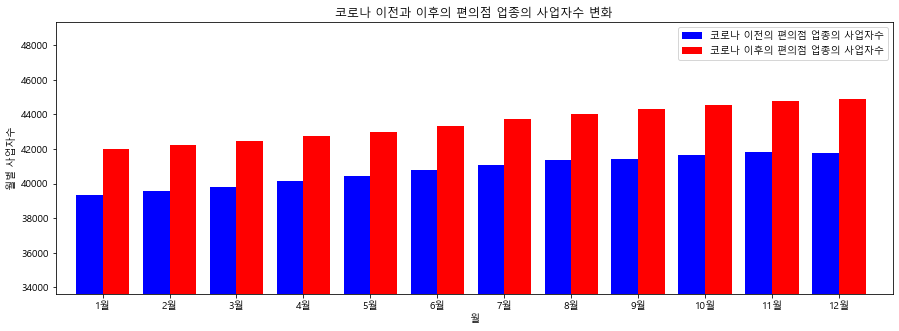

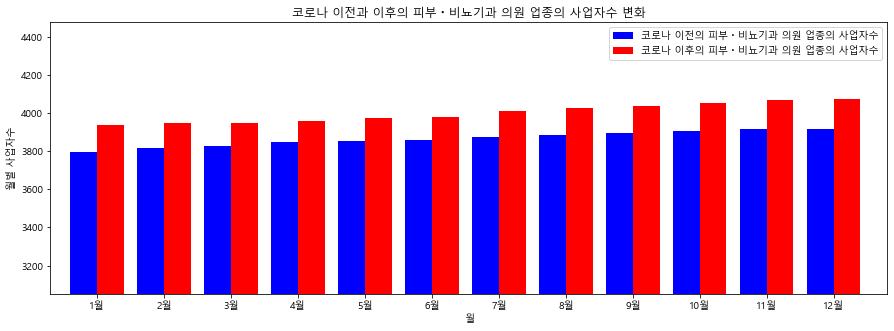

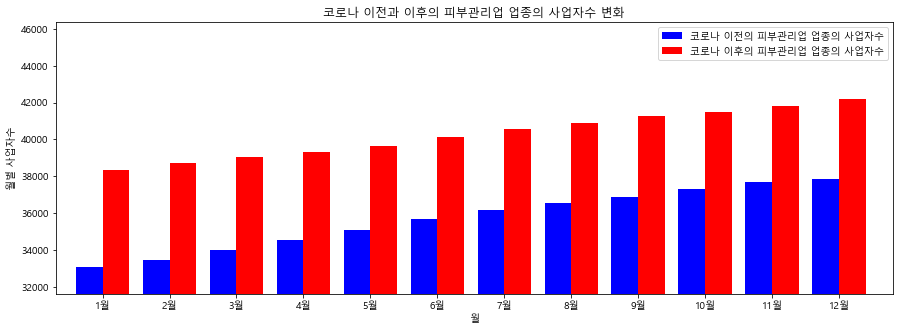

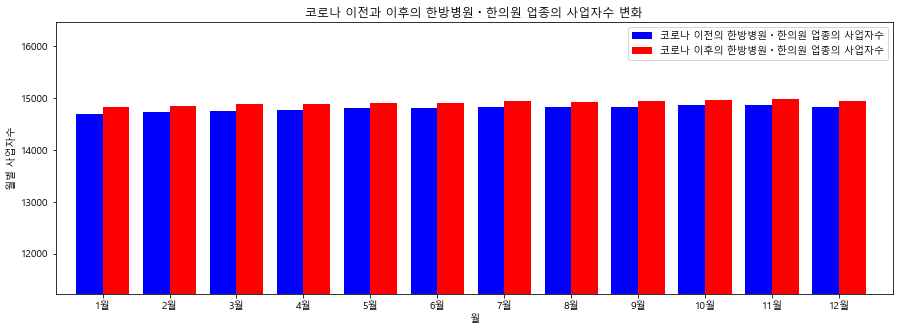

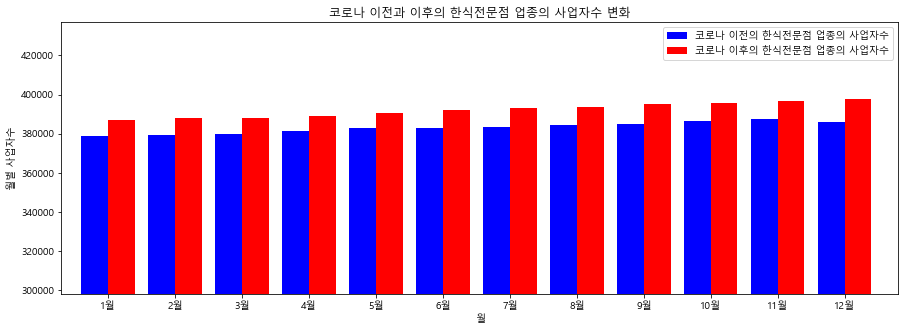

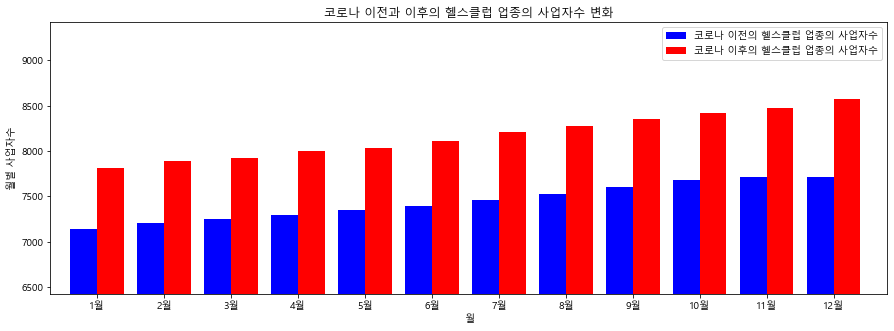

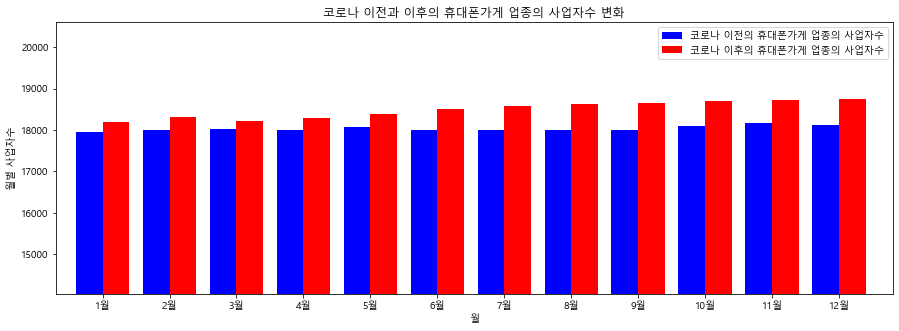

In [172]:
for i in range(len(ls_inc)):
    plt.figure(figsize = (15,5))
    plt.title('코로나 이전과 이후의 {} 업종의 사업자수 변화'.format(ls_inc[i]))
    plt.xlabel('월')
    plt.ylabel('월별 사업자수')
    plt.bar(x,list(df_before[df_before['업종'] == ls_inc[i]]['연합계']), 
            color = 'blue', width = w, label = '코로나 이전의 {} 업종의 사업자수'.format(ls_inc[i]))
    plt.bar(x+w,list(df_after[df_after['업종'] == ls_inc[i]]['연합계']), 
            color = 'red', width = w, label = '코로나 이후의 {} 업종의 사업자수'.format(ls_inc[i]))
    plt.axis([-0.5,12,
              max(list(df_after[df_after['업종'] == ls_inc[i]]['연합계']))-
              max(list(df_after[df_after['업종'] == ls_inc[i]]['연합계']))/4,
              max(list(df_after[df_after['업종'] == ls_inc[i]]['연합계']))+
              max(list(df_after[df_after['업종'] == ls_inc[i]]['연합계']))/10
              ])
    plt.legend(loc='best')

    plt.xticks(x+w/2,xindex)

   + 19년의 연 합계보다 20년의 연합계보다 큰 업종은 코로나 이후의 사업자 수가 코로나 이전의 사업자 수보다 많은 것을 볼 수 있다.

### 7. 결론 : 코로나 1년이 자영업자에게 준 영향은 어떠한가?

1. 지역별 사업자 현황
  + 지역별 사업자 현황은 경기도, 서울특별시와 같은 수도권에서 높게 나타났다.
  + 이후, 부산광역시, 대구광역시 등 광역시가 뒤따라 높게 나타남을 확인 할 수 있었다.


2. 업종별 사업자 현황
  + 업종별 사업자의 현황은 '한식전문점'과 '통신판매업'이 다른 업종보다 높게 나타났다.
  + 뒤이어 '미용실', '부동산중개업' 등 다른 생활 업종에 비해 보다 더 생활과 밀접 하다고 말할 수 있는 업종이 뒤따라 높게 나타남을 확인 할 수 있었다.
 
 
3. 지역별 주요 업종 비교
  + 이 또한 마찬가지로 대부분의 지역에서 '한식전문점'과 '통신판매업'이 다른 업종보다 높게 나타났다.
  + 뒤이어 '미용실', '부동산중개업'과 같이 주변에서 쉽게 볼 수 있는 생활업종이 대부분의 지역에서 뒤따라 높게 나타났다.
  + 단, 제주특별자치시의 경우 '한식전문점'과 '통신판매업'이 아닌, '펜션, 게스트하우스'가 2위로 나타났는대, 이는 해당 지역의 특성을 잘 나타내 주는 지표임을 알 수 있다.
 
 
4. 코로나 전후의 사업자수 비교
  + 코로나가 발생한 2020년 1월 기준으로, 코로나 발생 전보다 코로나 발생 후의 사업자수가 감소할 것이라고 예상하였지만, 전체 분석 기간 중, 2019년 12월을 제외한 모든 기간에서 사업자수는 증가되었다.
  + 코로나가 발생하였음에도 불구하고, 증감율 또한 2019년 보다 2020년이 근소하게 높게 나타났다.


5. 코로나 이후 감소한 업종
  + 코로나로 인해 감소한 업종은 대표적으로 '기타음식점', '간이주점', '노래방', '당구장', 'PC방', '여행사' 등으로 고객, 손님들과의 대면 업무, 운영을 통해 업무가 이루어지는 업종임을 알 수 있다.
  + 전체적인 사업자 수는 늘어났지만 오프라인 업무가 필수적인 생활업종은 코로나로 인한 업무적, 경제적 피해가 상당함을 확인할 수 있었다.
  + 코로나 이후 감소한 업종을 우리의 실제 주변에서 살펴보면 실제로 상당수가 사라졌음을 확인 할 수 있다.
  
  
6. 코로나 이후 증가한 업종
  + 코로나임에도 불구하고 증가한 업종은 대표적으로 '종합병원', '약국', '내과, 소아과 의원', '이비인후가 의원' 등 100대 생활 업종 중, 의료업종은 모두 증가함을 알 수 있다.
  + 그 외에 '변호사', '기술직' 등 고객, 손님들과의 대면 업무, 운영이 비교적 덜 이루어지는 업종임을 알 수 있다.
  + 특이하게도 '한식전문점', '편의점'과 같은 코로나 이후 감소한 업종과 유사한 업종이 증가하였음을 확인 할 수 있는대, 이는 배달, 온라인몰 등과 같은 방법으로 코로나를 극복하고자 하였음을 예상할 수 있다.
  
  
7. 결론: 코로나 1년이 자영업자에게 준 영향은 어떠한가?
  + 4.절의 결과로 미루어 보아 전,후의 전체적인 사업자 수는 증가하였음을 알 수 있다.
  + 단, 일부 고객, 손님 들과의 대면 업무가 필수적인 일부 업종은 직접적인 피해를 입었음을 알 수 있다.
  + 감소된 업종과 유사하게 대면 업무가 필수적인 업종이 있지만 일부는 배달, 온라인 몰등 자체적으로 코로나를 극복하고자 하였음을 예상 할 수 있고, 코로나 이후에도 증가하였음을 확인 할 수 있다.